# Importe de paquetes y definición de variables de interés

## Importe de paquetes

In [1]:
# Importando paquetes
import pandas as pd #paquete para datos en tablas
import matplotlib.pyplot as plt #paquete para plotear
import seaborn as sns #paquete para plotear
import numpy as np #paquete para operaciones matematicas
import os #paquete que ayuda al sistema operativo
import scipy # paquete estadistica y mates
import scipy.stats as stats # paquete estadistica y mates
import re # para gestionar strings 
import textwrap # para imprimir textos en figuras

## Variables de visualización

In [2]:
#Saving text for pdfs in a proper way
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# Definiendo las configuraciones globales de fuente
plt.rcParams['font.family'] = 'Arial'      # Tipo de letra global (Arial)
plt.rcParams['axes.titlesize'] = 12        # Tamaño de los títulos (12)
plt.rcParams['axes.labelsize'] = 10        # Tamaño de las etiquetas de los ejes (10)
plt.rcParams['xtick.labelsize'] = 8        # Tamaño de las etiquetas de las marcas (ticks) en eje X (8)
plt.rcParams['ytick.labelsize'] = 8        # Tamaño de las etiquetas de las marcas (ticks) en eje Y (8)
plt.rcParams['legend.fontsize'] = 6        # Tamaño del texto de las leyendas (6)
plt.rcParams['figure.titlesize'] = 12      # Tamaño del título de la figura (opcional si lo usas)

color_titols = "#636363" # Gris Color Brewer

In [4]:
# Colores ajustados para que sean más agradables

color_dict = {
    'Felicitat':'#a89fc0',
    'Serenitat':'#a89fc0',
    'Tranquil·litat':'#a89fc0',
    'Pau':'#a89fc0',
    'Plenitud':'#a89fc0',
    'Amor/Estima': '#5ba73c',
    'Seguretat': '#5ba73c',
    'Confiança': '#5ba73c',
    'Gratitud': '#5ba73c',
    'Esperança': '#5ba73c',
    'Alegria': '#ffd700',
    'Satisfacció': '#ffd700',
    'Motivació': '#ffd700',
    'Alleujament':'#ffd700',
    'Il·lusió':'#ffd700',
    'Sorpresa':'#e5006f',
    'Vergonya': '#f38f4a',
    'Culpa': '#f38f4a',
    'Remordiment': '#f38f4a',
    'Fàstic/Aversió': '#9b4b4b',
    'Rebuig': '#9b4b4b',
    'Tristesa': '#336ab1',
    'Desil·lusió / Decepció': '#336ab1',
    'Solitud': '#336ab1',
    'Enyorança': '#336ab1',
    'Frustració': '#336ab1',
    'Ràbia / Enfado': '#e50000',
    'Indignació': '#e50000',
    'Impotència': '#e50000',
    'Odi': '#e50000',
    'Rancor': '#e50000',
    'Por': '#000000',
    'Inseguretat': '#000000',
    'Desconfiança': '#000000',
    'Temor': '#000000',
    'Pànic': '#000000',
    'Nervis / Estrès': '#9f5b2d',
    'Preocupació': '#9f5b2d',
    'Inquietud / Intranquil·litat': '#9f5b2d',
    'Desesperació': '#9f5b2d',
    'Angoixa': '#9f5b2d',
}

families_color_dict = {'FELICITAT':'#a89fc0',
                     'AMOR':'#5ba73c',
                     'ALEGRIA':'#ffd700', 
                     'SORPRESA': '#e5006f', 
                     'VERGONYA':'#f38f4a',
                     'REBUIG': '#9b4b4b',
                     'TRISTESA': '#336ab1',
                     'RÀBIA': '#e50000',
                     'POR': '#000000',
                     'NERVIS': '#9f5b2d'
                     }

# Definir colores de las fases de transición emocional
colors_transició_emocional = {
    "Negació": "#754C24",
    "Resignació": "#E74C3C",
    "Acceptació": "#3498DB",
    "Comprensió": "#2ECC71",
    "Agraïment": "#9B59B6"
}

## Variables globales

In [5]:
## Definiendo directorios
mainFolder = r'D:\Education\SEJ' # Definir carpeta del usuario donde se quiera trabajar localmente
fileData = os.path.join(mainFolder,'SEJ24_datos_crudos_20250213') # Datos en la misma carpeta de este script
filePopulation = '2023_censo_municipis_garraf_edats_totes' # Datos en la misma carpeta de este script
savePath = os.path.join(mainFolder,'Gráficos') 

In [6]:
## Informació Idescat

# Datos poblacionales 2011 del INE aquí: https://ine.es/jaxi/Tabla.htm?path=/t20/e244/avance/p02/l0/&file=1mun00.px&L=0
# Datos generales poblacionales aqui: https://www.idescat.cat/tema/xifpo?lang=es
# Datos para el Garraf aqui: https://www.idescat.cat/pub/?id=projpe&lang=es
# Completa la info desde un archivo de idescat (temporalmente es manual)
# Projection de població en edat escolar 2016-2026: https://www.idescat.cat/serveis/biblioteca/docs/cat/projpe20162026.pdf
# Garraf = 6325 (12-15), 3474 (16-17), 5204 (18-20)
# Datos por sexo y edad, any a any, per municipi: https://www.idescat.cat/pub/?id=censph&n=10&geo=mun:083073&lang=es
territori_absolut_dict = {'Cubelles': 1013+1013, 'Vilanova i la Geltrú': 3862+3699, 'Canyelles': 337+310, 
                            'Sant Pere de Ribes': 2007+1849, 'Sitges': 1687+1641, 'Olivella': 279+307}

# Objetivo de muestreo: porcentaje de población a cubrir
sample_goal = 0.10


In [7]:
# Sequancias y códigos
secuencia_Ocupación = ['1r d’ESO','2n d’ESO','3r d’ESO','4t d’ESO','1r Batx.','2n Batx.'
                       ,'Formació Professional','Formació Universitària','Treballo','No estudio ni treballo']
primera_etapa_ESO = ['1r d’ESO','2n d’ESO']
segunda_etapa_ESO = ['3r d’ESO','4t d’ESO']
educación_postobligatoria = ['1r Batx.','2n Batx.','Formació Professional','Formació Universitària']

identificación_sexo_genero = {'Femella':'Dona','Mascle':'Home', 'Intersexual':'No binari'} # Revisar par: 'Intersexual':'No binari' 
secuencia_frecuencia_emociones = ['Gens', 'Poc', 'Algunes vegades', 'Freqüentment']
territorios_de_estudio = ['Sitges', 'Canyelles', 'Vilanova i la Geltrú','Sant Pere de Ribes', 'Cubelles','Olivella','Voltants Garraf']
ocupaciones_de_estudio = ["1r d'ESO", "2n d'ESO","3r d'ESO","4t d'ESO","1r Batx.","2n Batx.","Formació professional", 
                          "Formació universitària","Treballo","No estudio","No estudio ni treballo"]
sexo_de_estudio = ["Mascle","Femella","Intersexual"]
genero_de_estudio = ["Dona","Home","No binari","No ho sé"]

In [8]:
# Emociones

emociones_totales = ['Alegria', 'Amor/Estima', 'Confiança', 'Desconfiança',
       'Desil·lusió / Decepció', 'Fàstic/Aversió', 'Felicitat', 'Impotència',
       'Indignació', 'Inquietud / Intranquil·litat', 'Inseguretat',
       'Motivació', 'Nervis / Estrès', 'Por', 'Preocupació', 'Ràbia / Enfado',
       'Satisfacció', 'Seguretat', 'Serenitat', 'Solitud', 'Sorpresa',
       'Tranquil·litat', 'Tristesa', 'Vergonya', 'Alleujament', 'Angoixa',
       'Culpa', 'Desesperació', 'Enyorança', 'Esperança', 'Frustració',
       'Gratitud', 'Il·lusió', 'Odi', 'Pànic', 'Pau', 'Plenitud', 'Rancor',
       'Rebuig', 'Remordiment', 'Temor']

emociones_agradables = ['Alegria', 'Amor/Estima', 'Confiança', 'Felicitat', 'Motivació', 'Satisfacció', 'Seguretat', 'Serenitat', 'Tranquil·litat',
                       'Alleujament','Esperança','Gratitud','Il·lusió','Pau','Plenitud', 'Sorpresa']
emociones_desagradables = ['Desconfiança', 'Desil·lusió / Decepció', 'Fàstic/Aversió', 'Impotència', 'Indignació', 'Inquietud / Intranquil·litat', 
                       'Inseguretat', 'Nervis / Estrès', 'Tristesa', 'Vergonya','Angoixa','Culpa','Odi','Pànic','Desesperació','Enyorança','Rancor',
                       'Rebuig','Remordiment','Temor','Frustració', 'Por', 'Preocupació', 'Solitud', 'Ràbia / Enfado']


families_emocions = {'FELICITAT':['Felicitat','Serenitat','Tranquil·litat','Pau','Plenitud'],
                     'AMOR':['Amor/Estima','Seguretat', 'Confiança', 'Gratitud','Esperança'],
                     'ALEGRIA':['Alegria','Satisfacció', 'Motivació', 'Alleujament', 'Il·lusió'], 
                     'SORPRESA': ['Sorpresa'], 
                     'VERGONYA':['Vergonya','Culpa','Remordiment'],
                     'REBUIG': ['Fàstic/Aversió','Rebuig'],
                     'TRISTESA': ['Tristesa', 'Desil·lusió / Decepció', 'Solitud', 'Enyorança', 'Frustració'],
                     'RÀBIA': ['Ràbia / Enfado','Indignació','Impotència','Odi','Rancor'],
                     'POR': ['Por','Inseguretat','Desconfiança','Temor','Pànic'],
                     'NERVIS': ['Nervis / Estrès','Preocupació','Inquietud / Intranquil·litat','Desesperació','Angoixa']
                     }

transició_emocional_personal_dict = {'a. Prefereixo fer coses que em distreguin i parlar poc del que sento.':'Negació',
                            "b. No m'agraden els moments de malestar, ni estic d’acord amb com gestionen els adults, però bueno... és el que hi ha. No crec que pugui fer res.": 'Resignació',
                            "c. Accepto que hi hagi conflictes i, tot i que em fan mal, trobo espais per expressar i compartir.":'Acceptació',
                            "d. Aprofito les situacions complexes per trobar-li un sentit i intento fer canvis per a millorar la situació.": 'Comprensió',
                            "e. Aquestes situacions m’han donat l’oportunitat d’aprendre i això m’ajuda a afrontar el moment amb benestar.": 'Agraïment'}

transició_emocional_grupal_dict = {'a. Prefereixen fer coses que els distreguin i parlar poc del que senten.':'Negació',
                            "b. No els hi agraden els moments de malestar, ni estan d’acord amb com gestionen els adults, però bueno... és el que hi ha. No creuen que puguin fer res.": 'Resignació',
                            "c. Accepten que hi hagi conflictes i, tot i que els hi fa mal, troben espais per expressar i compartir.":'Acceptació',
                            "d. Aprofiten les situacions complexes per trobar-li un sentit i intenten fer canvis per a millorar la situació.": 'Comprensió',
                            "e. Aquestes situacions els hi han  donat l’oportunitat d’aprendre i això els ajuda a afrontar el moment amb benestar.": 'Agraïment'}

#Orden transición emocional:
transició_emocional = ["Negació", "Resignació", "Acceptació", "Comprensió", "Agraïment"]

In [9]:
# Categorias Conductas

conductes_reactives = ['M’és igual, no m’afecta.','Les situacions complexes no són la meva responsabilitat, ja s’ocuparà un altre.',
                      'Em pressiono tractant de resoldre tot el que passa, fins i tot quan no és la meva responsabilitat.',
                      'M’ho guardo, prefereixo no expressar com estic o com em sento.',
                      "Faig com si res i m'evadeixo de les meves emocions.",
                      'Perdo el control i puc arribar a tenir conductes conflictives.',
                      'Em bloquejo. Em costa respondre.']

gestio_emocional = ['Deixo anar el que ja no necessito ni em fa bé, em deixo ser la millor versió de mi.',
                   'Comprenc el que sento i trec aprenentatges que m’enforteixen.',
                   'Accepto el que em passa i em permeto sentir-ho sense jutjar-me.',
                   'Prenc distància per mirar i comprendre el millor possible el que em passa.',
                   'Busco altres punts de vista que m’ajudin a sentir-me millor.',
                   'Busco alternatives per resoldre el que sento.',
                   'No em deixo portar per la situació, procuro el millor per a mi.',
                   'Descanso de les emocions difícils per recarregar energia, llavors les abordo.',
                   'Em cuido, em mimo, connecto amb el meu benestar.',
                   'Busco i/o demano ajuda.',
                   'Intento donar-me espais per expressar el que sento (ex. dibuixar, ballar, escriure, parlar amb algú, etc.).']

In [10]:
# Categorias Percepción de Bienestar

ambit_relacional = ['Les relacions familiars', 'Les relacions amb amistats',
                    'Les relacions afectives (parella)',
                    'Les relacions amb educadores/as (profes, monis, entrenadors/es)',
                    'Les relacions amb la comunitat (persones del meu municipi)',
                    'Les relacions digitals (followers, contactes, etc.)']
desenvolupament_personal = ['La meva personalitat','El meu lleure, la diversió i el joc', 
                            'La meva autoestima','La meva afectivitat i sexualitat']
sentit_vida_participacio_ciutadana = ['Exercir llibertats i drets', 'La meva educació i futur acadèmic']
situacions_risc_psicosocial = ['El consum de substàncies',
                               'El consum de pantalles (temps connectat/da, actiu/va, etc.)',
                               'Les meves pèrdues o dols','L’afrontament de malalties', 'La meva situació socioeconòmica']
situacions_violencia_o_maltractaments = ['Situacions de bullying o ciberbullying',
                                         'Situacions de discriminació i demostracions d’odi',
                                         'Situacions de violències de gènere i/o de control en la parella']


In [11]:
# Categorias conducta: Reacción - Control - Gestión

categories_conducta = {"Em bloquejo. Em costa respondre.":"Bloqueig",
                       "Perdo el control i puc arribar a tenir conductes conflictives.":"Atac",
                       "Faig com si res i m'evadeixo de les meves emocions.":"Fugida",
                       "M’ho guardo, prefereixo no expressar com estic o com em sento.":"Motxilla",
                       "Em pressiono tractant de resoldre tot el que passa, fins i tot quan no és la meva responsabilitat.":"Motxilla",
                       "Les situacions complexes no són la meva responsabilitat, ja s’ocuparà un altre.":"Impermeable",
                       "M’és igual, no m’afecta.":"Impermeable",
                       "Intento donar-me espais per expressar el que sento (ex. dibuixar, ballar, escriure, parlar amb algú, etc.).":"Expressar",
                       "Busco i/o demano ajuda.":"Ajuda",
                       "Em cuido, em mimo, connecto amb el meu benestar.":"Guarir",
                       "Descanso de les emocions difícils per recarregar energia, llavors les abordo.":"Descans",
                       "No em deixo portar per la situació, procuro el millor per a mi.":"Fluir",
                       "Busco alternatives per resoldre el que sento.":"Buscar alternatives",
                       "Busco altres punts de vista que m’ajudin a sentir-me millor.":"Canviar mirada",
                       "Prenc distància per mirar i comprendre el millor possible el que em passa.":"Amplitud",
                       "Accepto el que em passa i em permeto sentir-ho sense jutjar-me.":"Acceptació",
                       "Comprenc el que sento i trec aprenentatges que m’enforteixen.":"Comprensió i aprenentatge",
                       "Deixo anar el que ja no necessito ni em fa bé, em deixo ser la millor versió de mi.":"Deixar anar"}
                       



# Pre-analysis

## Filtrado segun consentimiento

In [12]:
# Cargando datos crudos SEJ 2024
df = pd.read_excel(f'{fileData}.xlsx', header=[0, 1, 2]) # hay un encabezado multiple de tres niveles en el archivo
# Filtrando datos segun consentimiento
SEJ_df = df[df[('general', 'consentiment', 
                     'A continuació, i amb aquesta informació, marca si acceptes participar d’aquest estudi contestant a aquest qüestionari:')] == 'Accepto']

## Filtrado segun datos demogràficos

In [13]:
# Antes de filtrar los datos
SEJ_demografics = SEJ_df.sort_index(axis=1)[('general', 'dades demogràfiques')].copy()
print(f"\033[1mEdat:\033[0m \n{SEJ_demografics['Edat'].unique()}\n")
print(f"\033[1mDistribució Territorial:\033[0m \n{SEJ_demografics['Distribució Territorial'].unique()}\n")
print(f"\033[1mOcupació:\033[0m \n{SEJ_demografics['Ocupació'].unique()}\n")
print(f"\033[1mGènere:\033[0m \n{SEJ_demografics['Gènere'].unique()}\n")
print(f"\033[1mSexe biològic:\033[0m \n{SEJ_demografics['Sexe biològic'].unique()}\n")

Edat: 
[18 16 19 17 13 12 14 15 11]

Distribució Territorial: 
['Canyelles' 'Sitges' 'Vilanova i la Geltrú' 'Sant Pere de Ribes'
 'Cubelles' 'Voltants Garraf' 'Olivella' 'Les Palmeres' 'Reus']

Ocupació: 
['Formació universitària' '1r Batx.' '2n Batx.' "2n d'ESO"
 'Formació professional' 'Treballo i estudio' "1r d'ESO" "3r d'ESO"
 "4t d'ESO" 'No estudio']

Gènere: 
['Dona' 'Home' 'No ho sé' 'No binari' 'Altre' 'no penso diru']

Sexe biològic: 
['Femella' 'Mascle' 'Intersexual']



In [14]:
## Filtros the control. Aqui limitamos los datos
# Conteo de filas antes de aplicar el filtro
original_count = SEJ_demografics.shape[0]

# Aplica el filtro de edad. Limitar edades entre 12 y 19
# Convertir la columna 'Edat' a numérica, convirtiendo valores no numéricos a NaN
SEJ_demografics['Edat'] = pd.to_numeric(SEJ_demografics['Edat'], errors='coerce')

filtered_demografics = SEJ_demografics[
    (SEJ_demografics['Edat'].notna()) &
    (SEJ_demografics['Edat'] >= 12) &
    (SEJ_demografics['Edat'] <= 19) &
    (SEJ_demografics['Edat'].apply(lambda x: x.is_integer()))
]

# Aplica el filtro de territorio. Limitar datos a territorios de estudio
filtered_demografics = filtered_demografics[filtered_demografics['Distribució Territorial'].isin(territorios_de_estudio)].copy()

# Aplica otro filtors
filtered_demografics = filtered_demografics[filtered_demografics['Gènere'].isin(genero_de_estudio)].copy()
filtered_demografics = filtered_demografics[filtered_demografics['Ocupació'].isin(ocupaciones_de_estudio)].copy()
filtered_demografics = filtered_demografics[filtered_demografics['Sexe biològic'].isin(sexo_de_estudio)].copy()

# Conteo después del filtro
filtered_count = filtered_demografics.shape[0]

# Calculo de filas descartadas
rows_filtered_out = original_count - filtered_count

## Obteniendo los indices que han pasado el filtrado
SEJ_demografics = filtered_demografics.copy()
all_indexes_of_interest = SEJ_demografics.index

# Imprimir información
print(filtered_demografics['Edat'].unique())
print(f"Number of rows filtered out: {rows_filtered_out}")

[18 16 19 17 13 12 14 15]
Number of rows filtered out: 15


In [15]:
# Después de filtrar los datos
print(f"\033[1mEdat:\033[0m \n{SEJ_demografics['Edat'].unique()}\n")
print(f"\033[1mDistribució Territorial:\033[0m \n{SEJ_demografics['Distribució Territorial'].unique()}\n")
print(f"\033[1mOcupació:\033[0m \n{SEJ_demografics['Ocupació'].unique()}\n")
print(f"\033[1mGènere:\033[0m \n{SEJ_demografics['Gènere'].unique()}\n")
print(f"\033[1mSexe biològic:\033[0m \n{SEJ_demografics['Sexe biològic'].unique()}\n")

Edat: 
[18 16 19 17 13 12 14 15]

Distribució Territorial: 
['Canyelles' 'Sitges' 'Vilanova i la Geltrú' 'Sant Pere de Ribes'
 'Cubelles' 'Voltants Garraf' 'Olivella']

Ocupació: 
['Formació universitària' '1r Batx.' '2n Batx.' "2n d'ESO"
 'Formació professional' "1r d'ESO" "3r d'ESO" "4t d'ESO" 'No estudio']

Gènere: 
['Dona' 'Home' 'No ho sé' 'No binari']

Sexe biològic: 
['Femella' 'Mascle' 'Intersexual']



## Extracción de datos por àmbito y pregunta

In [16]:
# Separando table en tablas individuales por sección útil
SEJ_conciencia_sentir = SEJ_df[('conciència del sentir')].copy()
SEJ_eleccio_personal = SEJ_df[('elecció personal')].copy()
SEJ_resp_individual = SEJ_df[('responsabilidad individual')].copy()
SEJ_entorn = SEJ_df[('Entorn - Què passa? ')].copy()


# Guardando los nombre de las preguntas
conciencia_sentir_preguntes = SEJ_conciencia_sentir.columns.get_level_values(0).unique()
conciencia_sentir_preguntes_diccionario = {i: name for i, name in enumerate(conciencia_sentir_preguntes)}

eleccio_personal_preguntes = SEJ_eleccio_personal.columns.get_level_values(0).unique()
eleccio_personal_preguntes_diccionario = {i: name for i, name in enumerate(eleccio_personal_preguntes)}

resp_individual_preguntes = SEJ_resp_individual.columns.get_level_values(0).unique()
resp_individual_preguntes_diccionario = {i: name for i, name in enumerate(resp_individual_preguntes)}

entorn_preguntes = SEJ_entorn.columns.get_level_values(0).unique()[0:2] #Cojo solo las dos primeras
entorn_preguntes_diccionario = {i: name for i, name in enumerate(entorn_preguntes)}

# Printing statements
for key, value in conciencia_sentir_preguntes_diccionario.items():
    print(value)

for key, value in eleccio_personal_preguntes_diccionario.items():
    print(value)

for key, value in resp_individual_preguntes_diccionario.items():
    print(value)

for key, value in entorn_preguntes_diccionario.items():
    print(value)

# Accediendo al contenido de cada pregunta de conciencia del sentir
first_level = SEJ_conciencia_sentir.columns.get_level_values(0)
SEJ_conciencia_sentir_p1 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[0]][(conciencia_sentir_preguntes_diccionario[0])] # p1 = pregunta 1
SEJ_conciencia_sentir_p2 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[1]][(conciencia_sentir_preguntes_diccionario[1])] # p2 = pregunta 2
SEJ_conciencia_sentir_p3 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[2]][(conciencia_sentir_preguntes_diccionario[2])] # p3 = pregunta 3
SEJ_conciencia_sentir_p4 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[3]][(conciencia_sentir_preguntes_diccionario[3])] # p4 = pregunta 4

# Accediendo al contenido de cada pregunta de elección personal
first_level = SEJ_eleccio_personal.columns.get_level_values(0)
SEJ_eleccio_personal_p5 = SEJ_eleccio_personal.loc[:, first_level == eleccio_personal_preguntes_diccionario[0]][(eleccio_personal_preguntes_diccionario[0])] # p5 = pregunta 5
SEJ_eleccio_personal_p6 = SEJ_eleccio_personal.loc[:, first_level == eleccio_personal_preguntes_diccionario[1]][(eleccio_personal_preguntes_diccionario[1])] # p6 = pregunta 6

# Accediendo al contenido de cada pregunta de responsabilidad individual
first_level = SEJ_resp_individual.columns.get_level_values(0)
SEJ_resp_individual_p7 = SEJ_resp_individual.loc[:, first_level == resp_individual_preguntes_diccionario[0]][(resp_individual_preguntes_diccionario[0])] # p7 = pregunta 7
SEJ_resp_individual_p8 = SEJ_resp_individual.loc[:, first_level == resp_individual_preguntes_diccionario[1]][(resp_individual_preguntes_diccionario[1])] # p8 = pregunta 8

# Accediendo al contenido de cada pregunta del entorno
first_level = SEJ_entorn.columns.get_level_values(0)
SEJ_entorn_p9 = SEJ_entorn.loc[:, first_level == entorn_preguntes_diccionario[0]][(entorn_preguntes_diccionario[0])] # p9 = pregunta 9
SEJ_entorn_p10 = SEJ_entorn.loc[:, first_level == entorn_preguntes_diccionario[1]][(entorn_preguntes_diccionario[1])] # p10 = pregunta 10


# Binarización de los datos de la primera pregunta de la consciéncia del sentir
# Definir los valores a ser reemplazados por 1
valores_positivos = ["Freqüentment", "Algunes vegades"]
# Crear una copia del dataframe binarizado
SEJ_conciencia_sentir_p1_binario = SEJ_conciencia_sentir_p1.apply(
    lambda col: col.map(lambda x: 1 if x in valores_positivos else 0)
)
SEJ_conciencia_sentir_combined = SEJ_conciencia_sentir_p1_binario.copy()

# Mapeo de valores categóricos a valores numéricos de Likert
likert_scale = {
    "Gens": 1,
    "Poc": 2,
    "Algunes vegades": 3,
    "Freqüentment": 4
}

# Aplicar la transformación al DataFrame
SEJ_conciencia_sentir_p1_likert = SEJ_conciencia_sentir_p1.replace(likert_scale)

# Assignació de valors numèrics a tipus de resposte per la p10
response_map = {
    "Em sento bé": 3,
    "Em sento malament": 1,
    "No sé com em sento": 2,
    "No ho he viscut": 0  # Si vols incloure-la, si no l'ignores
}

# Aplicar la transformación al DataFrame
SEJ_entorn_p10_numerics = SEJ_entorn_p10.replace(response_map)


# Filtrando datos a partir de los indexes demogràficos de interés
SEJ_conciencia_sentir_p1 = SEJ_conciencia_sentir_p1.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_p2 = SEJ_conciencia_sentir_p2.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_p3 = SEJ_conciencia_sentir_p3.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_p4 = SEJ_conciencia_sentir_p4.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_combined = SEJ_conciencia_sentir_combined.iloc[all_indexes_of_interest.tolist()].copy()
SEJ_conciencia_sentir_p1_likert = SEJ_conciencia_sentir_p1_likert.iloc[all_indexes_of_interest.tolist()].copy()
SEJ_eleccio_personal_p5 = SEJ_eleccio_personal_p5.iloc[all_indexes_of_interest].copy()
SEJ_eleccio_personal_p6 = SEJ_eleccio_personal_p6.iloc[all_indexes_of_interest].copy()
SEJ_resp_individual_p7 = SEJ_resp_individual_p7.iloc[all_indexes_of_interest].copy()
SEJ_resp_individual_p8 = SEJ_resp_individual_p8.iloc[all_indexes_of_interest].copy()
SEJ_entorn_p9 = SEJ_entorn_p9.iloc[all_indexes_of_interest].copy()
SEJ_entorn_p10 = SEJ_entorn_p10.iloc[all_indexes_of_interest].copy()
SEJ_entorn_p10_numerics = SEJ_entorn_p10_numerics.iloc[all_indexes_of_interest.tolist()].copy()

1.   En aquest últim trimestre, amb quina freqüència has sentit les següents emocions? 
2. Sabries explicar com se senten últimament…?
3. Dona’t un minut per pensar en situacions de malestar a la teva classe. Com vius emocionalment tu, personalment, aquests moments? (marca'n una)
4. I, per aquestes situacions de malestar a la teva classe, com creus que les viu el grup? (marca'n una)
5. Últimament, quan vull donar resposta a una situació complexa emocionalment (complicada, que remou, que és o pot ser difícil de gestionar, etc.), jo...
6. Últimament, quan sento estrès, por, tristesa, ràbia o alguna altra emoció desagradable, jo...
7. Davant de les diferents emocions que apareixen en situacions complicades, quins comportaments tens? Què fas? (marca totes les que facis)
8. Si sents o sentissis angoixa, disgust o tristesa profunda, a qui recorres? (marca totes les que creguis que tenen a veure amb el que fas)
9. Pensa en les relacions que has tingut últimament (amb les teves amistats, famíl

C:\Users\sebas\AppData\Local\Temp\ipykernel_4468\3704421167.py:75: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SEJ_conciencia_sentir_p1_likert = SEJ_conciencia_sentir_p1.replace(likert_scale)
C:\Users\sebas\AppData\Local\Temp\ipykernel_4468\3704421167.py:86: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SEJ_entorn_p10_numerics = SEJ_entorn_p10.replace(response_map)


## Indexes de agrupaciones demográficas de interés 

In [86]:
## Agrupaciones de interés OCUPACIÓN
primer_Grupo_ESO_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "1r d'ESO") | (SEJ_demografics['Ocupació'] == "2n d'ESO")].index
segon_Grupo_ESO_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "3r d'ESO") | (SEJ_demografics['Ocupació'] == "4t d'ESO")].index
fp_universitat_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "Formació professional") | (SEJ_demografics['Ocupació'] == "Formació universitària")].index
batxillerat_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "1r Batx.") | (SEJ_demografics['Ocupació'] == "2n Batx.")].index
educació_no_obligatoria_idx = SEJ_demografics[(SEJ_demografics['Ocupació'] == "Formació professional") | (SEJ_demografics['Ocupació'] == "Formació universitària") | (SEJ_demografics['Ocupació'] == "1r Batx.") | (SEJ_demografics['Ocupació'] == "2n Batx.")].index

## Agrupaciones de interés TERRITORIO

['Sitges', 'Canyelles', 'Vilanova i la Geltrú','Sant Pere de Ribes', 'Cubelles','Olivella','Voltants Garraf']

vilanova_geltru_idx = SEJ_demografics[(SEJ_demografics['Distribució Territorial'] == "Vilanova i la Geltrú")].index
cubelles_idx = SEJ_demografics[(SEJ_demografics['Distribució Territorial'] == "Cubelles")].index
canyelles_idx = SEJ_demografics[(SEJ_demografics['Distribució Territorial'] == "Canyelles")].index
sitges_idx = SEJ_demografics[(SEJ_demografics['Distribució Territorial'] == "Sitges")].index
sant_pere_ribes_idx = SEJ_demografics[(SEJ_demografics['Distribució Territorial'] == "Sant Pere de Ribes")].index
olivella_idx = SEJ_demografics[(SEJ_demografics['Distribució Territorial'] == "Olivella")].index
voltants_idx = SEJ_demografics[(SEJ_demografics['Distribució Territorial'] == "Voltants Garraf")].index

## Agrupaciones por ambitos de violencia

ambit_violencia_genere = "Situacions de violències de gènere i/o de control en la parella"
ambit_discriminacio_odi = "Situacions de discriminació i demostracions d’odi"
ambit_bullying = "Situacions de bullying o ciberbullying"

benestar_violencia_genere_idx = SEJ_entorn_p10[SEJ_entorn_p10[ambit_violencia_genere]== 'Em sento bé'].index
malestar_violencia_genere_idx = SEJ_entorn_p10[SEJ_entorn_p10[ambit_violencia_genere]== 'Em sento malament'].index
benestar_discriminacio_odi_idx = SEJ_entorn_p10[SEJ_entorn_p10[ambit_discriminacio_odi]== 'Em sento bé'].index
malestar_discriminacio_odi_idx = SEJ_entorn_p10[SEJ_entorn_p10[ambit_discriminacio_odi]== 'Em sento malament'].index
benestar_bullying_idx = SEJ_entorn_p10[SEJ_entorn_p10[ambit_bullying]== 'Em sento bé'].index
malestar_bullying_idx = SEJ_entorn_p10[SEJ_entorn_p10[ambit_bullying]== 'Em sento malament'].index

benestar_violencies_idx = SEJ_entorn_p10[(SEJ_entorn_p10[ambit_bullying]== 'Em sento bé') & (SEJ_entorn_p10[ambit_discriminacio_odi]== 'Em sento bé') & (SEJ_entorn_p10[ambit_violencia_genere]== 'Em sento bé')].index
malestar_violencies_idx = SEJ_entorn_p10[(SEJ_entorn_p10[ambit_bullying]== 'Em sento malament') & (SEJ_entorn_p10[ambit_discriminacio_odi]== 'Em sento malament') & (SEJ_entorn_p10[ambit_violencia_genere]== 'Em sento malament')].index



# Análisis conciencia del sentir

## 1. Últimament, amb quina Frecuencia has sentit les següents emocions?

### **Gráfico apilado para comparar la proporción de emociones agradables vs. desagradables por categoria.**

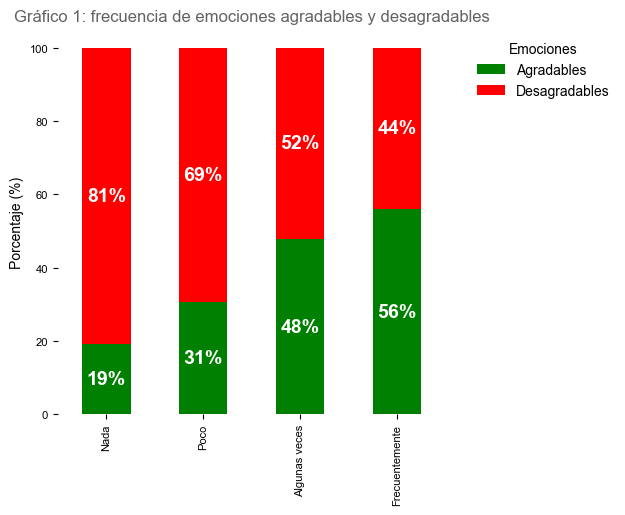

In [18]:
# Obtener las columnas del DataFrame como tuplas
columnas_flat = SEJ_conciencia_sentir_p1.columns.to_flat_index()

# Filtrar las columnas que corresponden a emociones agradables y negativas
columnas_agradables = [col for col in columnas_flat if col in emociones_agradables]
columnas_desagradables = [col for col in columnas_flat if col in emociones_desagradables]

# Contar las frecuencias para emociones agradables
conteo_agradables = SEJ_conciencia_sentir_p1[columnas_agradables].apply(pd.Series.value_counts)

# Contar las frecuencias para emociones negativas
conteo_negativas = SEJ_conciencia_sentir_p1[columnas_desagradables].apply(pd.Series.value_counts)

# Sumar los conteos para cada tipo de frecuencia en las emociones agradables
frecuencias_agradables_totales = conteo_agradables.sum(axis=1)

# Sumar los conteos para cada tipo de frecuencia en las emociones negativas
frecuencias_negativas_totales = conteo_negativas.sum(axis=1)

# Crear DataFrame de frecuencias
df_frecuencias = pd.DataFrame({
    'Agradables': frecuencias_agradables_totales,
    'Desagradables': frecuencias_negativas_totales
}).fillna(0)

# Reordenar las filas del DataFrame según la secuencia deseada
secuencia_frecuencia_emociones = ['Gens', 'Poc', 'Algunes vegades', 'Freqüentment']
df_frecuencias = df_frecuencias.loc[secuencia_frecuencia_emociones]

# Convertir a porcentaje sobre el total de cada tipo de respuesta
df_frecuencias_perc = df_frecuencias.div(df_frecuencias.sum(axis=1), axis=0) * 100

# Crear gráfico de barras apiladas con porcentajes
fig, ax = plt.subplots(figsize=(5, 5)) # A4: figsize=(8.27, 11.69)
ax.set_frame_on(False)

# Graficar las barras apiladas
df_frecuencias_perc.plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)

# Añadir etiquetas de porcentaje dentro de las barras
for i, (pos, neg) in enumerate(zip(df_frecuencias_perc['Agradables'], df_frecuencias_perc['Desagradables'])):
    ax.text(i, pos / 2, f'{pos:.0f}%', ha='center', va='center', color='white', fontweight='bold',fontsize=14,fontfamily='Arial')
    ax.text(i, pos + (neg / 2), f'{neg:.0f}%', ha='center', va='center', color='white', fontweight='bold',fontsize=14,fontfamily='Arial')

# Añadir etiquetas y título
secuencia_frecuencia_emociones_titol = ['Nada', 'Poco', 'Algunas veces', 'Frecuentemente']
plt.title("Gráfico 1: frecuencia de emociones agradables y desagradables", fontsize=12, color=color_titols)
#plt.xlabel('Tipus de Resposta')
plt.ylabel('Porcentaje (%)')

# Definir los ticks y las etiquetas correctamente
plt.xticks(ticks=range(len(secuencia_frecuencia_emociones_titol)), labels=secuencia_frecuencia_emociones_titol, rotation=90)

ax.legend(title="Emociones", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=False)

# Mostrar gráfico
plt.show()

In [28]:
# Si se quiere guardar el gráfico al PC
# Guardar como PNG
fig.savefig(f'{savePath}/frecuencia_emociones_agradables_desagradables.png', format='png', bbox_inches='tight')

### **Gráficos de barras mostrando la distribución de frecuencias de cada emoción por categoria**

In [19]:
# Contar las frecuencias para todas las emociones y tipos de respuesta
conteo_emociones = SEJ_conciencia_sentir_p1[emociones_totales].apply(pd.Series.value_counts)

# Filtrar las frecuencias de las categorías de respuesta específicas
conteo_emociones_filtrado = conteo_emociones.loc[secuencia_frecuencia_emociones]

# Convertir las frecuencias a porcentajes para cada categoría (suma de cada categoría = 100%)
porcentajes_por_categoria = conteo_emociones_filtrado.div(conteo_emociones_filtrado.sum(axis=1), axis=0) * 100
porcentajes_por_emocion = conteo_emociones_filtrado.div(conteo_emociones_filtrado.sum(axis=0), axis=1) * 100


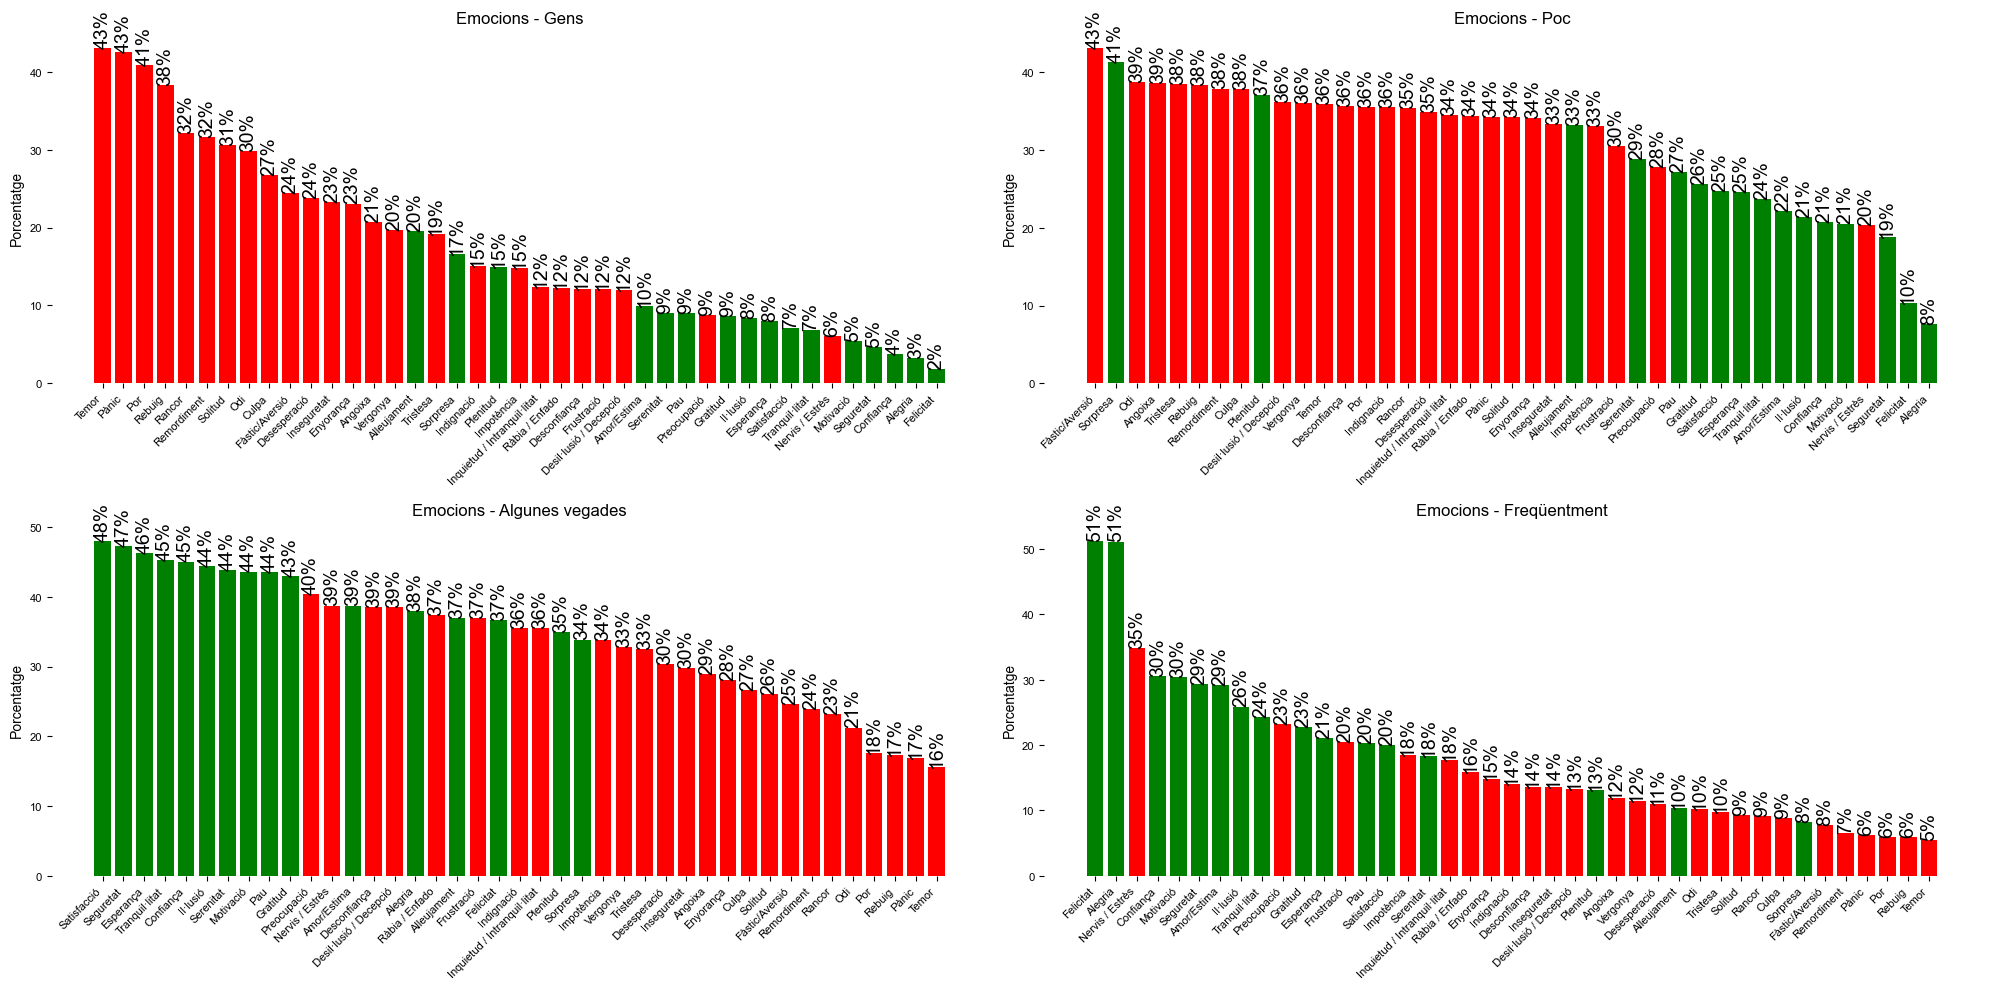

In [20]:
# Crear subgráficos
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente

for i, category in enumerate(porcentajes_por_emocion.index):
    # Ordenar los valores en orden descendente
    sorted_values = porcentajes_por_emocion.loc[category].sort_values(ascending=False)
    
    # Graficar con los colores según emociones agradables/negativas
    bars = axs[i].bar(sorted_values.index, sorted_values.values, 
                      color=['green' if emotion in emociones_agradables else 'red' if emotion in emociones_desagradables else 'gray' 
                             for emotion in sorted_values.index])
    
    # Personalizar gráfico
    axs[i].set_title(f'Emocions - {category}')
    axs[i].set_ylabel('Porcentatge')
    
    # Establecer ticks y etiquetas
    axs[i].set_xticks(range(len(sorted_values.index)))  # Fijar posiciones de los ticks
    axs[i].set_xticklabels(sorted_values.index, rotation=45, ha='right')  # Etiquetas de los ticks

    # Añadir porcentajes encima de las barras en vertical
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', 
                     ha='center', va='bottom', rotation=90, fontsize=14, fontfamily='Arial')  # Texto en vertical
        
    axs[i].set_frame_on(False) 

plt.tight_layout()  # Ajustar el espacio entre gráficos
plt.show()

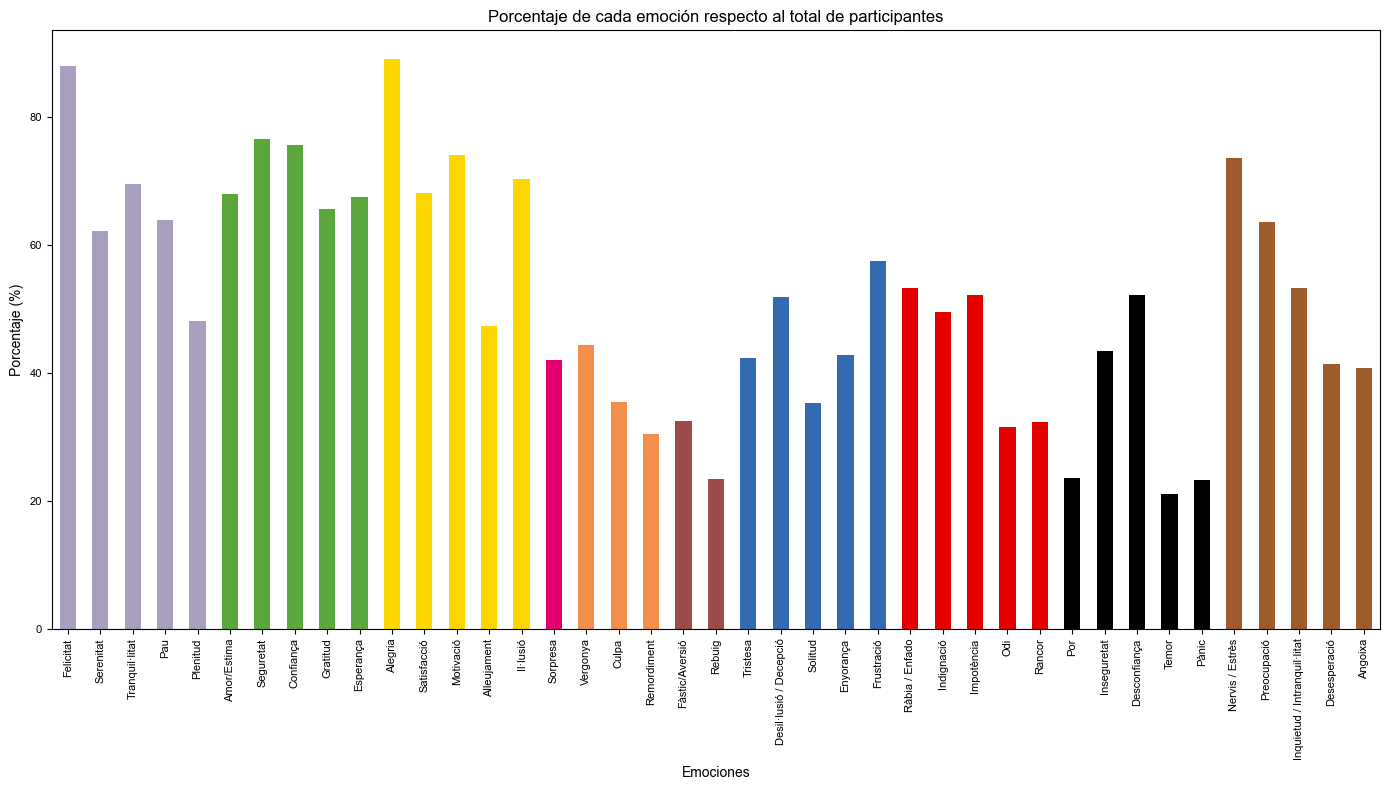

In [120]:
# Contar la frecuencia de cada emoción (columnas)
frecuencias_emociones = SEJ_conciencia_sentir_combined.sum()
total_participants = len(SEJ_conciencia_sentir_combined)

# Calcular los porcentajes
porcentajes_emociones = (frecuencias_emociones / total_participants) * 100

# Crear una lista de emociones ordenadas según el diccionario de familias
emociones_ordenadas = []
for familia, emociones in families_emocions.items():
    emociones_ordenadas.extend(emociones)

# Filtrar y reordenar los porcentajes y colores según emociones_ordenadas
porcentajes_ordenados = porcentajes_emociones[emociones_ordenadas]
colores_ordenados = [color_dict[emocion] for emocion in emociones_ordenadas]

# Crear un gráfico de barras
plt.figure(figsize=(14, 8))
porcentajes_ordenados.plot(kind='bar', color=colores_ordenados)

# Añadir etiquetas y título
plt.title('Porcentaje de cada emoción respecto al total de participantes')
plt.xlabel('Emociones')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()


### **Comparaciones LIKERT**

In [114]:
# Selecionando y organizando datos
primer_Grupo_data_likert = SEJ_conciencia_sentir_p1_likert.loc[benestar_violencies_idx]
segon_Grupo_data_likert = SEJ_conciencia_sentir_p1_likert.loc[malestar_violencies_idx]

Kruskal-Wallis per Felicitat
Kruskal-Wallis per Serenitat
Kruskal-Wallis per Tranquil·litat
Kruskal-Wallis per Pau
Kruskal-Wallis per Plenitud
Kruskal-Wallis per Amor/Estima
Kruskal-Wallis per Seguretat
Kruskal-Wallis per Confiança
Kruskal-Wallis per Gratitud
Kruskal-Wallis per Esperança
Kruskal-Wallis per Alegria
Kruskal-Wallis per Satisfacció
Kruskal-Wallis per Motivació
Kruskal-Wallis per Alleujament
Kruskal-Wallis per Il·lusió
Kruskal-Wallis per Sorpresa
Kruskal-Wallis per Vergonya
Kruskal-Wallis per Culpa
Kruskal-Wallis per Remordiment
Kruskal-Wallis per Fàstic/Aversió
Kruskal-Wallis per Rebuig
Kruskal-Wallis per Tristesa
Kruskal-Wallis per Desil·lusió / Decepció
Kruskal-Wallis per Solitud
Kruskal-Wallis per Enyorança
Kruskal-Wallis per Frustració
Kruskal-Wallis per Ràbia / Enfado
Kruskal-Wallis per Indignació
Kruskal-Wallis per Impotència
Kruskal-Wallis per Odi
Kruskal-Wallis per Rancor
Kruskal-Wallis per Por
Kruskal-Wallis per Inseguretat
Kruskal-Wallis per Desconfiança
Kruskal-

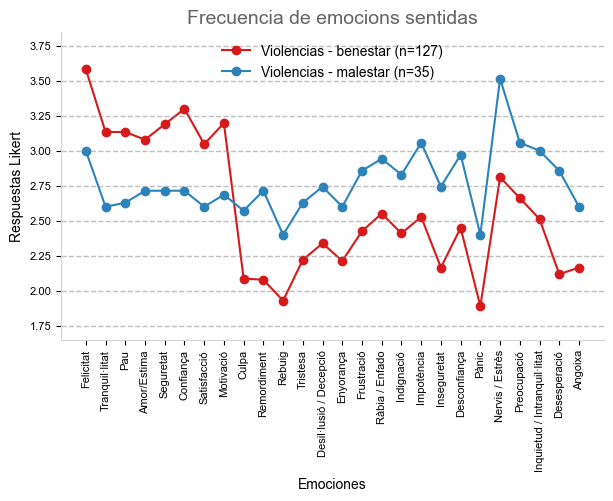

In [128]:
# 1️⃣ Ordenar les categories emocionals
primer_Grupo_data_likert = SEJ_conciencia_sentir_p1_likert.loc[benestar_violencies_idx]
segon_Grupo_data_likert = SEJ_conciencia_sentir_p1_likert.loc[malestar_violencies_idx]

#Definir nombre de grupos (respetcar ordre de les dades)
primer_Grup_nom = "Violencias - benestar"  #"Bullying - benestar", "Violencia de género - benestar","Discriminación u odio - benestar"
segon_Grup_nom = "Violencias - malestar"  #"Bullying - malestar", "Violencia de género - malestar","Discriminación u odio - malestar"

# Definir els colors
color_primer = "#d7191c"  
color_segon = "#2b83ba" 

# 2️⃣ Guardar p-values de totes les comparacions per parelles
p_values_all = []
p_values_dict = {}

# 3️⃣ Comparar les distribucions globals (ANOVA o Kruskal-Wallis)
alpha = 0.05  # Nivell de significació

for col in emociones_ordenadas:
    # Dades per cada grup
    data1 = primer_Grupo_data_likert[col]
    data2 = segon_Grupo_data_likert[col]

    # 4️⃣ Comprovació de normalitat per cada emoció (Shapiro-Wilk test)
    is_normal_1 = stats.shapiro(data1)[1] > 0.05
    is_normal_2 = stats.shapiro(data2)[1] > 0.05

    # 5️⃣ Seleccionar la prova estadística global
    if is_normal_1 and is_normal_2:
        print(f"ANOVA per {col}")
        stat, p_global = stats.f_oneway(data1, data2)  # ANOVA
        test_type = "ANOVA"
    else:
        print(f"Kruskal-Wallis per {col}")
        stat, p_global = stats.kruskal(data1, data2)  # Kruskal-Wallis
        test_type = "Kruskal-Wallis"

    # 6️⃣ Si la prova global és significativa, fem comparacions per parelles
    if p_global < alpha:
        if test_type == "ANOVA":
            # Comparacions per parelles amb t-tests
            for g1, g2 in combinations([primer_Grup_nom, segon_Grup_nom], 2):
                _, p = stats.ttest_ind(
                    primer_Grupo_data_likert[col] if g1 == primer_Grup_nom else segon_Grupo_data_likert[col],
                    primer_Grupo_data_likert[col] if g2 == primer_Grup_nom else segon_Grupo_data_likert[col]
                )
                p_values_all.append(p)
                p_values_dict[(col, g1, g2)] = p  # Guardar per columna i grups

        else:
            # Comparacions per parelles amb Dunn’s test
            p_matrix = sp.posthoc_dunn([data1, data2], p_adjust=None)  # Sense correcció aquí
            for i, j in combinations(range(2), 2):  # (0,1)
                p = p_matrix.iloc[i, j]
                p_values_all.append(p)
                p_values_dict[(col, [primer_Grup_nom, segon_Grup_nom][i], 
                               [primer_Grup_nom, segon_Grup_nom][j])] = p  

# 7️⃣ Aplicar la correcció Benjamini-Hochberg (FDR)
rejected, p_values_adjusted, _, _ = multipletests(p_values_all, alpha=alpha, method='fdr_bh')

# 8️⃣ Filtrar les comparacions significatives després de la correcció
significant_pairs = {
    k: p for k, p, reject in zip(p_values_dict.keys(), p_values_all, rejected) if reject
}

# 9️⃣ **Filtrar categories on totes les comparacions per parelles són significatives**
categories_final_significatives = set()
for col in emociones_ordenadas:
    pairs = [(col, g1, g2) for (col_, g1, g2) in significant_pairs.keys() if col_ == col]
    if len(pairs) == 1:  # Només hi ha una comparació significativa
        categories_final_significatives.add(col)

# 🔟 Mostrar les categories que complixen aquest criteri
print("Categories on totes les comparacions són significatives:", categories_final_significatives)

# 🔟 **Generar la taula de p-values significatius**
if significant_pairs:
    df_pvalues = pd.DataFrame([(col, g1, g2, p) for (col, g1, g2), p in significant_pairs.items()],
                              columns=["Categoria", "Grup 1", "Grup 2", "p-value ajustat"])
    df_pvalues.sort_values("p-value ajustat", inplace=True)
    print("\n📊 Taula de p-values significatius després de Benjamini-Hochberg (FDR):\n")
    print(df_pvalues.to_string(index=False))  # Imprimir de forma clara

# 🔟 **Gràfic Line Plot amb només les categories seleccionades**
if categories_final_significatives:
    mean_values = {
        primer_Grup_nom: primer_Grupo_data_likert[list(categories_final_significatives)].mean(),
        segon_Grup_nom: segon_Grupo_data_likert[list(categories_final_significatives)].mean(),
    }
    df_means = pd.DataFrame(mean_values)

    # Reordenar l'índex segons la llista d'emocions, mantenint només les que hi són
    df_means = df_means.reindex([emo for emo in emociones_ordenadas if emo in df_means.index])
    
    # Calcular el número de casos de cada grup
    n_primer = len(primer_Grupo_data_likert)
    n_segon = len(segon_Grupo_data_likert)
    
    # Crear la figura i els eixos
    fig, ax = plt.subplots(figsize=(7, 4))
    

    # Dibuixar cada línia amb etiqueta que inclou el número de casos
    ax.plot(df_means.index, df_means[primer_Grup_nom], marker='o', color=color_primer, 
            label=f"{primer_Grup_nom} (n={n_primer})")
    ax.plot(df_means.index, df_means[segon_Grup_nom], marker='o', color=color_segon, 
            label=f"{segon_Grup_nom} (n={n_segon})")
    
    # Configurar eixos i títol
    plt.xticks(rotation=90)
    ax.set_xlabel("Emociones")
    ax.set_ylabel("Respuestas Likert")
    ax.set_title("Frecuencia de emocions sentidas", fontsize=14, color=color_titols)
    
    # Millorar l'estètica del gràfic
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#D3D3D3")
    ax.spines['bottom'].set_color("#D3D3D3")
    for y in ax.get_yticks():
        ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)
    
    # Afegir llegenda amb el label modificat
    ax.legend(loc="upper center", fontsize=10, frameon=False)
    
    plt.show()
else:
    print("No s'han trobat categories on totes les comparacions són significatives.")


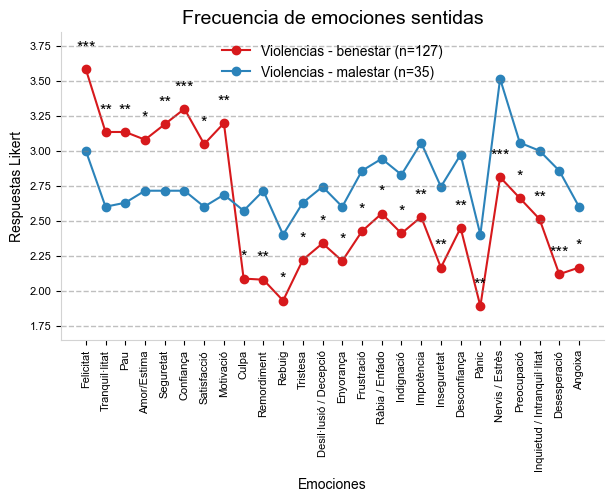

In [126]:
import matplotlib.pyplot as plt

# Funció per obtenir els asteriscs segons el valor p
def get_asterisks(p_value):
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return ""  # No mostrar res si no és significatiu

# 1️⃣ Ordenar les categories emocionals
primer_Grupo_data_likert = SEJ_conciencia_sentir_p1_likert.loc[benestar_violencies_idx]
segon_Grupo_data_likert = SEJ_conciencia_sentir_p1_likert.loc[malestar_violencies_idx]

# Definir els noms dels grups
primer_Grup_nom = "Violencias - benestar"
segon_Grup_nom = "Violencias - malestar"

# Definir els colors
color_primer = "#d7191c"
color_segon = "#2b83ba"

# 2️⃣ Guardar p-values de totes les comparacions per parelles
p_values_all = []
p_values_dict = {}

# 3️⃣ Comparar les distribucions globals (ANOVA o Kruskal-Wallis)
alpha = 0.05  # Nivell de significació

# Emmagatzemar els p-values significatius per cada emoció
significant_emotions = {}

for col in emociones_ordenadas:
    # Dades per cada grup
    data1 = primer_Grupo_data_likert[col]
    data2 = segon_Grupo_data_likert[col]

    # 4️⃣ Comprovació de normalitat per cada emoció (Shapiro-Wilk test)
    is_normal_1 = stats.shapiro(data1)[1] > 0.05
    is_normal_2 = stats.shapiro(data2)[1] > 0.05

    # 5️⃣ Seleccionar la prova estadística global
    if is_normal_1 and is_normal_2:
        stat, p_global = stats.f_oneway(data1, data2)  # ANOVA
        test_type = "ANOVA"
    else:
        stat, p_global = stats.kruskal(data1, data2)  # Kruskal-Wallis
        test_type = "Kruskal-Wallis"

    # 6️⃣ Si la prova global és significativa, fem comparacions per parelles
    if p_global < alpha:
        p_value_asterisks = get_asterisks(p_global)
        significant_emotions[col] = p_value_asterisks  # Guardem l'asterisc per a la categoria

        p_values_all.append(p_global)
        p_values_dict[col] = p_global

# Generar el gràfic amb les línies i asteriscs
fig, ax = plt.subplots(figsize=(7, 4))

# Mitjanes de cada grup per a les emocions significatives
mean_values = {
    primer_Grup_nom: primer_Grupo_data_likert[list(significant_emotions.keys())].mean(),
    segon_Grup_nom: segon_Grupo_data_likert[list(significant_emotions.keys())].mean(),
}
df_means = pd.DataFrame(mean_values)

# Reordenar l'índex segons les emocions significatives
df_means = df_means.reindex([emo for emo in emociones_ordenadas if emo in df_means.index])

# Dibuixar les línies de cada grup
ax.plot(df_means.index, df_means[primer_Grup_nom], marker='o', color=color_primer, 
        label=f"{primer_Grup_nom} (n={len(primer_Grupo_data_likert)})")
ax.plot(df_means.index, df_means[segon_Grup_nom], marker='o', color=color_segon, 
        label=f"{segon_Grup_nom} (n={len(segon_Grupo_data_likert)})")

# Afegir els asteriscs sobre les emocions significatives
for emo, p_value_asterisks in significant_emotions.items():
    if p_value_asterisks:  # Si l'emoció és significativa
        ax.text(emo, df_means[primer_Grup_nom][emo] + 0.1, p_value_asterisks, 
                ha='center', va='bottom', fontsize=12, color='black')

# Configurar eixos i títol
ax.set_xlabel("Emociones")
ax.set_ylabel("Respuestas Likert")
ax.set_title("Frecuencia de emociones sentidas", fontsize=14)

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
ax.legend(loc="upper center", fontsize=10, frameon=False)

plt.xticks(rotation=90)
plt.show()


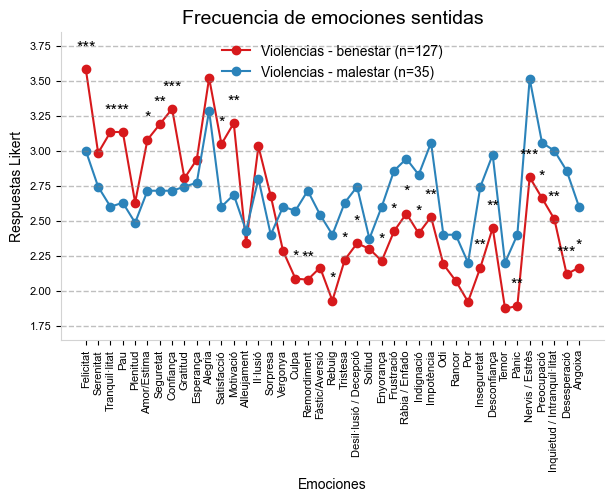

In [127]:
import matplotlib.pyplot as plt

# Funció per obtenir els asteriscs segons el valor p
def get_asterisks(p_value):
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return ""  # No mostrar res si no és significatiu

# 1️⃣ Ordenar les categories emocionals
primer_Grupo_data_likert = SEJ_conciencia_sentir_p1_likert.loc[benestar_violencies_idx]
segon_Grupo_data_likert = SEJ_conciencia_sentir_p1_likert.loc[malestar_violencies_idx]

# Definir els noms dels grups
primer_Grup_nom = "Violencias - benestar"
segon_Grup_nom = "Violencias - malestar"

# Definir els colors
color_primer = "#d7191c"
color_segon = "#2b83ba"

# 2️⃣ Guardar p-values de totes les comparacions per parelles
p_values_all = []
p_values_dict = {}

# 3️⃣ Comparar les distribucions globals (ANOVA o Kruskal-Wallis)
alpha = 0.05  # Nivell de significació

# Emmagatzemar els p-values significatius per cada emoció
significant_emotions = {}

for col in emociones_ordenadas:
    # Dades per cada grup
    data1 = primer_Grupo_data_likert[col]
    data2 = segon_Grupo_data_likert[col]

    # 4️⃣ Comprovació de normalitat per cada emoció (Shapiro-Wilk test)
    is_normal_1 = stats.shapiro(data1)[1] > 0.05
    is_normal_2 = stats.shapiro(data2)[1] > 0.05

    # 5️⃣ Seleccionar la prova estadística global
    if is_normal_1 and is_normal_2:
        stat, p_global = stats.f_oneway(data1, data2)  # ANOVA
        test_type = "ANOVA"
    else:
        stat, p_global = stats.kruskal(data1, data2)  # Kruskal-Wallis
        test_type = "Kruskal-Wallis"

    # 6️⃣ Si la prova global és significativa, fem comparacions per parelles
    if p_global < alpha:
        p_value_asterisks = get_asterisks(p_global)
        significant_emotions[col] = p_value_asterisks  # Guardem l'asterisc per a la categoria

        p_values_all.append(p_global)
        p_values_dict[col] = p_global
    else:
        significant_emotions[col] = ""  # Si no és significativa, deixem l'asterisc buit

# Generar el gràfic amb les línies per a totes les emocions
fig, ax = plt.subplots(figsize=(7, 4))

# Mitjanes de cada grup per a totes les emocions
mean_values = {
    primer_Grup_nom: primer_Grupo_data_likert.mean(),
    segon_Grup_nom: segon_Grupo_data_likert.mean(),
}
df_means = pd.DataFrame(mean_values)

# Reordenar l'índex segons les emocions significatives
df_means = df_means.reindex([emo for emo in emociones_ordenadas if emo in df_means.index])

# Dibuixar les línies de cada grup
ax.plot(df_means.index, df_means[primer_Grup_nom], marker='o', color=color_primer, 
        label=f"{primer_Grup_nom} (n={len(primer_Grupo_data_likert)})")
ax.plot(df_means.index, df_means[segon_Grup_nom], marker='o', color=color_segon, 
        label=f"{segon_Grup_nom} (n={len(segon_Grupo_data_likert)})")

# Afegir els asteriscs només sobre les emocions significatives
for emo, p_value_asterisks in significant_emotions.items():
    if p_value_asterisks:  # Si l'emoció és significativa
        ax.text(emo, df_means[primer_Grup_nom][emo] + 0.1, p_value_asterisks, 
                ha='center', va='bottom', fontsize=12, color='black')

# Configurar eixos i títol
ax.set_xlabel("Emociones")
ax.set_ylabel("Respuestas Likert")
ax.set_title("Frecuencia de emociones sentidas", fontsize=14)

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
ax.legend(loc="upper center", fontsize=10, frameon=False)

plt.xticks(rotation=90)
plt.show()


In [38]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño 
fig.savefig(f'{savePath}/violencias_malestar_vs_bienestar_frequencia_families_emocions_likert.png', format='png', bbox_inches='tight')

Fisher exact per Felicitat: p = 1.0000
Fisher exact per Serenitat: p = 0.1169
Fisher exact per Tranquil·litat: p = 0.5395
Fisher exact per Pau: p = 0.0000
Fisher exact per Plenitud: p = 0.0000
Fisher exact per Amor/Estima: p = 0.0000
Fisher exact per Seguretat: p = 0.1521
Fisher exact per Confiança: p = 0.5067
Fisher exact per Gratitud: p = 0.0000
Fisher exact per Esperança: p = 0.0000
Fisher exact per Alegria: p = 0.5408
Fisher exact per Satisfacció: p = 0.0101
Fisher exact per Motivació: p = 0.9143
Fisher exact per Alleujament: p = 0.0000
Fisher exact per Il·lusió: p = 0.0000
Fisher exact per Sorpresa: p = 0.0359
Fisher exact per Vergonya: p = 0.0001
Fisher exact per Culpa: p = 0.4878
Fisher exact per Remordiment: p = 0.0000
Fisher exact per Fàstic/Aversió: p = 0.0006
Fisher exact per Rebuig: p = 0.0000
Fisher exact per Tristesa: p = 0.0000
Fisher exact per Desil·lusió / Decepció: p = 0.0024
Fisher exact per Solitud: p = 0.0000
Fisher exact per Enyorança: p = 0.0053
Fisher exact per 

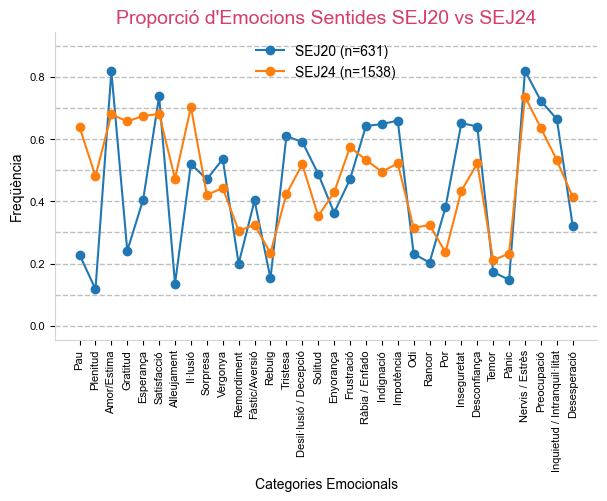

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests  # Per a Benjamini-Hochberg

# 1️⃣ Ordenar les categories emocionals
SEJ21_data_binary = SEJ21_conciencia_sentir_combined.copy()
SEJ_data_binary = SEJ_conciencia_sentir_combined.copy()

# 2️⃣ Guardar p-values de totes les emocions
p_values_all = []
p_values_dict = {}

alpha = 0.05  # Nivell de significació

# 3️⃣ Per cada emoció, construir la taula de contingència i aplicar la prova exacta de Fisher
for col in emociones_ordenadas:
    # Dades per cada grup (vector de 0's i 1's)
    data1 = SEJ21_data_binary[col]
    data2 = SEJ_data_binary[col]
    
    # Construir la taula: 
    # [ [n. d'1s en grup 1, n. de 0s en grup 1],
    #   [n. d'1s en grup 2, n. de 0s en grup 2] ]
    table = np.array([[data1.sum(), len(data1) - data1.sum()],
                      [data2.sum(), len(data2) - data2.sum()]])
    
    # Aplicar la prova exacta de Fisher
    _, p_global = stats.fisher_exact(table)
    print(f"Fisher exact per {col}: p = {p_global:.4f}")
    
    # Si la prova és significativa, guardar el p-value
    if p_global < alpha:
        p_values_all.append(p_global)
        p_values_dict[(col, "SEJ21", "SEJ24")] = p_global

# 4️⃣ Aplicar la correcció Benjamini-Hochberg (FDR)
if p_values_all:
    rejected, p_values_adjusted, _, _ = multipletests(p_values_all, alpha=alpha, method='fdr_bh')
    
    # Filtrar les emocions significatives després de la correcció
    significant_pairs = {
        k: p for k, p, reject in zip(p_values_dict.keys(), p_values_all, rejected) if reject
    }
else:
    significant_pairs = {}

# 5️⃣ Filtrar les emocions que resultin significatives
categories_final_significatives = { col for (col, _, _) in significant_pairs.keys() }

print("Categories on la diferència és significativa (després de FDR):", categories_final_significatives)

# 6️⃣ Generar la taula de p-values significatius
if significant_pairs:
    df_pvalues = pd.DataFrame([(col, g1, g2, p) for (col, g1, g2), p in significant_pairs.items()],
                              columns=["Categoria", "Grup 1", "Grup 2", "p-value ajustat"])
    df_pvalues.sort_values("p-value ajustat", inplace=True)
    print("\n📊 Taula de p-values significatius després de Benjamini-Hochberg (FDR):\n")
    print(df_pvalues.to_string(index=False))
else:
    print("No s'han trobat emocions amb diferències significatives.")

# 7️⃣ **Gràfic Line Plot amb les emocions significatives**
# La mitjana per a dades 0/1 correspon a la proporció d'1's.
if categories_final_significatives:
    mean_values = {
        "SEJ21": SEJ21_data_binary[list(categories_final_significatives)].mean(),
        "SEJ24": SEJ_data_binary[list(categories_final_significatives)].mean(),
    }
    df_means = pd.DataFrame(mean_values)
    
    # Reordenar l'índex segons la llista d'emocions (mantenint l'ordre de les que apareixen)
    df_means = df_means.reindex([emo for emo in emociones_ordenadas if emo in df_means.index])
    
    # Calcular el número de casos de cada grup
    n_primer = len(SEJ21_data_binary)
    n_segon = len(SEJ_data_binary)
    
    # Crear la figura i els eixos
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # Dibuixar cada línia amb la llegenda que inclou el número de casos
    ax.plot(df_means.index, df_means["SEJ21"], marker='o', 
            label=f"SEJ20 (n={n_primer})")
    ax.plot(df_means.index, df_means["SEJ24"], marker='o', 
            label=f"SEJ24 (n={n_segon})")
    
    # Configurar els eixos i el títol
    plt.xticks(rotation=90)
    ax.set_xlabel("Categories Emocionals")
    ax.set_ylabel("Frecuencia")
    ax.set_title("Proporció d'Emocions Sentides SEJ20 vs SEJ24", fontsize=14, color=color_titols)
    
    # Millorar l'estètica del gràfic
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#D3D3D3")
    ax.spines['bottom'].set_color("#D3D3D3")
    for y in ax.get_yticks():
        ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)
    
    # Afegir llegenda amb el label modificat
    ax.legend(loc="upper center", fontsize=10, frameon=False)
    
    plt.show()
else:
    print("No s'han trobat emocions amb diferències significatives per graficar.")


In [40]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño 
fig.savefig(f'{savePath}/SEJ20_SEJ24_frequencia_families_emocions_binary.png', format='png', bbox_inches='tight')

### **Comparación Frecuencia entre grupos en SEJ24**

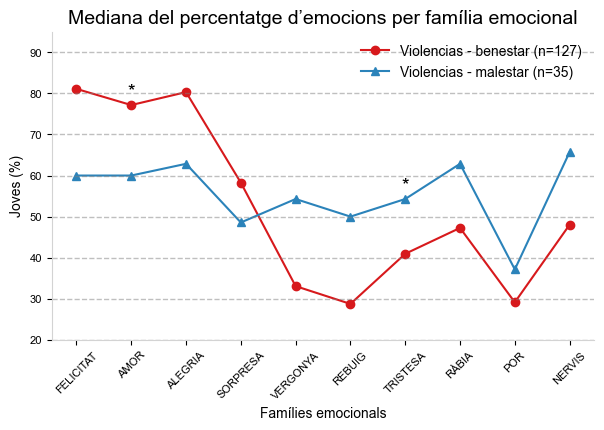

In [112]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.multitest as smm
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

#Definir nombre de grupos (respetcar ordre de les dades)
primer_Grup_nom = "Violencias - benestar"  #"Bullying - benestar", "Violencia de género - benestar","Discriminación u odio - benestar"
segon_Grup_nom = "Violencias - malestar"  #"Bullying - malestar", "Violencia de género - malestar","Discriminación u odio - malestar"


# Filtrar los datos para los dos grupos
primer_Grup_data = SEJ_conciencia_sentir_combined.loc[benestar_violencies_idx] #benestar_bullying_idx, benestar_violencia_genere_idx, benestar_discriminacio_odi_idx
segon_Grup_data = SEJ_conciencia_sentir_combined.loc[malestar_violencies_idx] #malestar_bullying_idx, malestar_violencia_genere_idx, malestar_discriminacio_odi_idx

# Contar la frecuencia de cada emoción en cada grupo
frecuencias_emociones_primer = primer_Grup_data.sum()
frecuencias_emociones_segon = segon_Grup_data.sum()

# Calcular los porcentajes en cada grupo
porcentajes_emociones_primer = (frecuencias_emociones_primer / len(primer_Grup_data)) * 100
porcentajes_emociones_segon = (frecuencias_emociones_segon / len(segon_Grup_data)) * 100

# Calcular la mediana del porcentaje de emociones en cada familia emocional
mediana_emociones_primer = {}
mediana_emociones_segon = {}

for familia, emociones in families_emocions.items():
    mediana_emociones_primer[familia] = porcentajes_emociones_primer[emociones].median()
    mediana_emociones_segon[familia] = porcentajes_emociones_segon[emociones].median()



# Diccionarios para almacenar resultados
p_values = {}
test_used = {}

# Función para determinar normalidad según el tamaño de la muestra
def es_normal(data):
    n = len(data)
    if n < 3:
        return False  # No se puede evaluar con tan pocos datos
    elif n < 10:
        return stats.kstest(data, 'norm').pvalue > 0.05  # Kolmogorov-Smirnov
    elif n < 50:
        return stats.shapiro(data).pvalue > 0.05  # Shapiro-Wilk
    else:
        return stats.normaltest(data).pvalue > 0.05  # D'Agostino-Pearson

# Evaluar cada familia emocional
for familia, emociones in families_emocions.items():
    datos_primer = porcentajes_emociones_primer[emociones].values
    datos_segon = porcentajes_emociones_segon[emociones].values

    normal_primer = es_normal(datos_primer)
    normal_segon = es_normal(datos_segon)

    # Elegir el test adecuado
    if normal_primer and normal_segon:
        stat, p = stats.ttest_ind(datos_primer, datos_segon, equal_var=False)  # Test t de Student
        test_used[familia] = "t-test"
    else:
        stat, p = stats.mannwhitneyu(datos_primer, datos_segon, alternative='two-sided')  # Mann-Whitney
        test_used[familia] = "Mann-Whitney"

    p_values[familia] = p

# Corrección FDR
rechazar, p_values_corr, _, _ = smm.multipletests(list(p_values.values()), method='fdr_bh') #  'fdr_bh'
p_values_corr_dict = dict(zip(p_values.keys(), p_values_corr))

# Extraer datos para graficar
familias = list(mediana_emociones_primer.keys())
porcentajes_primer = [mediana_emociones_primer[fam] for fam in familias]
porcentajes_segon = [mediana_emociones_segon[fam] for fam in familias]

# Colores
color_primer = "#d7191c"  
color_segon = "#2b83ba"   

# Crear la figura
fig, ax = plt.subplots(figsize=(7, 4))

# Dibujar las líneas para cada grupo
ax.plot(familias, porcentajes_primer, marker='o', linestyle='-', color=color_primer, label=f"{primer_Grup_nom} (n={len(primer_Grup_data)})")
ax.plot(familias, porcentajes_segon, marker='^', linestyle='-', color=color_segon, label=f"{segon_Grup_nom} (n={len(segon_Grup_data)})")

# Añadir asteriscos donde haya diferencias significativas después de FDR
for i, familia in enumerate(familias):
    if p_values[familia] < 0.05: #p_values_corr_dict
        ax.text(i, max(porcentajes_primer[i], porcentajes_segon[i]) + 2, '*', ha='center', fontsize=14, color='black')

# Configurar etiquetas y título
ax.set_title('Mediana del percentatge d’emocions per família emocional', fontsize=14, color="black")
ax.set_xlabel('Famílies emocionals')
ax.set_ylabel('Joves (%)')
ax.set_xticks(range(len(familias)))
ax.set_xticklabels(familias, rotation=45)

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)

# Líneas horizontales en los ticks del Y
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Leyenda
ax.legend(loc="upper right", fontsize=10, frameon=False)

# Mostrar gráfico
plt.show()


In [58]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/1er_Grup_2nd_Grup_ESO_frequencia_families_emocions.png', format='png', bbox_inches='tight')

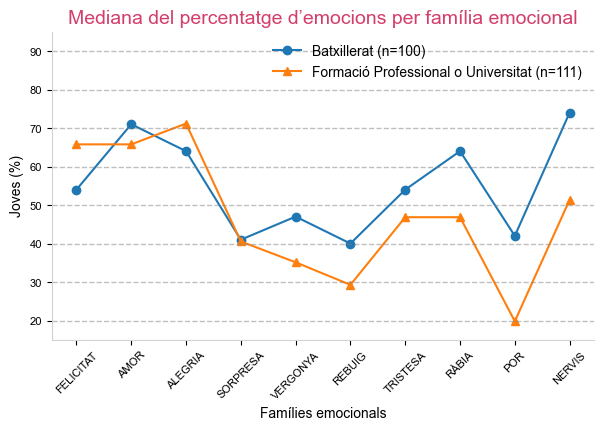

In [60]:
import matplotlib.pyplot as plt

# Filtrar los datos para los dos grupos
batxillerat_data = SEJ_conciencia_sentir_combined.loc[batxillerat_idx]
fp_uni_data = SEJ_conciencia_sentir_combined.loc[fp_universitat_idx]

# Contar la frecuencia de cada emoción en cada grupo
frecuencias_emociones_primer = batxillerat_data.sum()
frecuencias_emociones_segon = fp_uni_data.sum()

# Calcular los porcentajes en cada grupo
porcentajes_emociones_primer = (frecuencias_emociones_primer / len(batxillerat_data)) * 100
porcentajes_emociones_segon = (frecuencias_emociones_segon / len(fp_uni_data)) * 100

# Calcular la mediana del porcentaje de emociones en cada familia emocional
mediana_emociones_primer = {}
mediana_emociones_segon = {}

for familia, emociones in families_emocions.items():
    mediana_emociones_primer[familia] = porcentajes_emociones_primer[emociones].median()
    mediana_emociones_segon[familia] = porcentajes_emociones_segon[emociones].median()

# Extraer datos para graficar
familias = list(mediana_emociones_primer.keys())

porcentajes_primer = [mediana_emociones_primer[fam] for fam in familias]
porcentajes_segon = [mediana_emociones_segon[fam] for fam in familias]

# Definir colores para cada grupo
color_primer = "#1f77b4"  # Azul
color_segon = "#ff7f0e"   # Naranja

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(7, 4))

# Dibujar las líneas para cada grupo
ax.plot(familias, porcentajes_primer, marker='o', linestyle='-', color=color_primer, label=f"Batxillerat (n={len(batxillerat_data)})")
ax.plot(familias, porcentajes_segon, marker='^', linestyle='-', color=color_segon, label=f"Formació Professional o Universitat (n={len(fp_uni_data)})")

# Configurar etiquetas y título
ax.set_title('Mediana del percentatge d’emocions per família emocional', fontsize=14, color=color_titols)
ax.set_xlabel('Famílies emocionals')
ax.set_ylabel('Joves (%)')
ax.set_xticks(range(len(familias)))
ax.set_xticklabels(familias, rotation=45)

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(15, 95)

# Añadir líneas horizontales en los ticks del Y
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Añadir leyenda
ax.legend(loc="upper right", fontsize=10, frameon=False)

# Mostrar gráfico
plt.show()


In [61]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/Batx_FP_o_uni_frequencia_families_emocions.png', format='png', bbox_inches='tight')

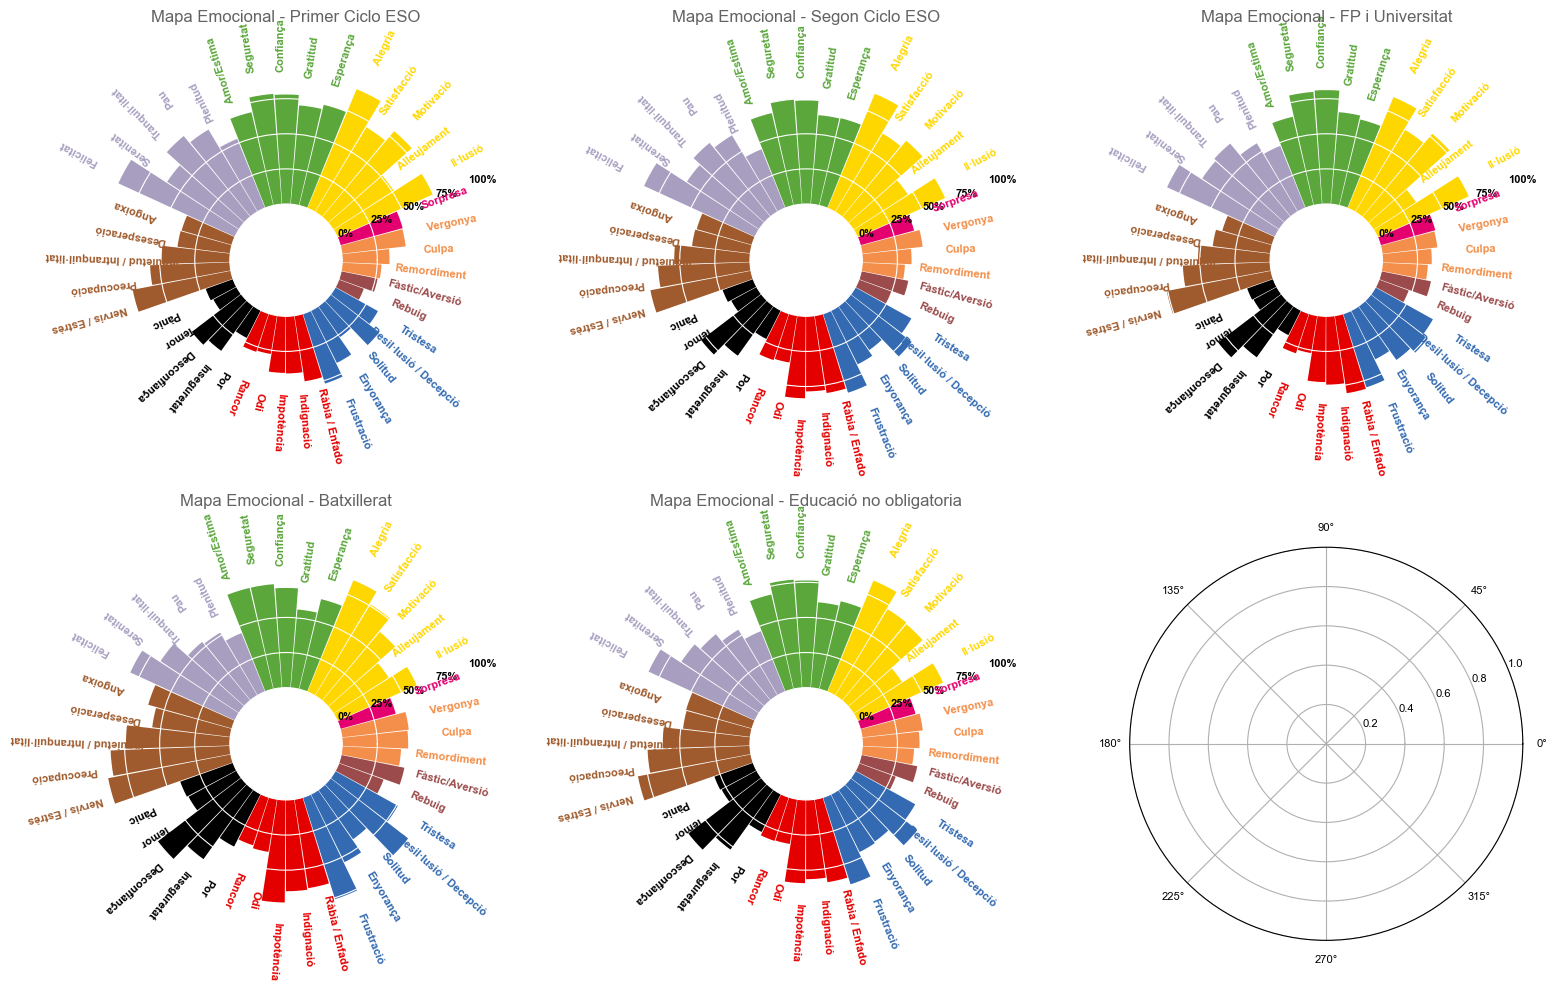

In [30]:
filters = {
    'Primer Ciclo ESO': primer_Grupo_ESO_idx,
    'Segon Ciclo ESO': segon_Grupo_ESO_idx ,
    'FP i Universitat': fp_universitat_idx,
    'Batxillerat': batxillerat_idx,
    'Educació no obligatoria': educació_no_obligatoria_idx,
    'Primer Ciclo ESO': primer_Grupo_ESO_idx
}

fig, axes = plt.subplots(2, 3, figsize=(16, 10), subplot_kw={'projection': 'polar'})
axes = axes.flatten()

for ax, (agrupacio, idx) in zip(axes, filters.items()):
    # Contar la frecuencia de cada emoción
    frecuencias_emociones = SEJ_conciencia_sentir_combined.loc[idx].sum()
    total_participants = len(SEJ_conciencia_sentir_combined.loc[idx])
    
    # Calcular los porcentajes
    porcentajes_emociones = (frecuencias_emociones / total_participants) * 100
    
    # Ordenar las emociones según el diccionario de familias
    emociones_ordenadas = []
    for familia, emociones in families_emocions.items():
        emociones_ordenadas.extend(emociones)
    emociones_ordenadas = emociones_ordenadas[::-1]
    
    # Filtrar y reordenar los porcentajes y colores según emociones_ordenadas
    porcentajes_ordenados = porcentajes_emociones[emociones_ordenadas]
    colores_ordenados = [color_dict[emocion] for emocion in emociones_ordenadas]
    
    # Configurar gráfico polar
    num_emociones = len(porcentajes_ordenados)
    theta = np.linspace(0.0, 2 * np.pi, num_emociones, endpoint=False) + np.pi - np.pi/9 
    ancho_barra = (2 * np.pi / num_emociones) * 0.95
    
    # Crear las barras con bottom=40
    bars = ax.bar(theta, porcentajes_ordenados, width=ancho_barra, color=colores_ordenados, bottom=40)
    
    # Ajustar el radio
    ax.set_ylim(0, max(porcentajes_ordenados) + 40)
    ax.spines['polar'].set_visible(False)
    ax.grid(color='white', linestyle='-', linewidth=0.8)
    
    # Configurar niveles circulares
    circular_levels = [40, 65, 90, 115, 140]
    ax.set_yticks(circular_levels)
    ax.set_yticklabels([f'{int(level - 40)}%' for level in circular_levels], fontsize=8, fontweight='bold')
    
    # Etiquetar emociones
    for bar, emocion, color, angle in zip(bars, emociones_ordenadas, colores_ordenados, theta):
        height = bar.get_height()
        angle += ancho_barra / 32
        rotation = np.degrees(angle)
        ax.text(angle, height + 75, emocion, ha='center', va='bottom', 
                rotation=rotation, rotation_mode='anchor', color=color, fontsize=8, fontweight='bold')
    
    # Configurar título
    ax.set_xticks([])
    ax.set_title(f'Mapa Emocional - {agrupacio}', fontsize=12, color=color_titols, pad=30)

plt.tight_layout()
plt.show()

In [65]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/per_ocupació_equalitzador_emocional_frequencia_families_emocions.png', format='png', bbox_inches='tight')

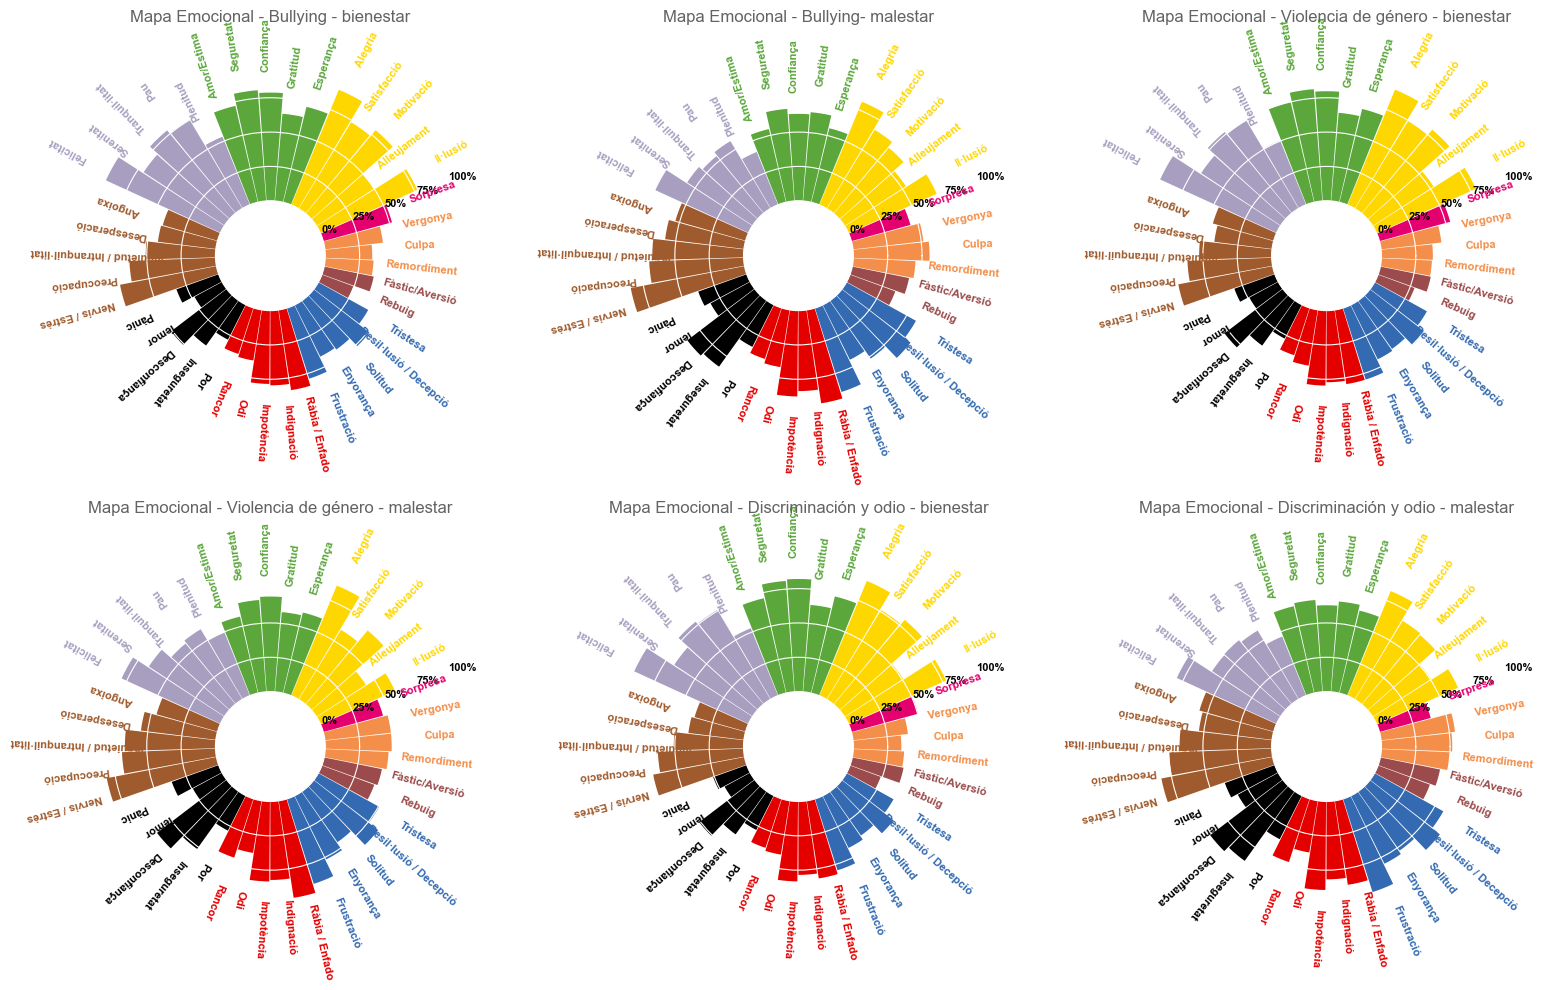

In [77]:
filters = {
    'Bullying - bienestar': benestar_bullying_idx,
    'Bullying- malestar': malestar_bullying_idx ,
    'Violencia de género - bienestar': benestar_violencia_genere_idx,
    'Violencia de género - malestar': malestar_violencia_genere_idx,
    'Discriminación y odio - bienestar': benestar_discriminacio_odi_idx,
    'Discriminación y odio - malestar': malestar_discriminacio_odi_idx
}

fig, axes = plt.subplots(2, 3, figsize=(16, 10), subplot_kw={'projection': 'polar'})
axes = axes.flatten()

for ax, (agrupacio, idx) in zip(axes, filters.items()):
    # Contar la frecuencia de cada emoción
    frecuencias_emociones = SEJ_conciencia_sentir_combined.loc[idx].sum()
    total_participants = len(SEJ_conciencia_sentir_combined.loc[idx])
    
    # Calcular los porcentajes
    porcentajes_emociones = (frecuencias_emociones / total_participants) * 100
    
    # Ordenar las emociones según el diccionario de familias
    emociones_ordenadas = []
    for familia, emociones in families_emocions.items():
        emociones_ordenadas.extend(emociones)
    emociones_ordenadas = emociones_ordenadas[::-1]
    
    # Filtrar y reordenar los porcentajes y colores según emociones_ordenadas
    porcentajes_ordenados = porcentajes_emociones[emociones_ordenadas]
    colores_ordenados = [color_dict[emocion] for emocion in emociones_ordenadas]
    
    # Configurar gráfico polar
    num_emociones = len(porcentajes_ordenados)
    theta = np.linspace(0.0, 2 * np.pi, num_emociones, endpoint=False) + np.pi - np.pi/9 
    ancho_barra = (2 * np.pi / num_emociones) * 0.95
    
    # Crear las barras con bottom=40
    bars = ax.bar(theta, porcentajes_ordenados, width=ancho_barra, color=colores_ordenados, bottom=40)
    
    # Ajustar el radio
    ax.set_ylim(0, max(porcentajes_ordenados) + 40)
    ax.spines['polar'].set_visible(False)
    ax.grid(color='white', linestyle='-', linewidth=0.8)
    
    # Configurar niveles circulares
    circular_levels = [40, 65, 90, 115, 140]
    ax.set_yticks(circular_levels)
    ax.set_yticklabels([f'{int(level - 40)}%' for level in circular_levels], fontsize=8, fontweight='bold')
    
    # Etiquetar emociones
    for bar, emocion, color, angle in zip(bars, emociones_ordenadas, colores_ordenados, theta):
        height = bar.get_height()
        angle += ancho_barra / 32
        rotation = np.degrees(angle)
        ax.text(angle, height + 75, emocion, ha='center', va='bottom', 
                rotation=rotation, rotation_mode='anchor', color=color, fontsize=8, fontweight='bold')
    
    # Configurar título
    ax.set_xticks([])
    ax.set_title(f'Mapa Emocional - {agrupacio}', fontsize=12, color=color_titols, pad=30)

plt.tight_layout()
plt.show()

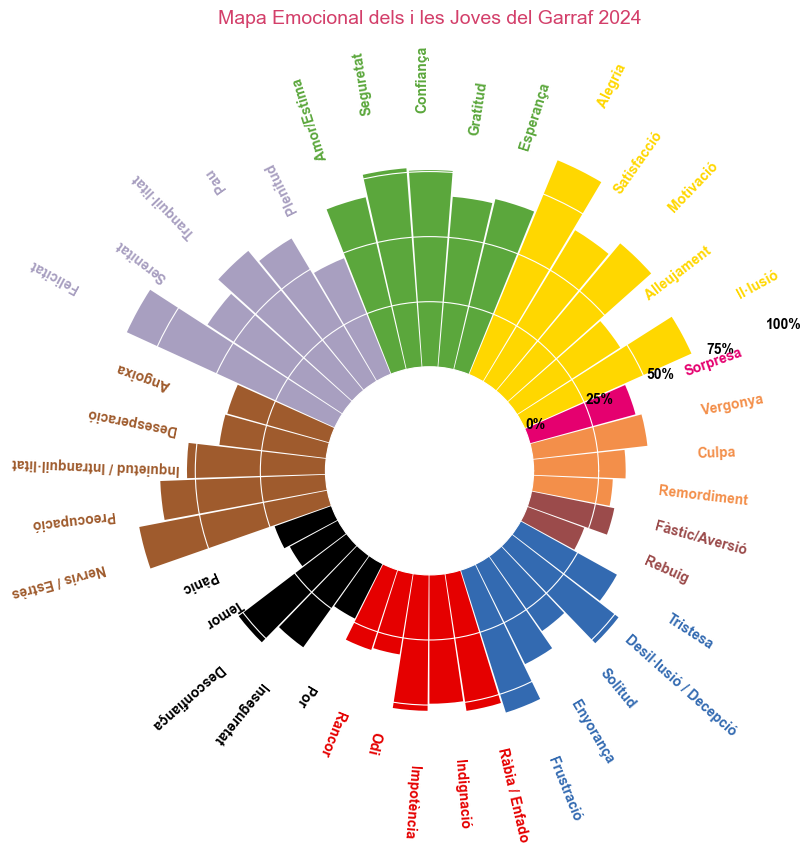

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Contar la frecuencia de cada emoción (columnas)
frecuencias_emociones = SEJ_conciencia_sentir_combined.sum()
total_participants = len(SEJ_conciencia_sentir_combined)

# Calcular los porcentajes
porcentajes_emociones = (frecuencias_emociones / total_participants) * 100

# Crear una lista de emociones ordenadas según el diccionario de familias
emociones_ordenadas = []
for familia, emociones in families_emocions.items():
    emociones_ordenadas.extend(emociones)

# Invertir el orden de las emociones para obtener una disposición en espejo
emociones_ordenadas = emociones_ordenadas[::-1]

# Filtrar y reordenar los porcentajes y colores según emociones_ordenadas
porcentajes_ordenados = porcentajes_emociones[emociones_ordenadas]
colores_ordenados = [color_dict[emocion] for emocion in emociones_ordenadas]

# Número de emociones
num_emociones = len(porcentajes_ordenados)

# Ángulos para cada barra (giro 180 grados sumando pi radianes)
theta = np.linspace(0.0, 2 * np.pi, num_emociones, endpoint=False) + np.pi - np.pi/9 

# Ancho de cada barra con separación
ancho_barra = (2 * np.pi / num_emociones) * 0.95  # Reducir el ancho de las barras al 95%

# Crear un gráfico polar
fig, ax = plt.subplots(figsize=(8.27, 11.69), subplot_kw={'projection': 'polar'})  # Tamaño A4 (DINA4)

# Crear las barras con bottom=40
bars = ax.bar(theta, porcentajes_ordenados, width=ancho_barra, color=colores_ordenados, bottom=40)

# Ajustar el radio mínimo y máximo
ax.set_ylim(0, max(porcentajes_ordenados) + 40)

# Eliminar líneas radiales
ax.spines['polar'].set_visible(False)
ax.grid(color='white', linestyle='-', linewidth=0.8)

# Definir los niveles circulares con la compensación de bottom=40
circular_levels = [40, 40 + 25, 40 + 50, 40 + 75, 40 + 100]  # Se suman a 40
ax.set_yticks(circular_levels)
ax.set_yticklabels([f'{int(level - 40)}%' for level in circular_levels], color='black', fontsize=10, fontweight='bold')

# Escribir el nombre de cada emoción alineado con la barra
for bar, emocion, color, angle in zip(bars, emociones_ordenadas, colores_ordenados, theta):
    height = bar.get_height()
    angle += ancho_barra / 32  # Centrar el texto en la barra
    rotation = np.degrees(angle)

    # Ajustar la rotación para que el texto sea legible
    ax.text(angle, height + 75, emocion, ha='center', va='bottom', 
            rotation=rotation, rotation_mode='anchor', color=color, fontsize=10, fontweight='bold')

# Estilizar el gráfico
ax.set_xticks([])  # Eliminar etiquetas de las emociones en el perímetro
ax.set_title('Mapa Emocional dels i les Joves del Garraf 2024', fontsize=14, color=color_titols, pad=60)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [67]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/equalitzador_emocional_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

In [68]:
porcentajes_emociones

Alegria                         89.076723
Amor/Estima                     67.945384
Confiança                       75.552666
Desconfiança                    52.145644
Desil·lusió / Decepció          51.885566
Fàstic/Aversió                  32.444733
Felicitat                       87.906372
Impotència                      52.210663
Indignació                      49.479844
Inquietud / Intranquil·litat    53.185956
Inseguretat                     43.368010
Motivació                       74.057217
Nervis / Estrès                 73.602081
Por                             23.602081
Preocupació                     63.524057
Ràbia / Enfado                  53.315995
Satisfacció                     68.075423
Seguretat                       76.592978
Serenitat                       62.158648
Solitud                         35.240572
Sorpresa                        42.067620
Tranquil·litat                  69.505852
Tristesa                        42.327698
Vergonya                        44

#### **Añadir la frecuencia de emociones por etapa educativa**
Siguientes categorias:

- Primera etapa de la ESO
- Segunda etapa de la ESO
- Formació educativa no obligatoria

#### **Añadir la frecuencia de emociones por etapa postobligatorias**
Siguientes categorias:

- Batxillerat
- Formació Profesinal o Universitat


### **Matriz de correlación y dendograma con clustering hierarchico para mirar el grado de coorelación (concordancia) entre emociones**

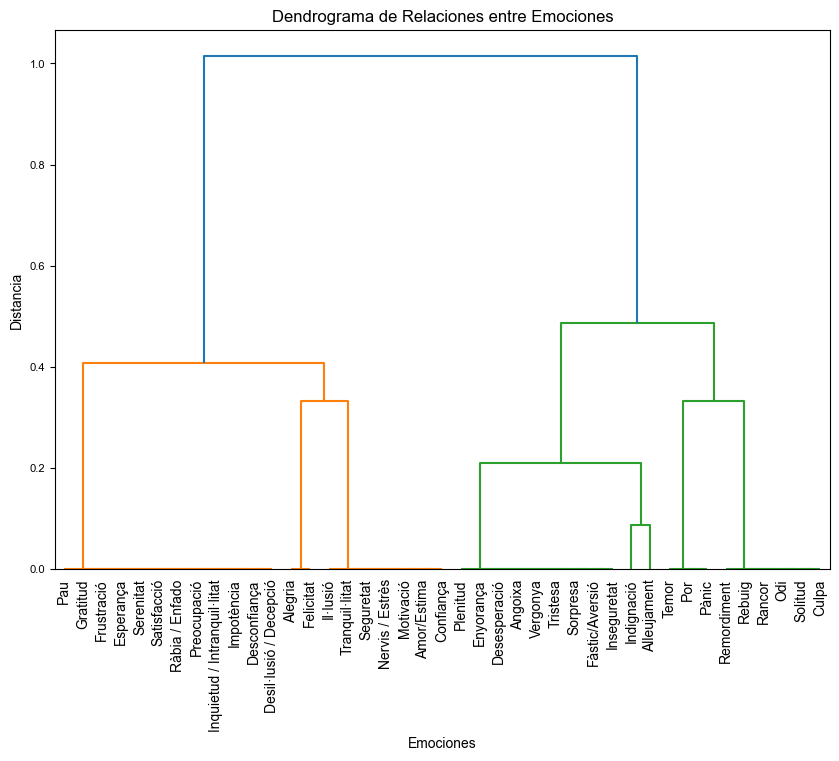

In [69]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# Calcular la matriz de correlación de Kendall
kendall_corr = porcentajes_por_emocion.corr(method='kendall')
#kendall_corr = conteo_emociones_filtrado.corr(method='kendall')


# Convertir la matriz de correlación en una matriz de distancias
distance_matrix = 1 - kendall_corr

# Convertir la matriz cuadrada de distancias en una matriz condensada
condensed_distance = ssd.squareform(distance_matrix)

# Realizar el clustering jerárquico usando la matriz de distancias condensada
# Possible millora: Si vols tenir més control sobre com es fa el clustering, 
# pots canviar method='average' per altres mètodes com ward, complete o single per veure si el patró canvia.
linkage_matrix = sch.linkage(condensed_distance, method='average') 

# Obtener el orden de los grupos desde el dendrograma
dendro_order = sch.leaves_list(linkage_matrix)

# Reordenar la matriz de correlación
sorted_kendall_corr = kendall_corr.iloc[dendro_order, dendro_order]


# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendro = sch.dendrogram(linkage_matrix, labels=kendall_corr.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma de Relaciones entre Emociones')
plt.xlabel('Emociones')
plt.ylabel('Distancia')
plt.show()

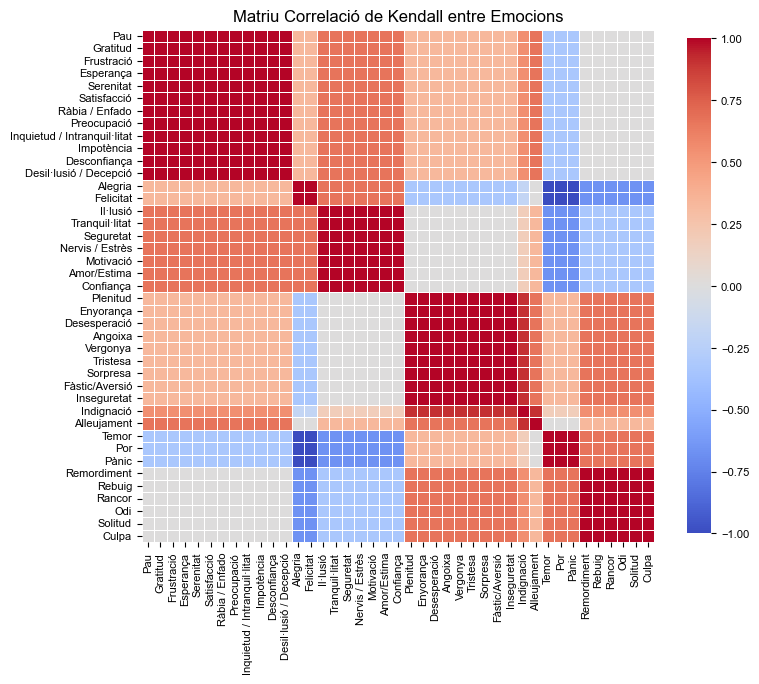

In [41]:
# Crear un mapa de calor para la correlación de Kendall
fig, ax = plt.subplots(figsize=(8.27, 11.69)) # Crear figura con el tamaño de A4 (DINA4)

# Crear un mapa de calor per a la correlació de Kendall
sns.heatmap(sorted_kendall_corr, annot=False, cmap='coolwarm', fmt=".1f", square=True, 
            cbar_kws={"shrink": .55}, linewidths=.5, ax=ax)
ax.set_title('Matriu Correlació de Kendall entre Emocions')
plt.show()

In [104]:
# Si se quiere guardar el gráfico al PC

# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/matriu_correlació_kendall_emocions_A4.png', format='png', bbox_inches='tight')

**Amb significancia:**

C:\Users\sebas\AppData\Local\Temp\ipykernel_15364\2745487214.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significance_matrix = sorted_p_values.applymap(significance_marker)


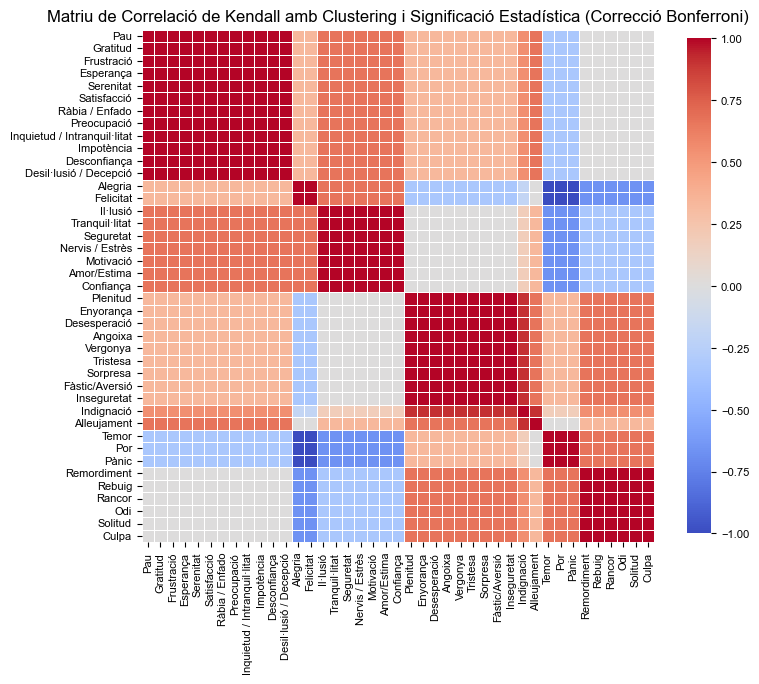

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.spatial import distance
from scipy.cluster import hierarchy
from statsmodels.stats.multitest import multipletests

# 1️⃣ Calcular la matriu de correlació de Kendall i la matriu de p-values
kendall_corr = porcentajes_por_emocion.corr(method='kendall')
p_values = pd.DataFrame(index=kendall_corr.index, columns=kendall_corr.columns)

for col1 in kendall_corr.columns:
    for col2 in kendall_corr.columns:
        tau, p_value = kendalltau(porcentajes_por_emocion[col1], porcentajes_por_emocion[col2])
        p_values.loc[col1, col2] = p_value

# 2️⃣ Correcció per testos múltiples (Bonferroni per ser més conservatius)
flat_p_values = p_values.values.flatten().astype(float)
#_, corrected_p_values, _, _ = multipletests(flat_p_values, method='bonferroni') # Molt conservatiu: Descartem falsos negatius per que volem els positius is o si
_, corrected_p_values, _, _ = multipletests(flat_p_values, method='fdr_bh') # Menys conservatiu: No volem descartat el falsos negatius, i acceptem alguns falsos positius
corrected_p_values = corrected_p_values.reshape(p_values.shape)
p_values = pd.DataFrame(corrected_p_values, index=p_values.index, columns=p_values.columns)

# 3️⃣ Aplicar clustering per reordenar la matriu de correlació
distance_matrix = 1 - kendall_corr  # Convertir correlació en distància
condensed_distance = distance.squareform(distance_matrix)  # Convertir en matriu condensada
linkage_matrix = hierarchy.linkage(condensed_distance, method='average')  # Fer clustering jeràrquic # average,  ward, complete o single
dendro_order = hierarchy.leaves_list(linkage_matrix)  # Obtenir l'ordre dels grups

# 4️⃣ Reordenar la matriu de correlació i la matriu de p-values segons el clustering
sorted_kendall_corr = kendall_corr.iloc[dendro_order, dendro_order]
sorted_p_values = p_values.iloc[dendro_order, dendro_order]

# 5️⃣ Crear una matriu amb els asteriscs de significació
def significance_marker(val_p):
    if val_p < 0.001:
        return "***"
    elif val_p < 0.01:
        return "**"
    elif val_p < 0.05:
        return "*"
    else:
        return ""

significance_matrix = sorted_p_values.applymap(significance_marker)

# 6️⃣ Configurar la mida dels asteriscs (es pot modificar aquí)
font_size = 8  # Modifica segons preferència

# 7️⃣ Crear el mapa de calor
fig, ax = plt.subplots(figsize=(8.27, 11.69))  # Tamany A4

sns.heatmap(sorted_kendall_corr.astype(float), annot=significance_matrix, cmap='coolwarm', fmt="", 
            square=True, cbar_kws={"shrink": .55}, linewidths=.5, ax=ax, annot_kws={"size": font_size})

ax.set_title('Matriu de Correlació de Kendall amb Clustering i Significació Estadística (Correcció Bonferroni)')
plt.show()


In [106]:
# Si se quiere guardar el gráfico al PC

# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/matriu_correlació_kendall_emocions_significatiu.png', format='png', bbox_inches='tight')

C:\Users\sebas\AppData\Local\Temp\ipykernel_15364\4079991016.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significance_matrix = sorted_p_values.applymap(significance_marker)


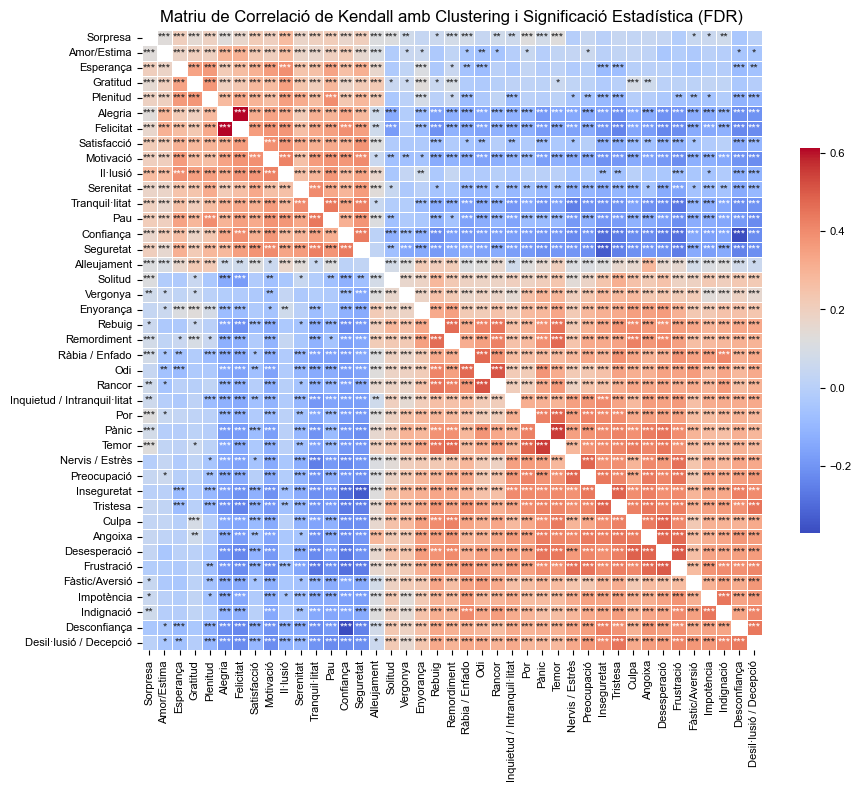

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.stats.multitest import multipletests


# 1️⃣ Calcular la matriu de correlació de Kendall i la matriu de p-values
kendall_corr = SEJ_conciencia_sentir_p1_likert.corr(method='kendall')
p_values = pd.DataFrame(index=kendall_corr.index, columns=kendall_corr.columns)

for col1 in kendall_corr.columns:
    for col2 in kendall_corr.columns:
        tau, p_value = kendalltau(SEJ_conciencia_sentir_p1_likert[col1], SEJ_conciencia_sentir_p1_likert[col2])
        p_values.loc[col1, col2] = p_value

# 2️⃣ Correcció de testos múltiples (FDR Benjamini-Hochberg per ser menys conservatiu)
flat_p_values = p_values.values.flatten().astype(float)
#_, corrected_p_values, _, _ = multipletests(flat_p_values, method='bonferroni') # Molt conservatiu: Descartem falsos negatius per que volem els positius is o si
_, corrected_p_values, _, _ = multipletests(flat_p_values, method='fdr_bh') # Menys conservatiu: No volem descartat el falsos negatius, i acceptem alguns falsos positius
corrected_p_values = corrected_p_values.reshape(p_values.shape)
p_values = pd.DataFrame(corrected_p_values, index=p_values.index, columns=p_values.columns)

# 3️⃣ Aplicar clustering per reordenar la matriu de correlació
distance_matrix = 1 - kendall_corr  # Convertir correlació en distància
condensed_distance = squareform(distance_matrix)  # Convertir en matriu condensada
linkage_matrix = linkage(condensed_distance, method='average')  # Clustering jeràrquic
dendro_order = dendrogram(linkage_matrix, labels=kendall_corr.columns, no_plot=True)['leaves']  # Obtenir l'ordre

# 4️⃣ Reordenar la matriu de correlació i la matriu de p-values segons el clustering
sorted_kendall_corr = kendall_corr.iloc[dendro_order, dendro_order]
sorted_p_values = p_values.iloc[dendro_order, dendro_order]

# 🚨 Eliminar la diagonal (substituir per NaN perquè no afecti l'escala de colors)
np.fill_diagonal(sorted_kendall_corr.values, np.nan)

# 5️⃣ Crear una matriu amb els asteriscs de significació
def significance_marker(val_p):
    if val_p < 0.001:
        return "***"
    elif val_p < 0.01:
        return "**"
    elif val_p < 0.05:
        return "*"
    else:
        return ""

significance_matrix = sorted_p_values.applymap(significance_marker)

# 6️⃣ Configurar la mida dels asteriscs (ajustable aquí)
font_size = 8  

# 7️⃣ Crear el mapa de calor amb les emocions ordenades segons el dendrograma
fig, ax = plt.subplots(figsize=(10, 10))  # Ajusta el tamany segons convingui

sns.heatmap(sorted_kendall_corr.astype(float), annot=significance_matrix, cmap='coolwarm', fmt="", 
            square=True, cbar_kws={"shrink": .5}, linewidths=.5, ax=ax, annot_kws={"size": font_size})

ax.set_title('Matriu de Correlació de Kendall amb Clustering i Significació Estadística (FDR)')
plt.show()


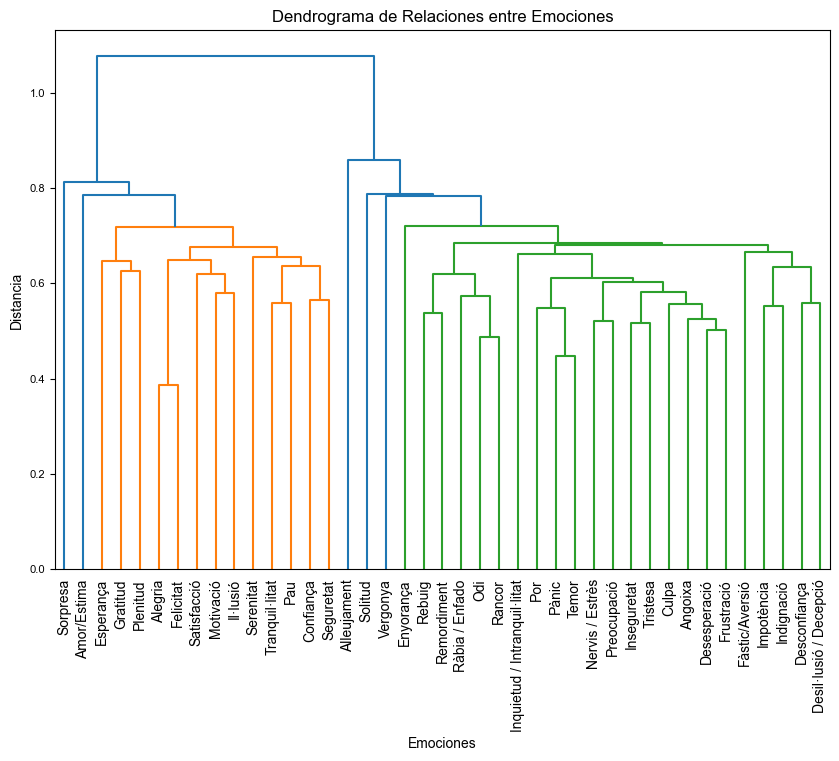

In [44]:
# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendro = sch.dendrogram(linkage_matrix, labels=kendall_corr.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma de Relaciones entre Emociones')
plt.xlabel('Emociones')
plt.ylabel('Distancia')
plt.show()

### Valorar número de clusters

In [81]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Tallar el dendrograma per obtenir els grups
num_clusters = 10  # Nombre de grups a definir (ajustable segons les necessitats)
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Crear un diccionari amb les emocions agrupades per clusters
cluster_groups = {}
for emotion, cluster in zip(kendall_corr.index, clusters):
    if cluster not in cluster_groups:
        cluster_groups[cluster] = []
    cluster_groups[cluster].append(emotion)

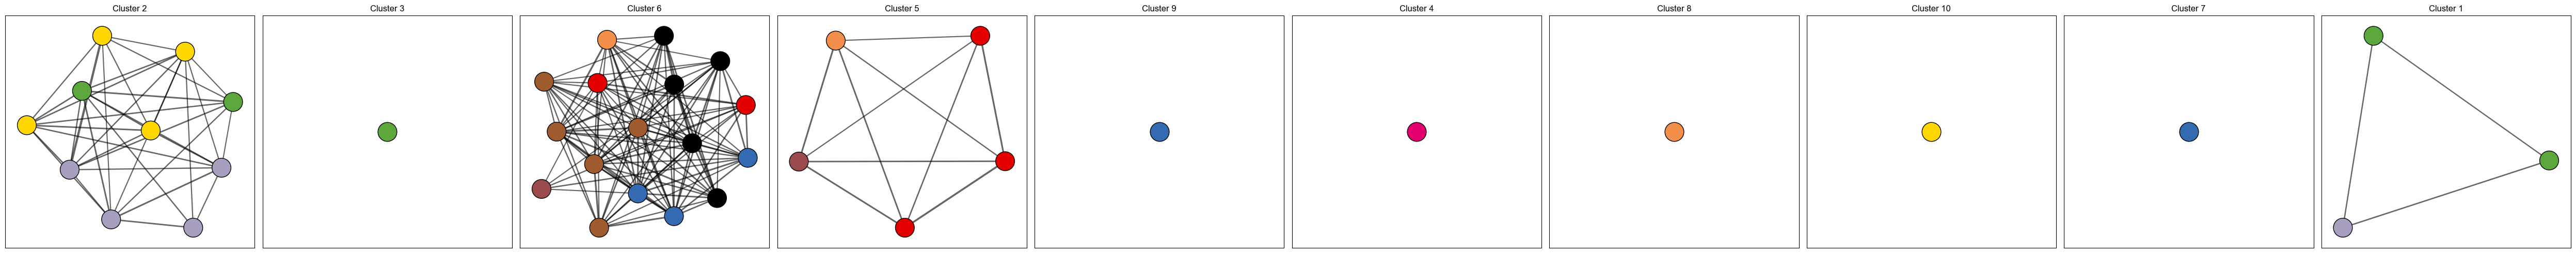

In [80]:
import networkx as nx
import matplotlib.pyplot as plt

# 1️⃣ Definir llindars (ajustables)
threshold_correlation = 0.2  # Mínima correlació per afegir una connexió al graf
threshold_p_value = 0.05  # Màxim p-value per considerar una connexió significativa
threshold_edge_drawing = 0.3  # Nou llindar per DIBUIXAR la connexió, però no per crear-la
show_labels = False  # 👈🏼 Controla si es mostren els noms de les emocions
default_color = "#808080"  # Color per defecte si una emoció no és al diccionari

# 2️⃣ Crear subgràfics per cada cluster
num_subplots = len(cluster_groups)
fig, axes = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))

if num_subplots == 1:
    axes = [axes]  # Si només hi ha un grup, fem que axes sigui iterable

for ax, (cluster, emotions) in zip(axes, cluster_groups.items()):
    G = nx.Graph()

    # Afegir nodes amb colors
    node_colors = []
    for emotion in emotions:
        G.add_node(emotion)
        node_colors.append(color_dict.get(emotion, default_color))  # Assignar color

    # Afegir arestes si compleixen threshold_correlation i threshold_p_value
    edge_weights = {}  # Guardem els pesos per a l'etapa de dibuix
    for i in range(len(emotions)):
        for j in range(i + 1, len(emotions)):
            weight = kendall_corr.loc[emotions[i], emotions[j]]
            p_value = p_values.loc[emotions[i], emotions[j]]

            # Afegim al graf (independent del dibuix)
            if abs(weight) > threshold_correlation and p_value < threshold_p_value:
                G.add_edge(emotions[i], emotions[j], weight=weight)
                edge_weights[(emotions[i], emotions[j])] = weight  # Guardem el pes per dibuixar més tard

    # Assignar layout
    pos = nx.spring_layout(G, seed=42)

    # Dibuixar nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=700, node_color=node_colors, edgecolors="black")

    # Controlar si es mostren les etiquetes (noms de les emocions)
    if show_labels:
        nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_weight="bold")

    # Dibuixar només les arestes que superin el threshold_edge_drawing
    edges_to_draw = [(u, v) for (u, v), weight in edge_weights.items() if abs(weight) > threshold_edge_drawing]
    edge_widths = [abs(edge_weights[(u, v)]) * 5 for (u, v) in edges_to_draw]  # Amplada proporcional

    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edges_to_draw, width=edge_widths, alpha=0.6)

    ax.set_title(f"Cluster {cluster}")

# 3️⃣ Ajustar la visualització
plt.tight_layout()
plt.show()


C:\Users\sebas\AppData\Local\Temp\ipykernel_15364\343599981.py:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significance_matrix = sorted_p_values.applymap(significance_marker)


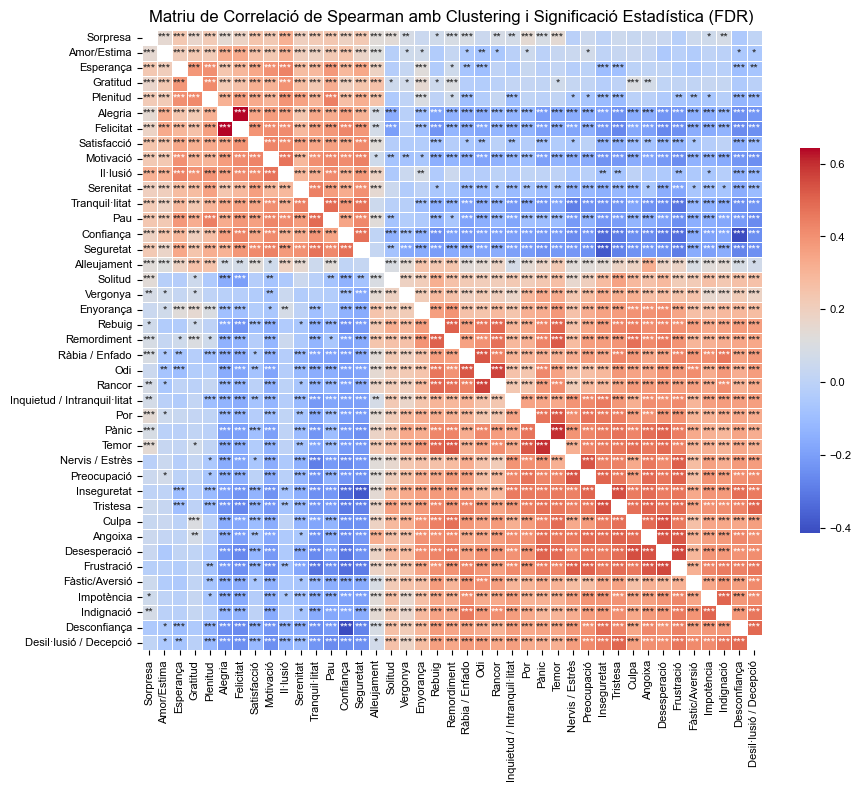

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.stats.multitest import multipletests


# 1️⃣ Calcular la matriu de correlació de Spearman i la matriu de p-values
spearman_corr = SEJ_conciencia_sentir_p1_likert.corr(method='spearman')
p_values = pd.DataFrame(index=spearman_corr.index, columns=spearman_corr.columns)

for col1 in spearman_corr.columns:
    for col2 in spearman_corr.columns:
        rho, p_value = spearmanr(SEJ_conciencia_sentir_p1_likert[col1], SEJ_conciencia_sentir_p1_likert[col2])
        p_values.loc[col1, col2] = p_value

# 2️⃣ Correcció de testos múltiples (FDR Benjamini-Hochberg per ser menys conservatiu)
flat_p_values = p_values.values.flatten().astype(float)
_, corrected_p_values, _, _ = multipletests(flat_p_values, method='fdr_bh')
corrected_p_values = corrected_p_values.reshape(p_values.shape)
p_values = pd.DataFrame(corrected_p_values, index=p_values.index, columns=p_values.columns)

# 3️⃣ Aplicar clustering per reordenar la matriu de correlació
distance_matrix = 1 - spearman_corr  # Convertir correlació en distància
condensed_distance = squareform(distance_matrix)  # Convertir en matriu condensada
linkage_matrix = linkage(condensed_distance, method='average')  # Clustering jeràrquic
dendro_order = dendrogram(linkage_matrix, labels=spearman_corr.columns, no_plot=True)['leaves']  # Obtenir l'ordre

# 4️⃣ Reordenar la matriu de correlació i la matriu de p-values segons el clustering
sorted_spearman_corr = spearman_corr.iloc[dendro_order, dendro_order]
sorted_p_values = p_values.iloc[dendro_order, dendro_order]

# 🚨 Eliminar la diagonal (substituir per NaN perquè no afecti l'escala de colors)
np.fill_diagonal(sorted_spearman_corr.values, np.nan)

# 5️⃣ Crear una matriu amb els asteriscs de significació
def significance_marker(val_p):
    if val_p < 0.001:
        return "***"
    elif val_p < 0.01:
        return "**"
    elif val_p < 0.05:
        return "*"
    else:
        return ""

significance_matrix = sorted_p_values.applymap(significance_marker)

# 6️⃣ Configurar la mida dels asteriscs (ajustable aquí)
font_size = 8  

# 7️⃣ Crear el mapa de calor amb les emocions ordenades segons el dendrograma
fig, ax = plt.subplots(figsize=(10, 10))  # Ajusta el tamany segons convingui

sns.heatmap(sorted_spearman_corr.astype(float), annot=significance_matrix, cmap='coolwarm', fmt="", 
            square=True, cbar_kws={"shrink": .5}, linewidths=.5, ax=ax, annot_kws={"size": font_size})

ax.set_title('Matriu de Correlació de Spearman amb Clustering i Significació Estadística (FDR)')
plt.show()


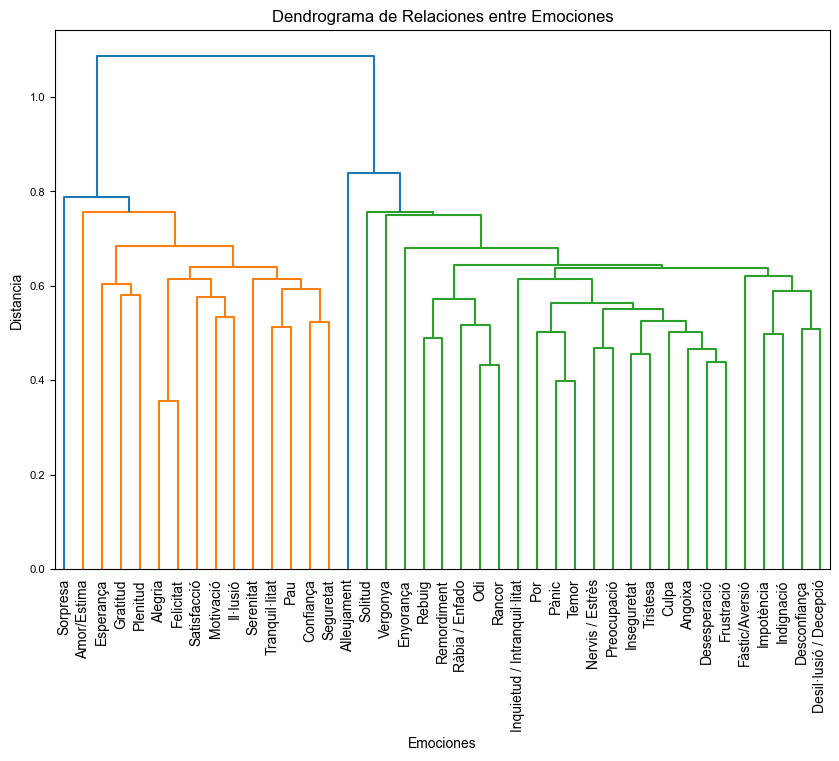

In [83]:
# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendro = sch.dendrogram(linkage_matrix, labels=spearman_corr.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma de Relaciones entre Emociones')
plt.xlabel('Emociones')
plt.ylabel('Distancia')
plt.show()

In [95]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Tallar el dendrograma per obtenir els grups
num_clusters = 15  # Nombre de grups a definir (ajustable segons les necessitats)
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Crear un diccionari amb les emocions agrupades per clusters
cluster_groups = {}
for emotion, cluster in zip(spearman_corr.index, clusters):
    if cluster not in cluster_groups:
        cluster_groups[cluster] = []
    cluster_groups[cluster].append(emotion)

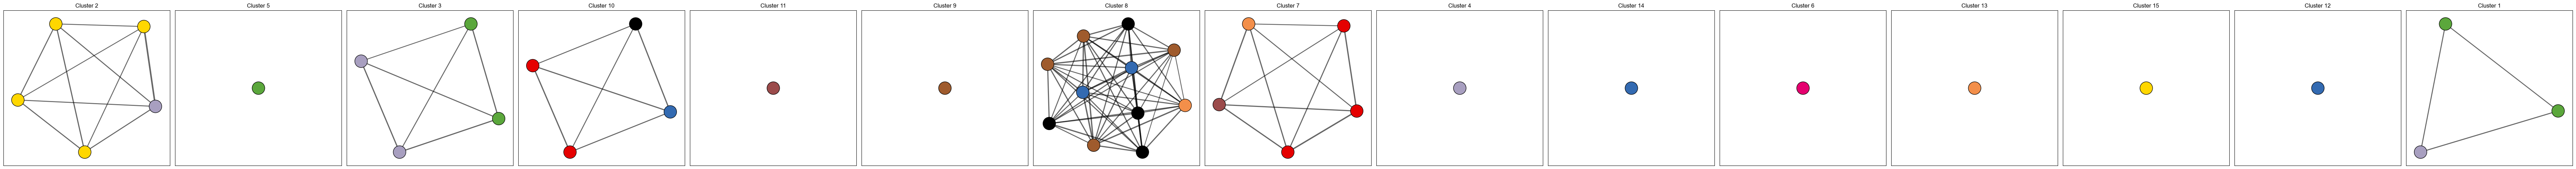

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

# 1️⃣ Definir llindars (ajustables)
threshold_correlation = 0.2  # Mínima correlació per afegir una connexió al graf
threshold_p_value = 0.05  # Màxim p-value per considerar una connexió significativa
threshold_edge_drawing = 0.3  # Nou llindar per DIBUIXAR la connexió, però no per crear-la
show_labels = False  # 👈🏼 Controla si es mostren els noms de les emocions
default_color = "#808080"  # Color per defecte si una emoció no és al diccionari

# 2️⃣ Crear subgràfics per cada cluster
num_subplots = len(cluster_groups)
fig, axes = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))

if num_subplots == 1:
    axes = [axes]  # Si només hi ha un grup, fem que axes sigui iterable

for ax, (cluster, emotions) in zip(axes, cluster_groups.items()):
    G = nx.Graph()

    # Afegir nodes amb colors
    node_colors = []
    for emotion in emotions:
        G.add_node(emotion)
        node_colors.append(color_dict.get(emotion, default_color))  # Assignar color

    # Afegir arestes si compleixen threshold_correlation i threshold_p_value
    edge_weights = {}  # Guardem els pesos per a l'etapa de dibuix
    for i in range(len(emotions)):
        for j in range(i + 1, len(emotions)):
            weight = spearman_corr.loc[emotions[i], emotions[j]]
            p_value = p_values.loc[emotions[i], emotions[j]]

            # Afegim al graf (independent del dibuix)
            if abs(weight) > threshold_correlation and p_value < threshold_p_value:
                G.add_edge(emotions[i], emotions[j], weight=weight)
                edge_weights[(emotions[i], emotions[j])] = weight  # Guardem el pes per dibuixar més tard

    # Assignar layout
    pos = nx.spring_layout(G, seed=42)

    # Dibuixar nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=700, node_color=node_colors, edgecolors="black")

    # Controlar si es mostren les etiquetes (noms de les emocions)
    if show_labels:
        nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_weight="bold")

    # Dibuixar només les arestes que superin el threshold_edge_drawing
    edges_to_draw = [(u, v) for (u, v), weight in edge_weights.items() if abs(weight) > threshold_edge_drawing]
    edge_widths = [abs(edge_weights[(u, v)]) * 5 for (u, v) in edges_to_draw]  # Amplada proporcional

    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edges_to_draw, width=edge_widths, alpha=0.6)

    ax.set_title(f"Cluster {cluster}")

# 3️⃣ Ajustar la visualització
plt.tight_layout()
plt.show()

C:\Users\sebas\AppData\Local\Temp\ipykernel_21672\1544876736.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significance_matrix = sorted_p_values.applymap(significance_marker)


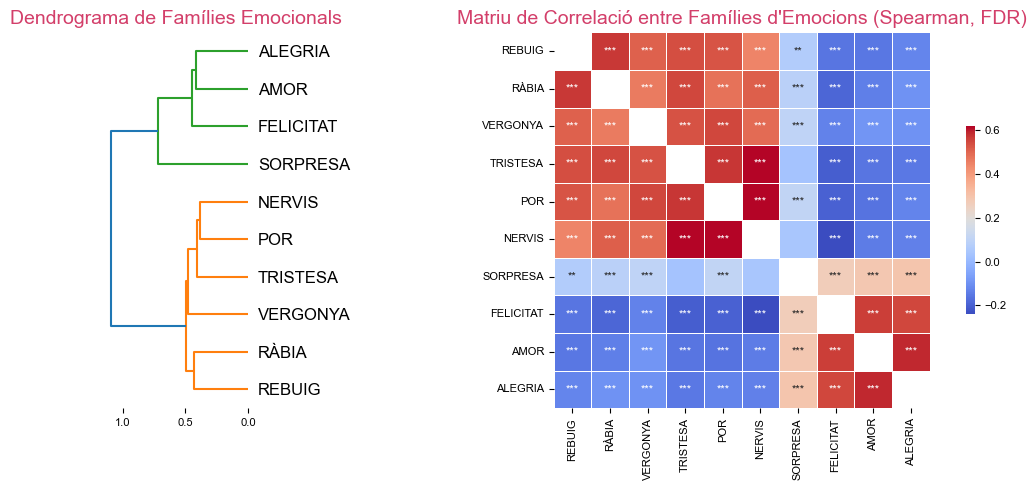

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.stats.multitest import multipletests

# 1️⃣ Crear un nou dataframe amb la mitjana de cada família d'emocions per cada participant
df_families = pd.DataFrame()

for family, emotions in families_emocions.items():
    df_families[family] = SEJ_conciencia_sentir_p1_likert[emotions].median(axis=1)  # Calculem la mediana de cada família

# 2️⃣ Calcular la matriu de correlació de Spearman entre famílies i la matriu de p-values
spearman_corr = df_families.corr(method='spearman')
p_values = pd.DataFrame(index=spearman_corr.index, columns=spearman_corr.columns)

for col1 in spearman_corr.columns:
    for col2 in spearman_corr.columns:
        rho, p_value = spearmanr(df_families[col1], df_families[col2])
        p_values.loc[col1, col2] = p_value

# 3️⃣ Correcció de testos múltiples (FDR Benjamini-Hochberg per ser menys conservatiu)
flat_p_values = p_values.values.flatten().astype(float)
_, corrected_p_values, _, _ = multipletests(flat_p_values, method='fdr_bh')
corrected_p_values = corrected_p_values.reshape(p_values.shape)
p_values = pd.DataFrame(corrected_p_values, index=p_values.index, columns=p_values.columns)

# 4️⃣ Aplicar clustering per reordenar la matriu de correlació
distance_matrix = 1 - spearman_corr  # Convertir correlació en distància
condensed_distance = squareform(distance_matrix)  # Convertir en matriu condensada
linkage_matrix = linkage(condensed_distance, method='average')  # Clustering jeràrquic
dendro = dendrogram(linkage_matrix, labels=spearman_corr.columns, no_plot=True)  # Obtenir l'ordre
dendro_order = dendro['leaves']

# 5️⃣ Reordenar la matriu de correlació i la matriu de p-values segons el clustering
sorted_spearman_corr = spearman_corr.iloc[dendro_order, dendro_order]
sorted_p_values = p_values.iloc[dendro_order, dendro_order]
sorted_labels = [spearman_corr.columns[i] for i in dendro_order]  # Obtenir etiquetes ordenades

# 🚨 6️⃣ Eliminar la diagonal (substituir per NaN perquè no afecti l'escala de colors)
np.fill_diagonal(sorted_spearman_corr.values, np.nan)

# 7️⃣ Crear una matriu amb els asteriscs de significació
def significance_marker(val_p):
    if val_p < 0.001:
        return "***"
    elif val_p < 0.01:
        return "**"
    elif val_p < 0.05:
        return "*"
    else:
        return ""

significance_matrix = sorted_p_values.applymap(significance_marker)

# 8️⃣ Configurar la mida dels asteriscs (ajustable aquí)
font_size = 8  

# 9️⃣ Crear una figura amb dues parts: dendrograma i heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={"width_ratios": [1, 5]})  # Ajusta la mida de la figura

# 🔹 Dendrograma a l'esquerra
dendrogram(linkage_matrix, labels=spearman_corr.columns, orientation="left", ax=ax1)
ax1.set_title("Dendrograma de Famílies Emocionals", fontsize=14, color=color_titols)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# 🔹 Heatmap a la dreta
sns.heatmap(sorted_spearman_corr, annot=significance_matrix, cmap='coolwarm', fmt="", 
            square=True, cbar_kws={"shrink": .5}, linewidths=.5, ax=ax2, annot_kws={"size": font_size})

ax2.set_title('Matriu de Correlació entre Famílies d\'Emocions (Spearman, FDR)', fontsize=14, color=color_titols)
ax2.set_yticklabels(sorted_labels, rotation=0)  # Ajustar etiquetes
ax2.set_xticklabels(sorted_labels, rotation=90)  # Girar etiquetes per llegibilitat

plt.tight_layout()  # Ajustar el layout per millorar visualització
plt.show()



In [98]:
# Si se quiere guardar el gráfico al PC

# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/matriu_correlació_spearman_emocions_families.png', format='png', bbox_inches='tight')

In [100]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Tallar el dendrograma per obtenir els grups
num_clusters = 2  # Nombre de grups a definir (ajustable segons les necessitats)
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Crear un diccionari amb les emocions agrupades per clusters
cluster_groups = {}
for emotion, cluster in zip(spearman_corr.index, clusters):
    if cluster not in cluster_groups:
        cluster_groups[cluster] = []
    cluster_groups[cluster].append(emotion)

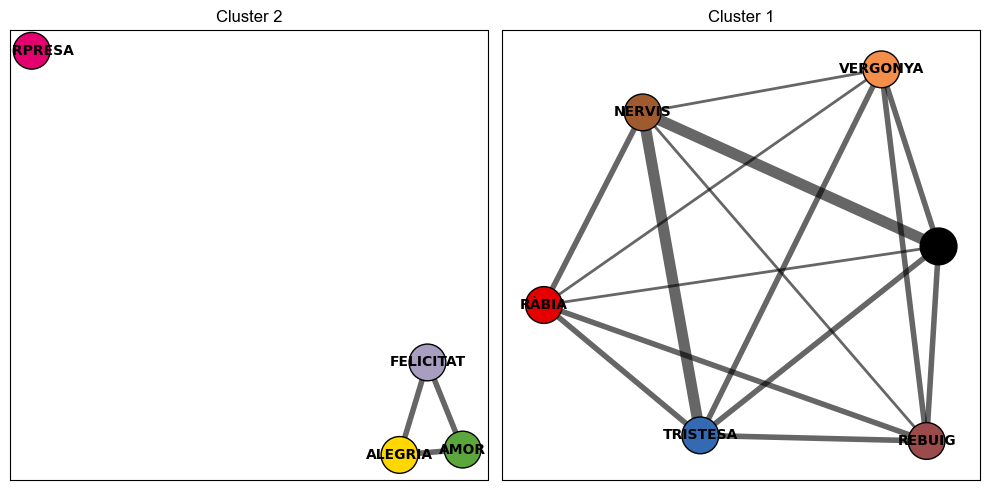

In [101]:
import networkx as nx
import matplotlib.pyplot as plt

# 1️⃣ Definir llindars (ajustables)
threshold_correlation = 0.3  # Mínima correlació per afegir una connexió al graf
threshold_p_value = 0.05  # Màxim p-value per considerar una connexió significativa
threshold_edge_drawing = 0.3  # Nou llindar per DIBUIXAR la connexió, però no per crear-la
show_labels = True  # 👈🏼 Controla si es mostren els noms de les emocions
default_color = "#808080"  # Color per defecte si una emoció no és al diccionari

# 2️⃣ Crear subgràfics per cada cluster
num_subplots = len(cluster_groups)
fig, axes = plt.subplots(1, num_subplots, figsize=(5 * num_subplots, 5))

if num_subplots == 1:
    axes = [axes]  # Si només hi ha un grup, fem que axes sigui iterable

for ax, (cluster, emotions) in zip(axes, cluster_groups.items()):
    G = nx.Graph()

    # Afegir nodes amb colors
    node_colors = []
    for emotion in emotions:
        G.add_node(emotion)
        node_colors.append(families_color_dict.get(emotion, default_color))  # Assignar color

    # Afegir arestes si compleixen threshold_correlation i threshold_p_value
    edge_weights = {}  # Guardem els pesos per a l'etapa de dibuix
    for i in range(len(emotions)):
        for j in range(i + 1, len(emotions)):
            weight = spearman_corr.loc[emotions[i], emotions[j]]
            p_value = p_values.loc[emotions[i], emotions[j]]

            # Afegim al graf (independent del dibuix)
            if abs(weight) > threshold_correlation and p_value < threshold_p_value:
                G.add_edge(emotions[i], emotions[j], weight=weight)
                edge_weights[(emotions[i], emotions[j])] = weight  # Guardem el pes per dibuixar més tard

    # Assignar layout
    pos = nx.spring_layout(G, seed=42)

    # Dibuixar nodes
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=700, node_color=node_colors, edgecolors="black")

    # Controlar si es mostren les etiquetes (noms de les emocions)
    if show_labels:
        nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_weight="bold")

    # Dibuixar només les arestes que superin el threshold_edge_drawing
    edges_to_draw = [(u, v) for (u, v), weight in edge_weights.items() if abs(weight) > threshold_edge_drawing]


    # Definir los tramos de pesos de 0 a 1, con 10 intervalos iguales
    n_tramos = 10
    peso_min, peso_max = 0, 1
    intervalo = (peso_max - peso_min) / n_tramos
    
    # Definir los widths que el usuario elige para cada tramo
    user_widths = [0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
    user_widths = [x/4 for x in user_widths]
    
    # Asignar un width según el peso
    edge_widths = [user_widths[int((abs(edge_weights[(u, v)]) - peso_min) // intervalo)] for (u, v) in edges_to_draw]                 
    #edge_widths = [abs(edge_weights[(u, v)]) * 5 for (u, v) in edges_to_draw]  # Amplada proporcional

    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edges_to_draw, width=edge_widths, alpha=0.6)

    ax.set_title(f"Cluster {cluster}")

# 3️⃣ Ajustar la visualització
plt.tight_layout()
plt.show()

{'Felicitat': '#a89fc0',
 'Serenitat': '#a89fc0',
 'Tranquil·litat': '#a89fc0',
 'Pau': '#a89fc0',
 'Plenitud': '#a89fc0',
 'Amor/Estima': '#5ba73c',
 'Seguretat': '#5ba73c',
 'Confiança': '#5ba73c',
 'Gratitud': '#5ba73c',
 'Esperança': '#5ba73c',
 'Alegria': '#ffd700',
 'Satisfacció': '#ffd700',
 'Motivació': '#ffd700',
 'Alleujament': '#ffd700',
 'Il·lusió': '#ffd700',
 'Sorpresa': '#e5006f',
 'Vergonya': '#f38f4a',
 'Culpa': '#f38f4a',
 'Remordiment': '#f38f4a',
 'Fàstic/Aversió': '#9b4b4b',
 'Rebuig': '#9b4b4b',
 'Tristesa': '#336ab1',
 'Desil·lusió / Decepció': '#336ab1',
 'Solitud': '#336ab1',
 'Enyorança': '#336ab1',
 'Frustració': '#336ab1',
 'Ràbia / Enfado': '#e50000',
 'Indignació': '#e50000',
 'Impotència': '#e50000',
 'Odi': '#e50000',
 'Rancor': '#e50000',
 'Por': '#000000',
 'Inseguretat': '#000000',
 'Desconfiança': '#000000',
 'Temor': '#000000',
 'Pànic': '#000000',
 'Nervis / Estrès': '#9f5b2d',
 'Preocupació': '#9f5b2d',
 'Inquietud / Intranquil·litat': '#9f5b2d',


## 2. Sabries explicar com se senten últimament…?

### **Consciencia del sentir dels altres. Nivells d'empatia**
   **Pregunta:** Quants dels joves tenen consciencia de com se senten les persones amb les que conviuen?<br>
   **Pregunta:** Quin nivell d'empatia assoleixen la majoria dels joves?
   - **Análisis**: 
     - Calcular el percentatde de joves que saben com se senten els altres.
     - Calcular el percentatge de joves a cada nivell d'empatia
     - 
   - **Visualización**: 
     - **Gráfico  apilado** para comparar els percentatges a les diverses categories: familia, amistats, educadors i societat (altres)
     - **Gráfico asdf**

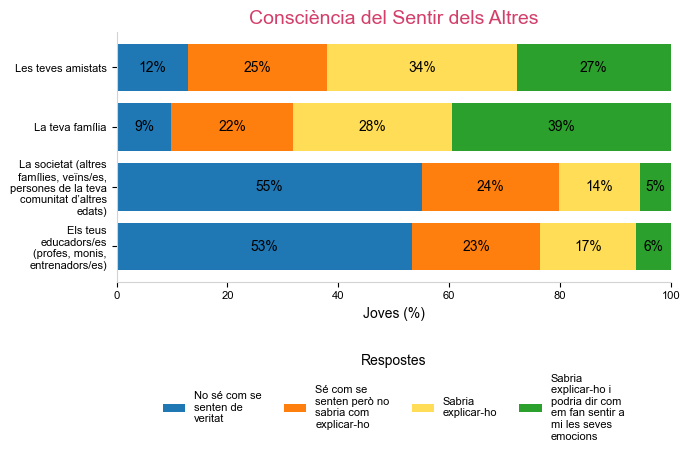

In [178]:
import matplotlib.pyplot as plt
import textwrap  

# Datos
data = SEJ_conciencia_sentir_p2.copy()
df = pd.DataFrame(data)

# Convertir cada columna en la frecuencia de las respuestas
df_melted = df.melt(var_name='Categoria', value_name='Resposta')

# Calcular los porcentajes por cada respuesta dentro de cada categoría
df_percent = df_melted.groupby(['Categoria', 'Resposta']).size().unstack().fillna(0)
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0) * 100  # Convertir a porcentajes

# Reordenar las categorías de las respuestas
respuestas = list(df_percent.columns)  # Obtener la lista de respuestas
ultima_respuesta = respuestas.pop()  # Extraer la última respuesta
respuestas.insert(1, ultima_respuesta)  # Insertarla en la segunda posición
df_percent = df_percent[respuestas]  # Reordenar las columnas del DataFrame

# Definir colores manualmente para representar niveles crecientes de empatía
colores_manual = ["#1f77b4", "#ff7f0e", "#ffdd57", "#2ca02c"]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(7, 5))

# Apilar las barras para cada categoría
bottom_values = None
for idx, respuesta in enumerate(respuestas):
    values = df_percent[respuesta]
    ax.barh(df_percent.index, values, color=colores_manual[idx], label=respuesta, left=bottom_values)
    bottom_values = values if bottom_values is None else bottom_values + values

# Afegir etiquetes amb els percentatges dins de les barres
for idx, categoria in enumerate(df_percent.index):
    cumulative = 0
    for respuesta in respuestas:
        value = df_percent.loc[categoria, respuesta]
        if value > 5:  # Només mostrar si el percentatge és significatiu
            ax.text(cumulative + value / 2, idx, f"{int(value)}%", ha="center", va="center", fontsize=10, color="black")
        cumulative += value

# Configurar el títol i etiquetes
ax.set_title("Consciència del Sentir dels Altres", fontsize=14, color=color_titols)
ax.set_xlabel('Joves (%)')
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 20))

# Assegurar-se que el nombre de ticks és correcte abans de modificar les etiquetes
ax.set_yticks(range(len(df_percent.index)))
ax.set_yticklabels(['\n'.join(textwrap.wrap(label, 20)) for label in df_percent.index])

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")

# Configurar la llegenda
legend = ax.legend(title="Respuestas", bbox_to_anchor=(0.5, -0.25), loc="upper center", frameon=False, ncol=4, fontsize = 8)

# Funció per dividir el text de la llegenda en múltiples línies
def wrap_labels(labels, width=15):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Si la llegenda existeix, modificar els seus textos
if legend:
    legend_labels = [text.get_text() for text in legend.get_texts()]
    wrapped_labels = wrap_labels(legend_labels, width=15)
    for text, new_label in zip(legend.get_texts(), wrapped_labels):
        text.set_text(new_label)

# Ajustar el disseny per evitar talls
fig.tight_layout()
plt.show()



In [179]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/consciencia_sentir_dels_altres.png', format='png', bbox_inches='tight')

## 3. Dona’t un minut per pensar en situacions de malestar a la teva classe. Com vius emocionalment tu, personalment, aquests moments? (marca'n una)

In [146]:
#Mapeja les respostes amb el diccionari
SEJ_conciencia_sentir_p3['categoria_codi_personal'] = SEJ_conciencia_sentir_p3['categoria moment actual personal'].map(transició_emocional_personal_dict).fillna('altres per codificar')

#Calcula la Frecuencia relativa en percentatge
freq_percentatge_personal = SEJ_conciencia_sentir_p3['categoria_codi_personal'].value_counts(normalize=True) * 100

#Mostra les dades ordenades
freq_percentatge_personal = freq_percentatge_personal.sort_values(ascending=False)

#Mostra les dades amb format més clar (opcional)
print(freq_percentatge_personal.to_frame(name='Percentatge').reset_index().rename(columns={'index': 'Categoria'}))

  categoria_codi_personal  Percentatge
0                 Negació    28.608583
1               Agraïment    18.855657
2              Comprensió    17.295189
3              Resignació    16.254876
4              Acceptació    12.223667
5    altres per codificar     6.762029


## 4. I, per aquestes situacions de malestar a la teva classe, com creus que les viu el grup? (marca'n una)

In [147]:
#Mapeja les respostes amb el diccionari
SEJ_conciencia_sentir_p4['categoria_codi_grupal'] = SEJ_conciencia_sentir_p4['categoria moment actual grup'].map(transició_emocional_grupal_dict).fillna('altres per codificar')

#Calcula la Frecuencia relativa en percentatge
freq_percentatge_grupal = SEJ_conciencia_sentir_p4['categoria_codi_grupal'].value_counts(normalize=True) * 100

#Mostra les dades ordenades
freq_percentatge_grupal = freq_percentatge_grupal.sort_values(ascending=False)

#Mostra les dades amb format més clar (opcional)
print(freq_percentatge_grupal.to_frame(name='Percentatge').reset_index().rename(columns={'index': 'Categoria'}))

  categoria_codi_grupal  Percentatge
0               Negació    22.301691
1            Acceptació    22.041612
2            Resignació    19.700910
3            Comprensió    16.254876
4             Agraïment     9.882965
5  altres per codificar     9.817945


## Preungtes 3 y 4. Anàlisi comú

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Càlcul dels percentatges per cada categoria**
# Percentatge de cada codi en els personals
percentatges_personals = (
    SEJ_conciencia_sentir_p3['categoria_codi_personal']
    .value_counts(normalize=True)
    .sort_index() * 100
)

# Percentatge de cada codi en els grupals
percentatges_grupals = (
    SEJ_conciencia_sentir_p4['categoria_codi_grupal']
    .value_counts(normalize=True)
    .sort_index() * 100
)

# **2. Crear un DataFrame per comparar els percentatges**
comparacio_df = pd.DataFrame({
    'Percentatge Personal': percentatges_personals,
    'Percentatge Grupal': percentatges_grupals
}).fillna(0)  # Omple amb 0 si alguna categoria no està present en un dels grups

print(comparacio_df)  # Mostra la taula per veure els percentatges



                      Percentatge Personal  Percentatge Grupal
Acceptació                       12.223667           22.041612
Agraïment                        18.855657            9.882965
Comprensió                       17.295189           16.254876
Negació                          28.608583           22.301691
Resignació                       16.254876           19.700910
altres per codificar              6.762029            9.817945


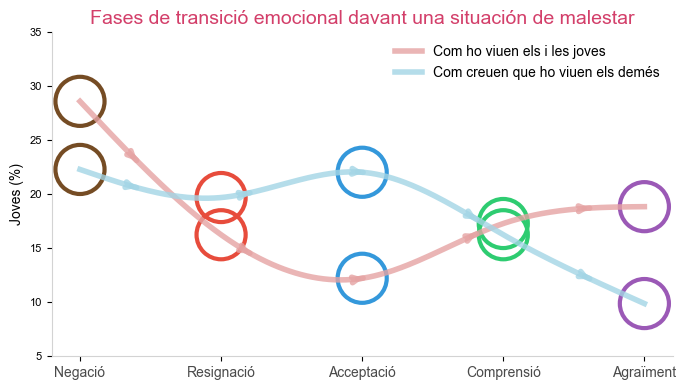

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# **Reordenar el DataFrame** para que siga el orden correcto de transició emocional
comparacio_df = comparacio_df.loc[transició_emocional]  

# Crear la figura
fig, ax = plt.subplots(figsize=(7, 4))

# Crear eje X numérico para la interpolación
x_numeric = np.arange(len(transició_emocional))

# Graficar cada columna con una curva interpolada cúbica
for i, col in enumerate(comparacio_df.columns):
    y_values = comparacio_df[col].values  # Valores de porcentaje
    
    # Crear interpolación cúbica asegurando que pasa por los puntos exactos
    spline = CubicSpline(x_numeric, y_values, bc_type='natural')
    
    # Crear valores suavizados para X y Y
    x_smooth = np.linspace(x_numeric.min(), x_numeric.max(), 300)
    y_smooth = spline(x_smooth)
    
    # Dibujar la línea curva interpolada y asignar un label para la leyenda
    ax.plot(x_smooth, y_smooth, linestyle='-', linewidth=4, alpha=0.8, 
            label=f"{col}", color=['#E5A3A3', '#A3D5E5'][i])

    # Agregar flechas en la curva
    num_flechas = 5  # Número de flechas por curva
    posiciones_flechas = np.linspace(0.1, 0.9, num_flechas)  # Posiciones normalizadas

    for pos in posiciones_flechas:
        idx = int(pos * len(x_smooth))  # Índice del punto donde colocar la flecha
        if idx >= len(x_smooth) - 1:
            continue

        # Calcular dirección de la curva (derivada)
        dx = x_smooth[idx + 1] - x_smooth[idx]
        dy = y_smooth[idx + 1] - y_smooth[idx]
        
        # Dibujar la flecha con un tamaño proporcional
        ax.annotate(
            "", xy=(x_smooth[idx] + dx * 0.3, y_smooth[idx] + dy * 0.3), 
            xytext=(x_smooth[idx], y_smooth[idx]), 
            arrowprops=dict(arrowstyle="->", color=['#E5A3A3', '#A3D5E5'][i], lw=4, alpha=0.8)
        )

# Dibujar los círculos grandes para cada punto con bordes gruesos
for fase, x in zip(transició_emocional, x_numeric):
    ax.scatter(x, comparacio_df.loc[fase, comparacio_df.columns[0]], 
               s=1250, facecolors='none', edgecolors=colors_transició_emocional[fase], linewidth=3)
    
    ax.scatter(x, comparacio_df.loc[fase, comparacio_df.columns[1]], 
               s=1250, facecolors='none', edgecolors=colors_transició_emocional[fase], linewidth=3)

# Personalizar títulos y etiquetas
ax.set_title("Fases de transició emocional davant una situación de malestar", fontsize=14, color=color_titols)
ax.set_ylabel("Joves (%)") #, fontsize=10
ax.set_xlabel("")
ax.set_xticks(x_numeric)
ax.set_xticklabels(transició_emocional, color="#4A4A4A", fontsize=10) #, fontsize=8

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
#ax.grid(axis='y', linestyle='dashed', alpha=0.5)
ax.set_ylim(5, 35)

# Agregar leyenda y cambiar los títulos de los items
handles, labels = ax.get_legend_handles_labels()
labels[0] = f"Com ho viuen els i les joves"  # Cambiar el título del primer item
labels[1] = f"Com creuen que ho viuen els demés"  # Cambiar el título del segundo item
ax.legend(handles, labels, loc="upper right", fontsize=10, frameon=False) #title="Tipus de codi"

# Ajustar el diseño
fig.tight_layout()
plt.show()


In [91]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/fases_de_transició_emocional.png', format='png', bbox_inches='tight')


### 2. **Comparación entre el estado emocional actual y deseado**
   **Pregunta:** ¿Cómo difiere el estado emocional deseado del actual?
   - **Análisis**: 
     - Comparar las emociones actuales con aquellas que los jóvenes consideran deseadas, identificando las principales diferencias entre ambos estados.
   - **Visualización**: 
     - **Gráfico de barras agrupadas** donde una barra representa la emoción actual y la otra la emoción deseada para cada tipo de sentimiento.

# Análisis Elección personal

## 5. Últimament, quan vull donar resposta a una situació complexa emocionalment (complicada, que remou, que és o pot ser difícil de gestionar, etc.), jo...

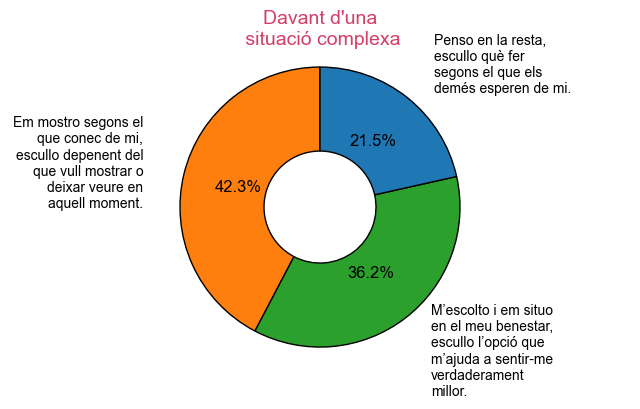

In [235]:
import matplotlib.pyplot as plt
import textwrap

# Definir els tres colors manualment
colors_personalitzats = ["#ff7f0e", "#2ca02c", "#1f77b4"]  # 🔶 Taronja, 🟢 Verd, 🔵 Blau

# Calcular els percentatges de cada categoria
porcentatges = SEJ_eleccio_personal_p5['categoria situació complexe'].value_counts(normalize=True) * 100

# Filtrar les categories amb un percentatge menor a l'1%
porcentatges_filtrades = porcentatges[porcentatges >= 1]

# Assegurar que només es prenen els tres primers colors disponibles
colors_usats = colors_personalitzats[:len(porcentatges_filtrades)]

# Definir mides de text
fontsize_labels = 10  # Mida del text de les categories
fontsize_pct = 12  # Mida del text dels percentatges

# Crear el gràfic de sectors (pie chart)
fig, ax = plt.subplots(figsize=(8, 4))

# Dividir els noms de les categories en 2-3 línies per millor llegibilitat
labels_wrapped = ['\n'.join(textwrap.wrap(label, width=20)) for label in porcentatges_filtrades.index]

# Funció per formatar percentatges amb mida de text personalitzada
def custom_autopct(p):
    return f'{p:.1f}%' if p > 0 else ''

# Crear el gràfic de sectors amb els colors personalitzats i separant les etiquetes
wedges, texts, autotexts = ax.pie(
    porcentatges_filtrades, 
    labels=labels_wrapped,  
    autopct=custom_autopct,  # Format de percentatge
    startangle=90, 
    wedgeprops={'width': 0.6, 'edgecolor': 'black'},  
    textprops={'color': 'k', 'fontsize': fontsize_labels},  # Text de categories
    colors=colors_usats,
    labeldistance=1.3  # <-- Aquest paràmetre separa les etiquetes del centre
)

# Ajustar la mida del text dels percentatges
for autotext in autotexts:
    autotext.set_fontsize(fontsize_pct)

# Afegir el títol
ax.set_title("Davant d'una\n situació complexa", fontsize=14, color=color_titols)

# Assegurar que el gràfic sigui un cercle
ax.axis('equal')

# Mostrar el gràfic
plt.show()



In [236]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/situacions_complexes.png', format='png', bbox_inches='tight')

## 6. Últimament, quan sento estrès, por, tristesa, ràbia o alguna altra emoció desagradable, jo...

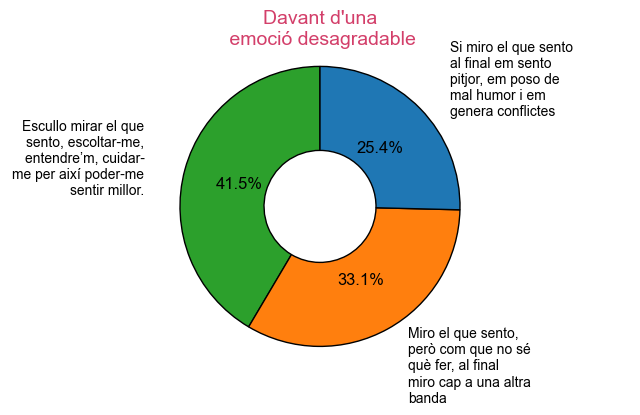

In [243]:
import matplotlib.pyplot as plt
import textwrap

# Definir els tres colors manualment
colors_personalitzats = ["#2ca02c", "#ff7f0e", "#1f77b4"]  # 🟢 Verd, 🔶 Taronja, 🔵 Blau

# Calcular els percentatges de cada categoria
porcentatges = SEJ_eleccio_personal_p6['categria emoció desagradable'].value_counts(normalize=True) * 100

# Filtrar les categories amb un percentatge menor a l'1%
porcentatges_filtrades = porcentatges[porcentatges >= 1]

# Assegurar que només es prenen els tres primers colors disponibles
colors_usats = colors_personalitzats[:len(porcentatges_filtrades)]

# Definir mides de text
fontsize_labels = 10  # Mida del text de les categories
fontsize_pct = 12  # Mida del text dels percentatges

# Crear el gràfic de sectors (pie chart)
fig, ax = plt.subplots(figsize=(8, 4))

# Dividir els noms de les categories en 3-4 línies per millor llegibilitat
labels_wrapped = ['\n'.join(textwrap.wrap(label, width=20)) for label in porcentatges_filtrades.index]

# Funció per formatar percentatges amb mida de text personalitzada
def custom_autopct(p):
    return f'{p:.1f}%' if p > 0 else ''

# Crear el gràfic de sectors amb els colors personalitzats i separant les etiquetes
wedges, texts, autotexts = ax.pie(
    porcentatges_filtrades, 
    labels=labels_wrapped,  
    autopct=custom_autopct,  # Format de percentatge
    startangle=90, 
    wedgeprops={'width': 0.6, 'edgecolor': 'black'},  
    textprops={'color': 'k', 'fontsize': fontsize_labels},  # Text de categories
    colors=colors_usats,
    labeldistance=1.3  # <-- Aquest paràmetre separa les etiquetes del centre
)

# Ajustar la mida del text dels percentatges
for autotext in autotexts:
    autotext.set_fontsize(fontsize_pct)

# Afegir el títol
ax.set_title("Davant d'una\n emoció desagradable", fontsize=14, color=color_titols)

# Assegurar que el gràfic sigui un cercle
ax.axis('equal')

# Mostrar el gràfic
plt.show()


In [244]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/emocions_desagradables.png', format='png', bbox_inches='tight')

# Análisis Responsabilidad individual

## 7. Davant de les diferents emocions que apareixen en situacions complicades, quins comportaments tens? Què fas? (marca totes les que facis)

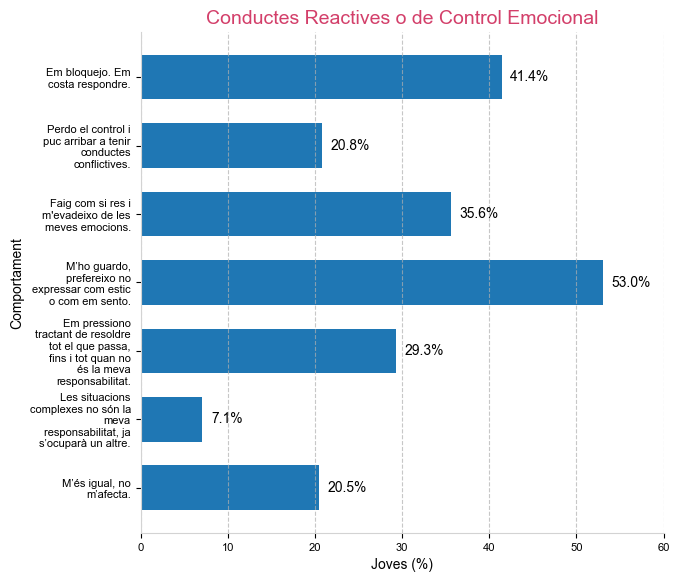

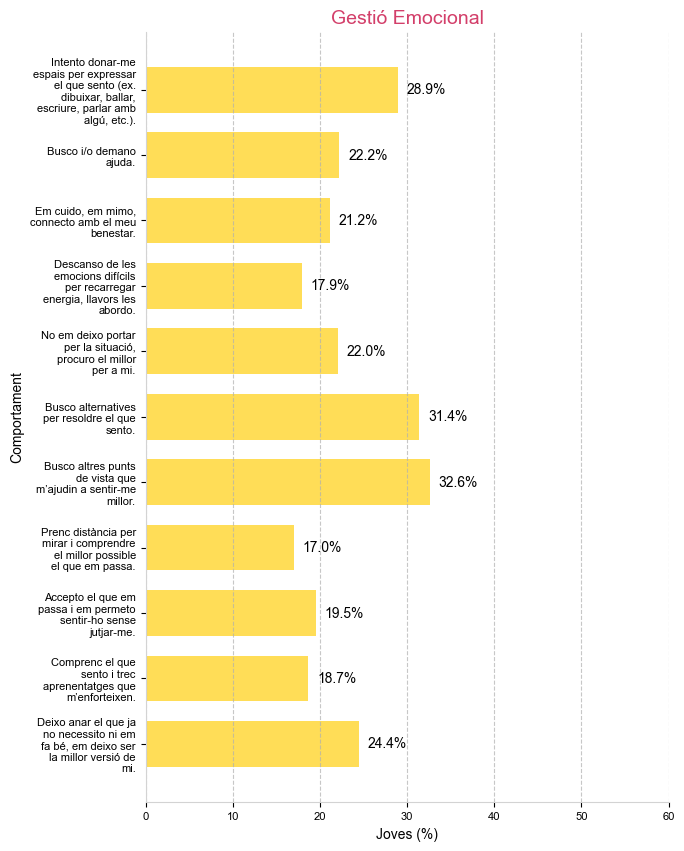

In [28]:
import textwrap

# Paso 1: Separar las frases correctamente
SEJ_resp_individual_p7['comportaments'] = SEJ_resp_individual_p7['categoria comportaments'].apply(
    lambda x: re.split(r'(?<=\.)\, ', x)
)

# Paso 2: Explorar las frases en filas separadas
SEJ_resp_individual_p7_1 = SEJ_resp_individual_p7.explode('comportaments').copy()

# Paso 3: Eliminar duplicados (para que cada persona cuente solo una vez por comportamiento)
#SEJ_resp_individual_p7_1 = SEJ_resp_individual_p7_1.drop_duplicates()

# Paso 4: Contar cuántas personas han seleccionado cada comportamiento
categoria_counts = SEJ_resp_individual_p7_1['comportaments'].value_counts()

# Paso 5: Convertir a porcentaje del total de personas
categoria_percent = (categoria_counts / len(SEJ_resp_individual_p7)) * 100

# Paso 6: Filtrar y ordenar según listas definidas
conductes_reactives_dict = {c: categoria_percent.get(c, 0) for c in conductes_reactives}
gestio_emocional_dict = {c: categoria_percent.get(c, 0) for c in gestio_emocional}

# Función para dividir el texto en líneas
def wrap_text(text, width=20):
    return textwrap.fill(text, width=width)

# Paso 7: Graficar Conductes Reactives o de Control Emocional
fig1, ax1 = plt.subplots(figsize=(6.75, 6.5))  # Aumentar el tamaño para evitar solapamientos
# Dividir las categorías del eje Y en varias líneas
wrapped_categories_conductes = [wrap_text(cat) for cat in list(conductes_reactives_dict.keys())]
bars1 = ax1.barh(wrapped_categories_conductes, list(conductes_reactives_dict.values()), color="#1f77b4", height=0.65)  # Aumentar el espacio entre las barras
ax1.set_xlabel("Joves (%)")
ax1.set_ylabel("Comportament")
ax1.set_title("Conductes Reactives o de Control Emocional", fontsize=14, color=color_titols)
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir texto con los porcentajes
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center')

# Mejorar la estética del gráfico
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color("#D3D3D3")
ax1.spines['bottom'].set_color("#D3D3D3")
ax1.set_xlim(0, 60)


# Paso 8: Graficar Gestió Emocional
fig2, ax2 = plt.subplots(figsize=(6.75, 10))  # Aumentar el tamaño para evitar solapamientos
# Dividir las categorías del eje Y en varias líneas
wrapped_categories_gestio = [wrap_text(cat) for cat in list(gestio_emocional_dict.keys())]
bars2 = ax2.barh(wrapped_categories_gestio, list(gestio_emocional_dict.values()), color="#ffdd57", height=0.7)  # Aumentar el espacio entre las barras
ax2.set_xlabel("Joves (%)")
ax2.set_ylabel("Comportament")
ax2.set_title("Gestió Emocional", fontsize=14, color=color_titols)
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir texto con los porcentajes
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center')

# Mejorar la estética del gráfico
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("#D3D3D3")
ax2.spines['bottom'].set_color("#D3D3D3")
ax2.set_xlim(0, 60)

# Mostrar gráficos
plt.show()




In [29]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig1.savefig(f'{savePath}/conductes_reactives_o_de_control.png', format='png', bbox_inches='tight')

# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig2.savefig(f'{savePath}/gestio_emocional.png', format='png', bbox_inches='tight')

### Análisis por ciclos y categorias

In [27]:
# Selecionando y organizando datos
primer_Grupo_data_p7 = SEJ_resp_individual_p7.loc[primer_Grupo_ESO_idx]
segon_Grupo_data_p7 = SEJ_resp_individual_p7.loc[segon_Grupo_ESO_idx]
educacio_no_obligatoria_data_p7 = SEJ_resp_individual_p7.loc[educació_no_obligatoria_idx]

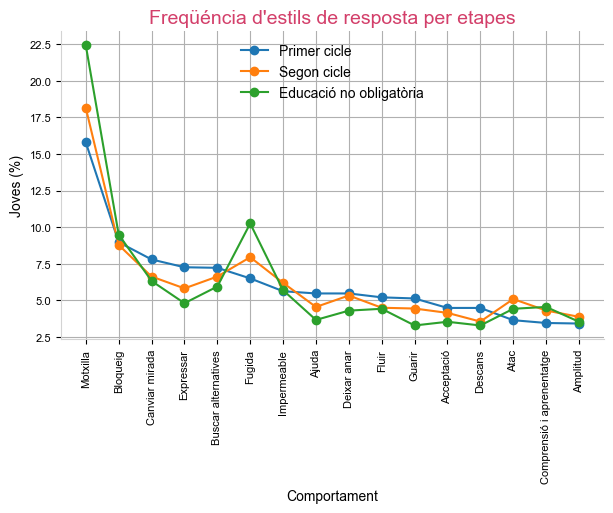

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict

# Diccionari de categories agrupades
categories_conducta = {
    'Em bloquejo. Em costa respondre.': 'Bloqueig',
    'Perdo el control i puc arribar a tenir conductes conflictives.': 'Atac',
    "Faig com si res i m'evadeixo de les meves emocions.": 'Fugida',
    'M’ho guardo, prefereixo no expressar com estic o com em sento.': 'Motxilla',
    'Em pressiono tractant de resoldre tot el que passa, fins i tot quan no és la meva responsabilitat.': 'Motxilla',
    'Les situacions complexes no són la meva responsabilitat, ja s’ocuparà un altre.': 'Impermeable',
    'M’és igual, no m’afecta.': 'Impermeable',
    'Intento donar-me espais per expressar el que sento (ex. dibuixar, ballar, escriure, parlar amb algú, etc.).': 'Expressar',
    'Busco i/o demano ajuda.': 'Ajuda',
    'Em cuido, em mimo, connecto amb el meu benestar.': 'Guarir',
    'Descanso de les emocions difícils per recarregar energia, llavors les abordo.': 'Descans',
    'No em deixo portar per la situació, procuro el millor per a mi.': 'Fluir',
    'Busco alternatives per resoldre el que sento.': 'Buscar alternatives',
    'Busco altres punts de vista que m’ajudin a sentir-me millor.': 'Canviar mirada',
    'Prenc distància per mirar i comprendre el millor possible el que em passa.': 'Amplitud',
    'Accepto el que em passa i em permeto sentir-ho sense jutjar-me.': 'Acceptació',
    'Comprenc el que sento i trec aprenentatges que m’enforteixen.': 'Comprensió i aprenentatge',
    'Deixo anar el que ja no necessito ni em fa bé, em deixo ser la millor versió de mi.': 'Deixar anar'
}

# Funció per calcular percentatges
def calcular_percentatges(df):
    categories_counts = defaultdict(int)
    
    for resposta in df['categoria comportaments'].dropna():  # Evita NaN
        categories = re.split(r'(?<=\.)\, ', resposta)  # Separació correcta
        categories = [c.strip() for c in categories if c.strip()]  # Neteja espais
        
        for cat in categories:
            cat_short = categories_conducta.get(cat, cat)  # Substitueix pel nom curt si existeix
            categories_counts[cat_short] += 1  # Suma la Frecuencia
    
    # Convertim a percentatge
    total = sum(categories_counts.values())
    percentatges = {k: (v / total) * 100 for k, v in categories_counts.items()} if total > 0 else {}
    
    return pd.Series(percentatges)

# Calcular el percentatge per cada grup
percent_primer_Ciclo = calcular_percentatges(primer_Grupo_data_p7)
percent_segon_Ciclo = calcular_percentatges(segon_Grupo_data_p7)
percent_edu_no_obligatoria = calcular_percentatges(educacio_no_obligatoria_data_p7)

# Unir les dades en un DataFrame
percent_df = pd.DataFrame({
    'Primer Ciclo': percent_primer_Ciclo,
    'Segon Ciclo': percent_segon_Ciclo,
    'Educació no obligatòria': percent_edu_no_obligatoria
}).fillna(0)  # Omplir NaN amb 0

# Ordenar per percentatge del primer Ciclo
percent_df = percent_df.sort_values(by='Primer Ciclo', ascending=False)

# Crear el gràfic de línies
fig, ax = plt.subplots(figsize=(7, 4))  # Augmentar l'amplada per més espai a les etiquetes

percent_df.plot(kind='line', marker='o', ax=ax)

plt.title("Frecuencia d'estils de resposta per etapes", fontsize=14, color=color_titols)
plt.xlabel('Comportament')
plt.ylabel('Joves (%)')

# **Forçar totes les etiquetes**
plt.xticks(range(len(percent_df.index)), percent_df.index, rotation=90, ha='center')

plt.legend(title='Etapa Educativa')
plt.grid(True)

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")

# Afegir llegenda amb el label modificat
ax.legend(loc="upper center", fontsize=10, frameon=False)

plt.show()


In [92]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/estils_conductes_per_etapes.png', format='png', bbox_inches='tight')

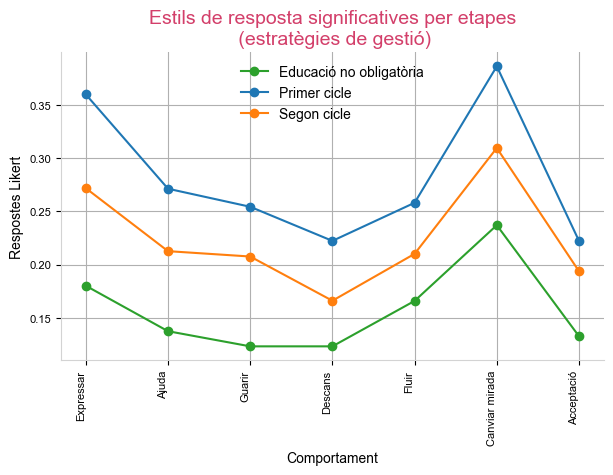

In [95]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests

# Funció per transformar dades a binàries (0/1)
def transformar_a_binaries(df):
    categories_bin = {v: [] for v in set(categories_conducta.values())}  # Inicialitzar diccionari

    for resposta in df['categoria comportaments'].fillna(''):  # Evitar NaN
        categories = re.split(r'(?<=\.)\, ', resposta)  # Separació correcta
        categories = [c.strip() for c in categories if c.strip()]  # Neteja espais
        
        present = {categories_conducta.get(cat, cat): 1 for cat in categories}  # Marcar 1
        for cat in categories_bin:
            categories_bin[cat].append(present.get(cat, 0))  # Assignar 1 o 0

    return pd.DataFrame(categories_bin)

# Transformar dades
binari_primer_Ciclo = transformar_a_binaries(primer_Grupo_data_p7)
binari_segon_Ciclo = transformar_a_binaries(segon_Grupo_data_p7)
binari_edu_no_obligatoria = transformar_a_binaries(educacio_no_obligatoria_data_p7)

# Calcular el número de casos de cada grup
n_primer = len(primer_Grupo_data_p7)
n_segon = len(segon_Grupo_data_p7)
n_tercer = len(educacio_no_obligatoria_data_p7)
    

# Elección de los colores para los grupos
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Obtenir colors actuals
color_primer = colors[2]  # Primer color
color_segon = colors[0]   # Tercer color
color_tercer = colors[1]   # Tercer color

# Afegir columna de grup
binari_primer_Ciclo['Grup'] = 'Primer Ciclo'
binari_segon_Ciclo['Grup'] = 'Segon Ciclo'
binari_edu_no_obligatoria['Grup'] = 'Educació no obligatòria'

# Unir en un sol dataframe
df_binari = pd.concat([binari_primer_Ciclo, binari_segon_Ciclo, binari_edu_no_obligatoria], ignore_index=True)

# Llista de categories
categories = list(categories_conducta.values())

# ANOVA o Kruskal-Wallis per cada categoria
p_values = {}
for categoria in categories:
    grups = [df_binari[df_binari['Grup'] == g][categoria] for g in ['Primer Ciclo', 'Segon Ciclo', 'Educació no obligatòria']]
    
    # Comprovar si algun grup té una mida petita
    sizes = [len(grup) for grup in grups]
    if min(sizes) < 5:  # Si algun grup té menys de 5 casos, utilitzar un altre test o saltar el test
        p_values[categoria] = np.nan  # O qualsevol valor indicatiu per mostrar que no s'ha fet el test
    else:
        if all(grup.var() > 0 for grup in grups):  # Comprovar si hi ha variància
            stat, p = f_oneway(*grups)  # ANOVA
        else:
            stat, p = kruskal(*grups)  # Kruskal-Wallis si no hi ha variància
    
        p_values[categoria] = p

# Correcció per múltiples comparacions (FDR Benjamini-Hochberg)
reject, p_values_corrected, _, _ = multipletests(list(p_values.values()), alpha=0.05, method='fdr_bh')
significatives = {cat: p for cat, p, r in zip(categories, p_values_corrected, reject) if r}

# Comparacions post-hoc només per categories significatives
diferencies_significatives = []
for categoria in significatives.keys():
    posthoc = pairwise_tukeyhsd(df_binari[categoria], df_binari['Grup'])
    df_posthoc = pd.DataFrame(data=posthoc.summary().data[1:], columns=posthoc.summary().data[0])
    df_posthoc = df_posthoc[df_posthoc['p-adj'] < 0.05]  # Filtrem només les diferències significatives
    if not df_posthoc.empty:
        diferencies_significatives.append(categoria)

# Filtrar només les categories significatives
df_significatiu = df_binari[['Grup'] + diferencies_significatives]

# Filtrar per categories de la llista gestio_emocional_cat
df_significatiu_filtrat = df_significatiu[['Grup'] + [cat for cat in diferencies_significatives if cat in gestio_emocional_cat]]

# Calcular mitjanes per cada grup
df_plot = df_significatiu_filtrat.groupby('Grup').mean()

# Afegir "n" a la llegenda de cada grup
n_values = {
    'Primer Ciclo': n_primer,
    'Segon Ciclo': n_segon,
    'Educació no obligatòria': n_tercer
}
legend_labels = [f'{group} (n={n_values[group]})' for group in df_plot.index]

# Plotejar només les categories filtrades
fig, ax = plt.subplots(figsize=(7, 4))

df_plot.T.plot(kind='line', marker='o', ax=ax, color=[color_primer, color_segon, color_tercer])

plt.title('Estils de resposta significatives per etapes\n (estratègies de gestió)', fontsize=14, color=color_titols)
plt.xlabel('Comportament')
plt.ylabel('Respostes Likert')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Etapa Educativa', labels=legend_labels)
plt.grid(True)

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")

# Afegir llegenda amb el label modificat
ax.legend(loc="upper center", fontsize=10, frameon=False)

plt.show()


In [96]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/estils_gestio_significatives_per_etapes.png', format='png', bbox_inches='tight')

## 8. Si sents o sentissis angoixa, disgust o tristesa profunda, a qui recorres? (marca totes les que creguis que tenen a veure amb el que fas)

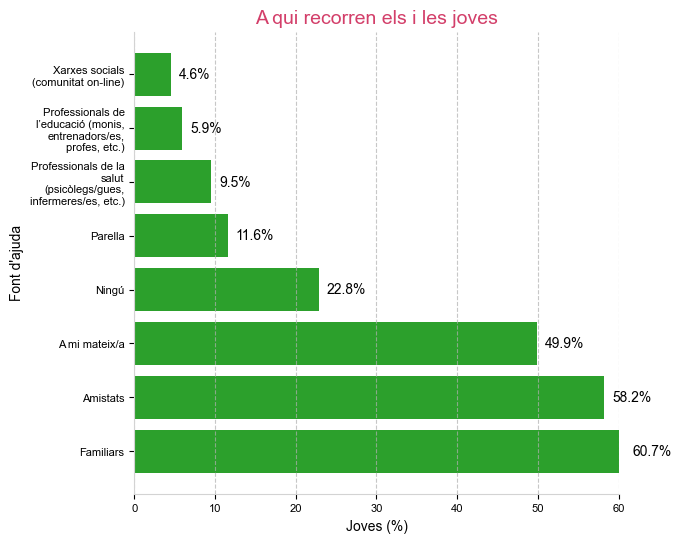

In [197]:
# Paso 1: Separar las frases correctamente
SEJ_resp_individual_p8['suport'] = SEJ_resp_individual_p8['categoria suport'].apply(
    lambda x: re.split(r',\s(?=[A-Z])', x)
)

# Paso 2: Explorar las frases en filas separadas
SEJ_resp_individual_p8_1 = SEJ_resp_individual_p8.explode('suport').copy()

# Paso 3: Eliminar duplicados (para que cada persona cuente solo una vez por comportamiento)
#SEJ_resp_individual_p8_1 = SEJ_resp_individual_p8_1.drop_duplicates()

# Paso 4: Contar cuántas personas han seleccionado cada comportamiento
categoria_counts = SEJ_resp_individual_p8_1['suport'].value_counts()

# Paso 5: Convertir a porcentaje del total de personas
categoria_percent = (categoria_counts / len(SEJ_resp_individual_p8)) * 100

# Filtrar categorías con más del 1%
categoria_percent = categoria_percent[categoria_percent > 1]

# Función para dividir el texto en líneas
def wrap_text(text, width=20):
    return textwrap.fill(text, width=width)

# Paso 6: Graficar
fig, ax = plt.subplots(figsize=(6.25, 6))  # Aumentar el tamaño para evitar solapamientos
# Dividir las categorías del eje Y en varias líneas
wrapped_categories = [wrap_text(cat) for cat in list(categoria_percent.index)]
bars = ax.barh(wrapped_categories, list(categoria_percent.values), color="#2ca02c", height=0.8)  # Aumentar el espacio entre las barras
ax.set_xlabel("Joves (%)")
ax.set_ylabel("Font d'ajuda")
ax.set_title("A qui recorren els i les joves", fontsize=14, color=color_titols)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir texto con los porcentajes
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center')

# Mejorar la estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_xlim(0, 60)

# Mostrar gráfico
plt.show()


In [198]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/font_ajuda.png', format='png', bbox_inches='tight')

# Análisis Entorno

## 9. Pensa en les relacions que has tingut últimament (amb les teves amistats, família, comunitat escolar, etc.). Quan ha sigut l’última vegada que has sentit que algú et preguntava de veritat, amb ànim de saber la teva resposta, com et sents?

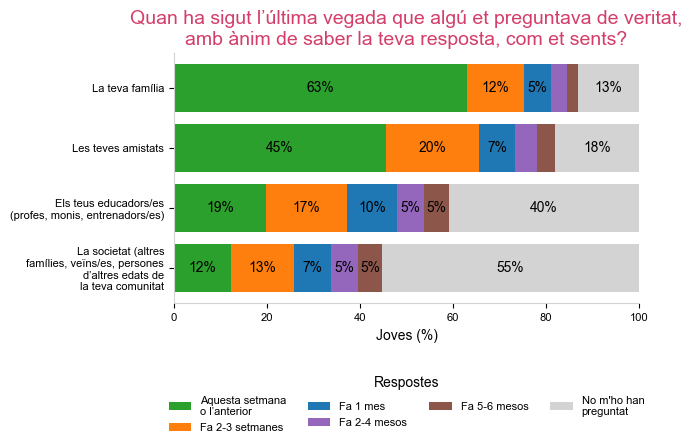

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Reordenar les categories en l'ordre correcte
categories_ordre = [
    "Aquesta setmana o l’anterior",
    "Fa 2-3 setmanes",
    "Fa 1 mes",
    "Fa 2-4 mesos",
    "Fa 5-6 mesos",
    "No m'ho han preguntat"
]

# Comptar la Frecuencia de cada categoria per a cada grup (família, amistats, educadors, societat)
freq_per_grup = SEJ_entorn_p9.apply(lambda col: col.value_counts(normalize=True) * 100).fillna(0)

# Reordenar les files segons l'ordre de les categories
freq_per_grup = freq_per_grup.loc[categories_ordre]

# Definir colors per a cada categoria (basats en la imatge de referència)
colors = {
    "Aquesta setmana o l’anterior": "#78C679",
    "Fa 2-3 setmanes": "#FDC04E",
    "Fa 1 mes": "#F98481",
    "Fa 2-4 mesos": "#E55D5D",
    "Fa 5-6 mesos": "#999999",
    "No m'ho han preguntat": "#D3D3D3"
}

colors = {
    "Aquesta setmana o l’anterior": "#2ca02c",  # Verd → Recent
    "Fa 2-3 setmanes": "#ff7f0e",  # Taronja → Intermig
    "Fa 1 mes": "#1f77b4",  # Blau → Encara recent
    "Fa 2-4 mesos": "#9467bd",  # Lila → Més antic
    "Fa 5-6 mesos": "#8c564b",  # Marró → Força antic
    "No m'ho han preguntat": "#D3D3D3"  # Gris → No preguntat
}

# Crear el gràfic de barres apilades
fig, ax = plt.subplots(figsize=(6, 3.25))

# Apilar les barres per cada categoria
bottom_values = None  # Per començar des de 0
for categoria in categories_ordre:
    values = freq_per_grup.loc[categoria]
    ax.barh(freq_per_grup.columns, values, color=colors[categoria], label=categoria, left=bottom_values)
    
    # Acumular valors per a la següent categoria
    bottom_values = values if bottom_values is None else bottom_values + values

# Afegir percentatges dins de cada barra
for idx, col in enumerate(freq_per_grup.columns):
    cumulative = 0
    for categoria in categories_ordre:
        value = freq_per_grup.loc[categoria, col]
        if value > 5:  # Només mostrar etiquetes si el valor és significatiu
            ax.text(cumulative + value / 2, idx, f"{int(value)}%", ha="center", va="center", fontsize=10, color="black") # f"{value:.1f}%"
        cumulative += value

# Estil del gràfic
ax.set_xlabel("Joves (%)")
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 20))

# Modificar el títol per posar-lo en dues línies
ax.set_title("Quan ha sigut l’última vegada que algú et preguntava de veritat,\namb ànim de saber la teva resposta, com et sents?", fontsize=14, color=color_titols)

# Millorar la estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")


# Configurar la llegenda
legend = ax.legend(title="Respuestas", bbox_to_anchor=(0.5, -0.25), loc="upper center", frameon=False, ncol=4, fontsize = 8)

# Funció per dividir el text de la llegenda en múltiples línies
def wrap_labels(labels, width=15):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Si la llegenda existeix, modificar els seus textos
if legend:
    legend_labels = [text.get_text() for text in legend.get_texts()]
    wrapped_labels = wrap_labels(legend_labels, width=15)
    for text, new_label in zip(legend.get_texts(), wrapped_labels):
        text.set_text(new_label)



# Invertir l'ordre de les categories per coincidir amb la imatge
ax.invert_yaxis()

# Funció per formatar les etiquetes de l'eix Y
def format_labels(label):
    label_text = label.get_text()  # Obtenir el text de l'etiqueta
    words = label_text.split()
    if len(words) > 3:
        # Divideix en línies de 3 paraules
        return '\n'.join([' '.join(words[i:i+3]) for i in range(0, len(words), 3)])
    return label_text

# Obtenir les ubicacions de les etiquetes (ticks) de l'eix Y
yticks = ax.get_yticks()

# Actualitzar les etiquetes de l'eix Y
ax.set_yticks(yticks)  # Assegurem-nos que els ticks siguin els mateixos
ax.set_yticklabels([format_labels(label) for label in ax.get_yticklabels()])

# Mostrar gràfic
plt.show()



In [188]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/entorn_com_et_sents.png', format='png', bbox_inches='tight')

In [72]:
freq_per_grup

La teva família  Les teves amistats  \
Aquesta setmana o l’anterior        63.068921           45.578674   
Fa 2-3 setmanes                     12.158648           20.026008   
Fa 1 mes                             5.916775            7.737321   
Fa 2-4 mesos                         3.381014            4.746424   
Fa 5-6 mesos                         2.340702            3.836151   
No m'ho han preguntat               13.133940           18.075423   

                              Els teus educadors/es (profes, monis, entrenadors/es)  \
Aquesta setmana o l’anterior                                          19.765930       
Fa 2-3 setmanes                                                       17.490247       
Fa 1 mes                                                              10.663199       
Fa 2-4 mesos                                                           5.851756       
Fa 5-6 mesos                                                           5.461638       
No m'ho han preguntat                                                 40.767230       

                              La societat (altres famílies, veïns/es, persones d’altres edats de la teva comunitat  
Aquesta setmana o l’anterior                                          12.288687                                     
Fa 2-3 setmanes                                                       13.524057                                     
Fa 1 mes                                                               7.997399                                     
Fa 2-4 mesos                                                           5.851756                                     
Fa 5-6 mesos                                                           5.071521                                     
No m'ho han preguntat                                                 55.266580

In [74]:
import pandas as pd
import os

# Definir la carpeta on guardar l'Excel
carpeta_destinacio = r"D:\Education\SEJ\Dades"  # Escriu aquí el teu camí
os.makedirs(carpeta_destinacio, exist_ok=True)  # Crear la carpeta si no existeix

# Nom complet del fitxer
nom_fitxer = os.path.join(carpeta_destinacio, "entorn_com_et_sents.xlsx")

# Guardar la taula en un fitxer Excel
freq_per_grup.to_excel(nom_fitxer, sheet_name="Percentatges")

print(f"Fitxer Excel guardat a: {nom_fitxer} 📂✅")


Fitxer Excel guardat a: D:\Education\SEJ\Dades\entorn_com_et_sents.xlsx 📂✅


## 10. Últimament, com estàs vivint emocionalment les següents situacions?

### **Analisis de Frecuencia de tipus resposta**

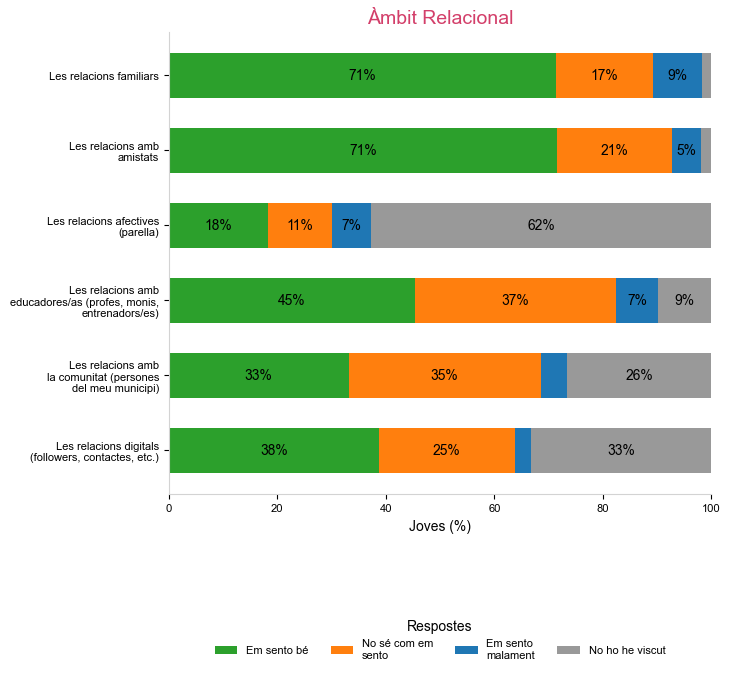

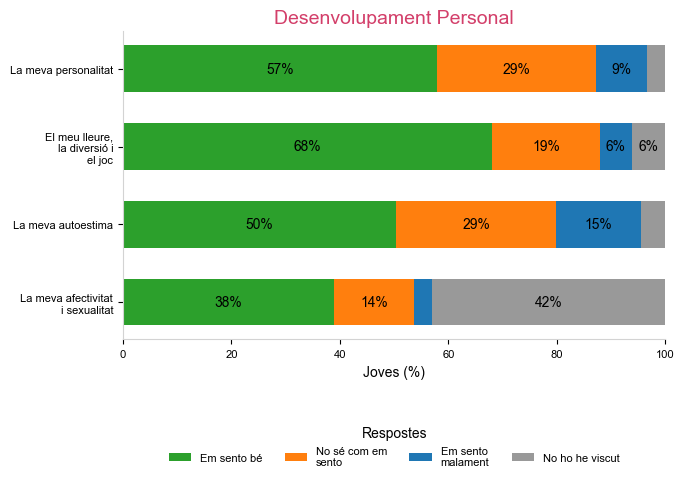

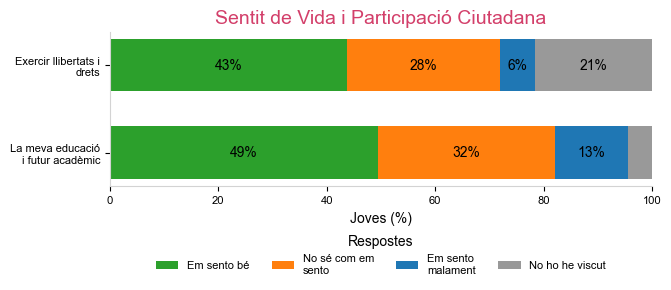

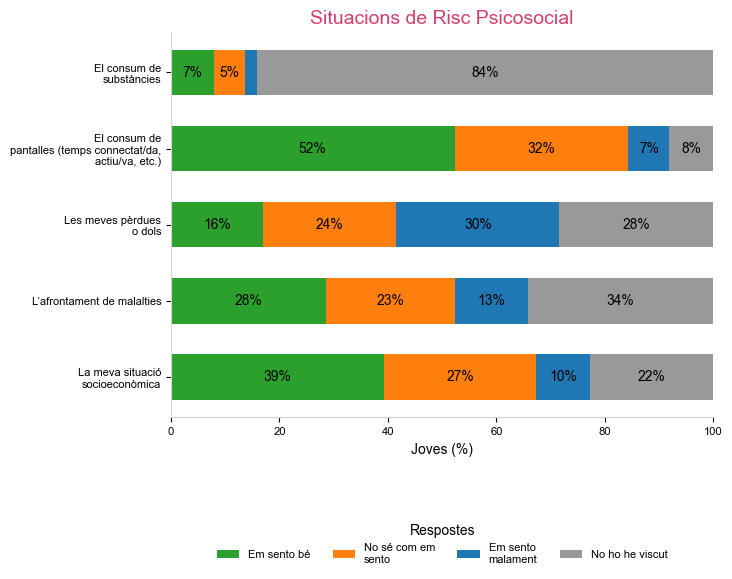

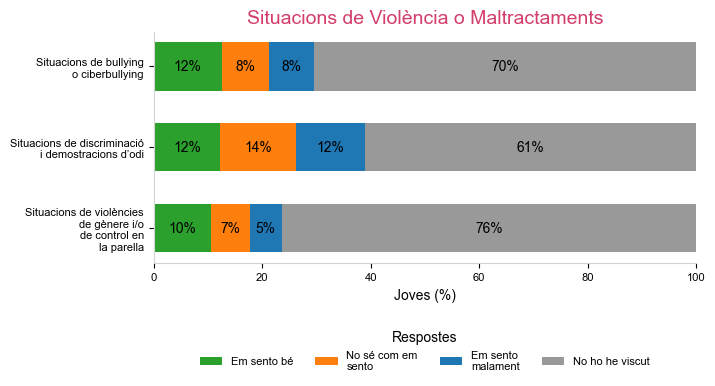

In [75]:
# Llistat de respostes possibles i colors assignats
categories_ordre = ["Em sento bé", "No sé com em sento", "Em sento malament", "No ho he viscut"]

colors = {
    "Em sento bé": "#2ca02c",
    "No sé com em sento": "#ff7f0e",
    "Em sento malament": "#1f77b4",
    "No ho he viscut": "#999999"
}

# Llistat de grups per generar els gràfics
grups = {
    "Àmbit Relacional": ambit_relacional,
    "Desenvolupament Personal": desenvolupament_personal,
    "Sentit de Vida i Participació Ciutadana": sentit_vida_participacio_ciutadana,
    "Situacions de Risc Psicosocial": situacions_risc_psicosocial,
    "Situacions de Violència o Maltractaments": situacions_violencia_o_maltractaments
}

# Carregar el dataframe (substitueix 'dades.csv' pel teu fitxer real)
df = SEJ_entorn_p10.copy()

# Definir una amplada uniforme per a les barres
bar_height = 0.6  # Amplada fixa per a totes les barres
espai_inter_barres = 0.4  # Espai fix entre barres

# Funció per formatar les etiquetes de l'eix Y
def format_labels(label):
    words = label.split()
    if len(words) > 3:
        return '\n'.join([' '.join(words[i:i+3]) for i in range(0, len(words), 3)])
    return label

# Generar els gràfics
for nom_grup, columnes in grups.items():
    # Comptar la Frecuencia relativa per a cada categoria en cada columna del grup
    freq_per_grup = df[columnes].apply(lambda col: col.value_counts(normalize=True) * 100).fillna(0)
    freq_per_grup = freq_per_grup.loc[categories_ordre]  # Ordenar categories

    # Crear el gràfic de barres apilades
    fig, ax = plt.subplots(figsize=(7, len(columnes) * (bar_height + espai_inter_barres)))
    
    # Definir la posició fixa de les barres per mantenir una distància constant
    y_positions = np.arange(len(columnes)) * (bar_height + espai_inter_barres)
    
    bottom_values = np.zeros(len(columnes))  # Inicialitzar valors acumulats

    for categoria in categories_ordre:
        values = freq_per_grup.loc[categoria]
        ax.barh(y_positions, values, color=colors[categoria], label=categoria, height=bar_height, left=bottom_values)
        bottom_values += values

    # Afegir percentatges dins de cada barra
    for idx, col in enumerate(columnes):
        cumulative = 0
        for categoria in categories_ordre:
            value = freq_per_grup.loc[categoria, col]
            if value > 5:  # Només mostrar etiquetes si és significatiu
                ax.text(cumulative + value / 2, y_positions[idx], f"{int(value)}%", 
                        ha="center", va="center", fontsize=10, color="black")
            cumulative += value

    # Estil del gràfic
    ax.set_xlabel("Joves (%)")
    ax.set_xlim(0, 100)
    ax.set_xticks(range(0, 101, 20))
    ax.set_title(nom_grup, fontsize=14, color=color_titols)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#D3D3D3")
    ax.spines['bottom'].set_color("#D3D3D3")
    #ax.legend(title="Resposta", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.invert_yaxis()  # Posar el primer element a dalt

    # Configurar la llegenda
    legend = ax.legend(title="Respuestas", bbox_to_anchor=(0.5, -0.25), loc="upper center", frameon=False, ncol=4, fontsize = 8)
    
    # Funció per dividir el text de la llegenda en múltiples línies
    def wrap_labels(labels, width=15):
        return ['\n'.join(textwrap.wrap(label, width)) for label in labels]
    
    # Si la llegenda existeix, modificar els seus textos
    if legend:
        legend_labels = [text.get_text() for text in legend.get_texts()]
        wrapped_labels = wrap_labels(legend_labels, width=15)
        for text, new_label in zip(legend.get_texts(), wrapped_labels):
            text.set_text(new_label)

    # Fixar els ticks i etiquetes manualment per evitar el warning
    ax.set_yticks(y_positions)
    ax.set_yticklabels([format_labels(label) for label in columnes])

    # Mostrar el gràfic
    plt.show()

    # Si se quiere guardar el gráfico al PC
    # Definiendo directorios
    mainFolder = r'D:\Education\SEJ'
    savePath = os.path.join(mainFolder,'Gráficos') 
    # Guardar como PDF en tamaño A4
    fig.savefig(f'{savePath}/{nom_grup}.png', format='png', bbox_inches='tight')

In [76]:
import pandas as pd
import os

# Definir la carpeta on guardar l'Excel
carpeta_destinacio = r"D:\Education\SEJ\Dades"  # Escriu aquí el teu camí
os.makedirs(carpeta_destinacio, exist_ok=True)  # Crear la carpeta si no existeix

# Nom complet del fitxer
nom_fitxer = os.path.join(carpeta_destinacio, "taules_percentatges_ambits.xlsx")


# Funció per truncar o modificar els noms dels fulls si són massa llargs
def format_sheet_name(nom):
    return nom[:31]  # Truncar a 31 caràcters

# Crear un ExcelWriter
with pd.ExcelWriter(nom_fitxer, engine="xlsxwriter") as writer:
    for nom_grup, columnes in grups.items():
        # Comptar la Frecuencia relativa per a cada categoria en cada columna del grup
        freq_per_grup = df[columnes].apply(lambda col: col.value_counts(normalize=True) * 100).fillna(0)
        freq_per_grup = freq_per_grup.loc[categories_ordre]  # Ordenar categories
        
        # Truncar o modificar el nom del full si és massa llarg
        nom_full = format_sheet_name(nom_grup)

        # Guardar cada taula en un full diferent
        freq_per_grup.to_excel(writer, sheet_name=nom_full)

print(f"Fitxer Excel guardat a: {nom_fitxer} 📂✅")



Fitxer Excel guardat a: D:\Education\SEJ\Dades\taules_percentatges_ambits.xlsx 📂✅


### **Analisis de correlacions - ordinal (valores asignados)**

                                       Pregunta_Entorn  \
0                              Les relacions familiars   
1                              Les relacions familiars   
2                              Les relacions familiars   
3                              Les relacions familiars   
4                              Les relacions familiars   
..                                                 ...   
815  Situacions de violències de gènere i/o de cont...   
816  Situacions de violències de gènere i/o de cont...   
817  Situacions de violències de gènere i/o de cont...   
818  Situacions de violències de gènere i/o de cont...   
819  Situacions de violències de gènere i/o de cont...   

        Pregunta_Conciencia  Correlació_Spearman   p_value  p_value_corrected  \
0                   Alegria             0.206299  0.036555                1.0   
1               Amor/Estima             0.172815  0.080874                1.0   
2                 Confiança             0.247890  0.011582  

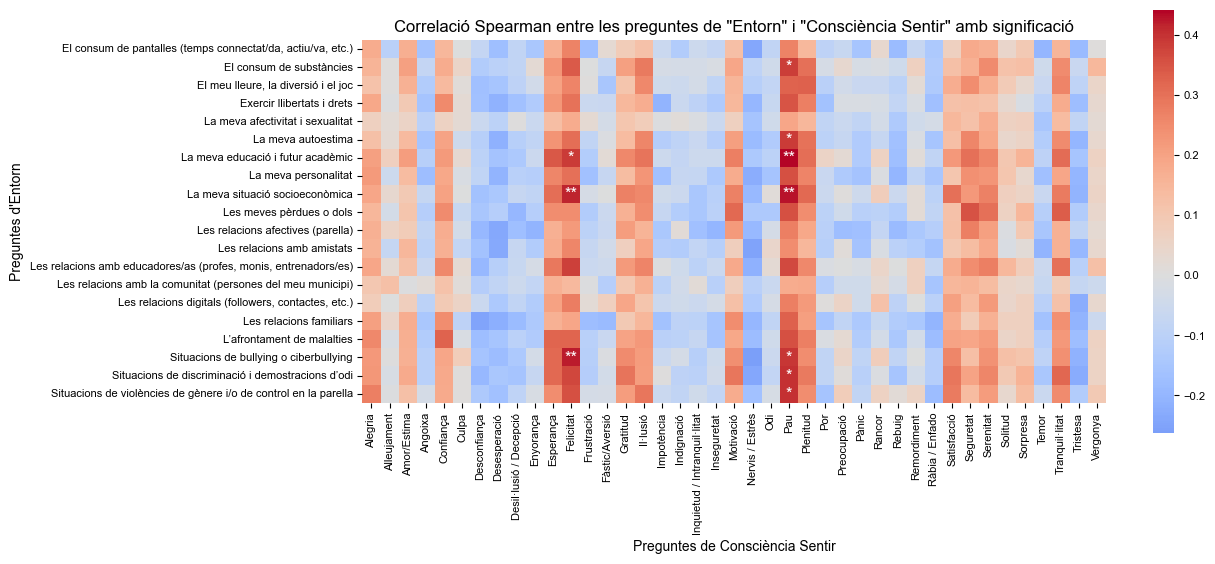

In [69]:
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Filtrar les files que tinguin valor 0 a SEJ_entorn_p10_numerics
filtered_SEJ_entorn_p10_numerics = SEJ_entorn_p10_numerics[SEJ_entorn_p10_numerics != 0].dropna()

# Filtrar les mateixes files a SEJ_conciencia_sentir_p1_likert
filtered_SEJ_conciencia_sentir_p1_likert = SEJ_conciencia_sentir_p1_likert.loc[filtered_SEJ_entorn_p10_numerics.index]



# Funció per afegir l'asterisc de significació
def significance_marker(val_p):
    if val_p < 0.001:
        return "***"
    elif val_p < 0.01:
        return "**"
    elif val_p < 0.05:
        return "*"
    else:
        return ""

# Inicialitzem llistes per emmagatzemar els resultats
correlation_values = []
p_values = []

# Calcular la correlació Spearman i el valor p per cada parell de preguntes
for col1 in filtered_SEJ_entorn_p10_numerics.columns:
    for col2 in filtered_SEJ_conciencia_sentir_p1_likert.columns:
        corr, p_val = spearmanr(filtered_SEJ_entorn_p10_numerics[col1], filtered_SEJ_conciencia_sentir_p1_likert[col2])
        correlation_values.append((col1, col2, corr))
        p_values.append(p_val)

# Aplica la correcció FDR (False Discovery Rate) sobre els valors p
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni') # 'fdr_bh', 'bonferroni'

# Afegir els valors de la correlació i els p valors corregits a un DataFrame
correlation_df = pd.DataFrame(correlation_values, columns=['Pregunta_Entorn', 'Pregunta_Conciencia', 'Correlació_Spearman'])
correlation_df['p_value'] = p_values
correlation_df['p_value_corrected'] = pvals_corrected

# Afegir els símbols de significació a la matriu
correlation_df['Significació'] = correlation_df['p_value_corrected'].apply(significance_marker)

# Visualitzar la taula de correlacions
print(correlation_df)

# Crear la matriu de correlacions amb els símbols de significació
correlation_matrix = correlation_df.pivot(index='Pregunta_Entorn', columns='Pregunta_Conciencia', values='Correlació_Spearman')

# Crear una matriu de significació amb els símbols
significance_matrix = correlation_df.pivot(index='Pregunta_Entorn', columns='Pregunta_Conciencia', values='Significació')

# Crear un heatmap amb la matriu de correlació
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=significance_matrix, cmap='coolwarm', center=0,
            annot_kws={'size': 12, 'ha': 'center', 'va': 'center'}, fmt='',square=True,cbar_kws={"shrink": 0.55})

# Títol i etiquetes de l'eix
plt.title('Correlació Spearman entre les preguntes de "Entorn" i "Consciència Sentir" amb significació')
plt.xlabel('Preguntes de Consciència Sentir')
plt.ylabel('Preguntes d\'Entorn')

plt.show()


### **Analisis de correlaciones - categorico (no ordinal)**

Interpretación: Si el valor p es menor que 0.05, rechazas la hipótesis nula (lo que significa que hay una relación significativa entre las variables). Si el valor p es mayor que 0.05, no puedes rechazar la hipótesis nula (lo que indica que no hay evidencia suficiente de una relación significativa).

<br>Por ejemplo:
<br>La prueba sugiere que hay una relación significativa entre cómo las personas se sienten con respecto "ambito de p10" y la frecuencia con la que experimentan "emoción de p1". Es posible que las personas que se sienten bien con "ambito de p10" reporten mayores niveles de "emoción de p1", mientras que las que se sienten mal podrían reportar menos "emoción de p1".

In [137]:
# Ejemplo para analizar "Les relacions familiars" y "Alegria":
contingency_table = pd.crosstab(SEJ_entorn_p10['Les relacions familiars'], SEJ_conciencia_sentir_p1['Alegria'])

# Paso 2: Realizar la prueba de Chi-cuadrado
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Mostrar los resultados
print("Matriz de Contingencia:")
print(contingency_table)
print("\nResultado de la prueba Chi-cuadrado:")
print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_val}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas: \n{expected}")

# Paso 3: Interpretar el valor p
if p_val < 0.05:
    print("\nLa prueba Chi-cuadrado es significativa. Rechazamos la hipótesis nula.")
else:
    print("\nLa prueba Chi-cuadrado no es significativa. No rechazamos la hipótesis nula.")

Matriz de Contingencia:
Alegria                  Algunes vegades  Freqüentment  Gens  Poc
Les relacions familiars                                          
Em sento bé                          380           643    27   47
Em sento malament                     73            27     9   30
No ho he viscut                        7            11     4    4
No sé com em sento                   124           105    10   37

Resultado de la prueba Chi-cuadrado:
Estadístico Chi-cuadrado: 148.0649400020178
Valor p: 2.2190995467843457e-27
Grados de libertad: 9
Frecuencias esperadas: 
[[416.54616385 560.62548765  35.66319896  84.16514954]
 [ 52.78023407  71.03641092   4.51885566  10.66449935]
 [  9.87256177  13.28738622   0.84525358   1.99479844]
 [104.80104031 141.05071521   8.97269181  21.17555267]]

La prueba Chi-cuadrado es significativa. Rechazamos la hipótesis nula.


C:\Users\sebas\AppData\Local\Temp\ipykernel_11100\2636757376.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(cramers_v_matrix, annot=corrected_p_values.applymap(significance_marker), fmt="s", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Cramér\'s V'}, annot_kws={"size": 10})


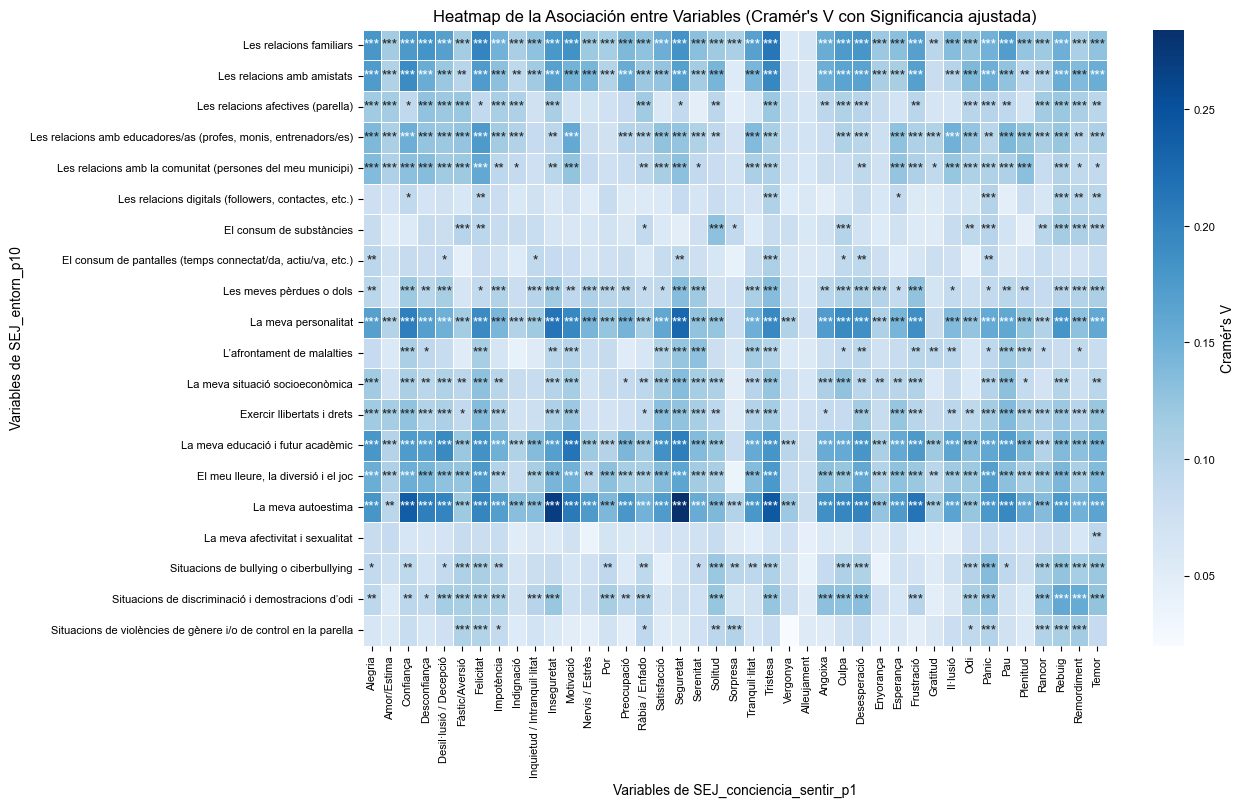

In [70]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular Cramér's V
def cramers_v(chi2_stat, n, k, r):
    return np.sqrt(chi2_stat / (n * min(k - 1, r - 1)))

# Función per afegir l'asterisc de significació
def significance_marker(val_p_corrected):
    if val_p_corrected < 0.001:
        return "***"
    elif val_p_corrected < 0.01:
        return "**"
    elif val_p_corrected < 0.05:
        return "*"
    else:
        return ""

# Paso 1: Crear una lista para almacenar los resultados
cramers_v_values = []
significance_values = []

# Paso 2: Iterar sobre las columnas de ambos DataFrames para comparar cada par de variables
for col_entorn in SEJ_entorn_p10.columns:
    row_cramers_v = []
    row_significance = []
    for col_conciencia in SEJ_conciencia_sentir_p1.columns:
        
        # Crear la matriz de contingencia
        contingency_table = pd.crosstab(SEJ_entorn_p10[col_entorn], SEJ_conciencia_sentir_p1[col_conciencia])
        
        # Realizar la prueba de Chi-cuadrado
        chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
        
        # Calcular Cramér's V
        n = contingency_table.sum().sum()  # Total de observaciones
        k = len(contingency_table.columns)  # Número de columnas
        r = len(contingency_table.index)  # Número de filas
        cramers_v_val = cramers_v(chi2_stat, n, k, r)
        
        # Añadir los resultados de Cramér's V y los p-values
        row_cramers_v.append(cramers_v_val)
        row_significance.append(p_val)  # Guardamos el p-value sin corregir
    
    # Añadir las filas a las listas
    cramers_v_values.append(row_cramers_v)
    significance_values.append(row_significance)

# Paso 3: Crear DataFrames con los valores de Cramér's V y los p-values
cramers_v_matrix = pd.DataFrame(cramers_v_values, columns=SEJ_conciencia_sentir_p1.columns, index=SEJ_entorn_p10.columns)
significance_matrix = pd.DataFrame(significance_values, columns=SEJ_conciencia_sentir_p1.columns, index=SEJ_entorn_p10.columns)

# Paso 4: Calcular los p-values corregidos con Bonferroni
total_comparisons = significance_matrix.size  # Número total de comparaciones
corrected_p_values = significance_matrix * total_comparisons  # Corrección de Bonferroni

# Paso 5: Crear el heatmap con Cramér's V, usando un colormap continuo
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_matrix, annot=corrected_p_values.applymap(significance_marker), fmt="s", cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Cramér\'s V'}, annot_kws={"size": 10})
plt.title("Heatmap de la Asociación entre Variables (Cramér's V con Significancia ajustada)")
plt.xlabel("Variables de SEJ_conciencia_sentir_p1")
plt.ylabel("Variables de SEJ_entorn_p10")
plt.show()


### **Analisis de frequencias likert - ámbitos**

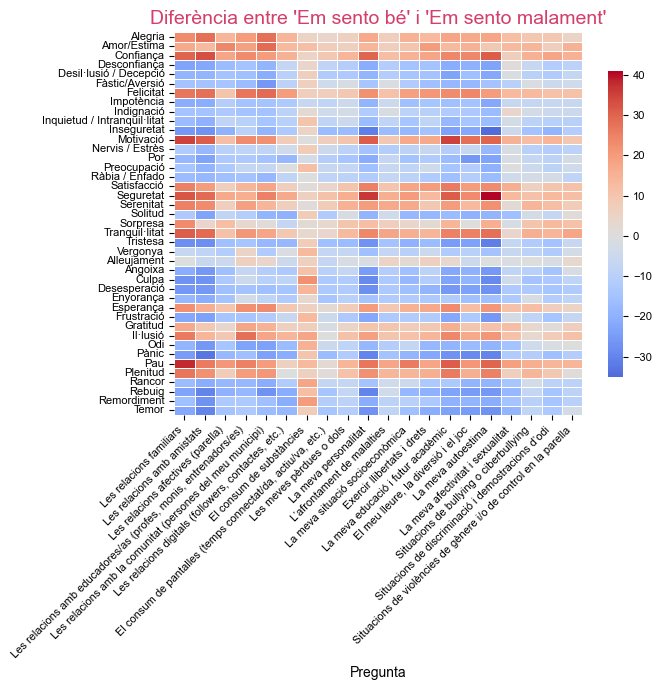

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combinar els dataframes
df_combined = pd.concat([SEJ_entorn_p10, SEJ_conciencia_sentir_p1_likert], axis=1)

# Diccionari per guardar les mitjanes
resultats = {}

for col in SEJ_entorn_p10.columns:
    mitjanes = df_combined.groupby(col)[SEJ_conciencia_sentir_p1_likert.columns].mean()
    resultats[col] = mitjanes

# Convertir el diccionari en un únic DataFrame
df_heatmap = pd.concat(resultats, names=["Pregunta", "Categoria"]).T

# 🔹 Definir les dues categories a comparar
categoria1 = "Em sento bé" # "Em sento malament", "Em sento bé"
categoria2 = "Em sento malament" # "No sé com em sento", "Em sento malament", "No ho he viscut"

# Comprovar si existeixen en el DataFrame
if categoria1 in df_heatmap.columns.get_level_values("Categoria") and categoria2 in df_heatmap.columns.get_level_values("Categoria"):
    # Filtrar cada categoria
    df1 = df_heatmap.xs(categoria1, level="Categoria", axis=1)
    df2 = df_heatmap.xs(categoria2, level="Categoria", axis=1)
    
    # Calcular la diferència
    df_diff = (df1 - df2) / (df1 + df2)
    df_diff = (df1 - df2) / df2

    df_diff = np.ceil(df_diff * 100)
    # 🔹 Crear el heatmap de diferències
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(df_diff, annot=False, cmap="coolwarm", fmt=".0f", linewidths=0.5, square=False, center=0, cbar_kws={"shrink": 0.80}, ax=ax) #, vmax = 0.7, vmin=-0.2

    ax.set_title(f"Diferència entre '{categoria1}' i '{categoria2}'", fontsize=14, color=color_titols)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    plt.tight_layout()
    plt.show()
else:
    print("Error: Una o ambdues categories no existeixen en el DataFrame.")


In [109]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/df_f_likert_em_sento_be_vs_em_sento_malament.png', format='png', bbox_inches='tight')


**(df1 - df2) / (df1 + df2)**
<br>
<br>Casos posibles:
Resultado cercano a +1
→ La emoción 
𝑋
X (ej. alegría) es mucho más intensa cuando te sientes bien con el ámbito 
𝑌
Y que cuando te sientes mal.
→ Implica que esa emoción es un marcador positivo del bienestar en ese ámbito.

Resultado cercano a -1
→ La emoción 
𝑋
X (ej. alegría) es mucho más intensa cuando te sientes mal con el ámbito 
𝑌
Y que cuando te sientes bien.
→ Puede indicar una relación paradójica o que la emoción cambia de significado en función del bienestar (ej., la alegría forzada en situaciones negativas).

Resultado cercano a 0
→ La emoción 
𝑋
X tiene valores similares tanto cuando te sientes bien como cuando te sientes mal en el ámbito 
𝑌
Y.
→ Esto sugiere que la emoción no es un buen indicador de cómo percibes ese ámbito.

Valores intermedios (entre -0.5 y +0.5)
→ Indican una diferencia moderada entre los dos estados, pero sin ser completamente polarizada.


**(df1 - df2) / df2)**
<br>
<br>Casos posibles:

Si el resultado es mayor que 0 (positivo)
→ Significa que la emoción 
𝑋
X es más intensa cuando te sientes bien en el ámbito 
𝑌
Y.
→ Si el valor es 0.5, significa que la emoción es 50% más intensa cuando te sientes bien.
→ Si el valor es 1, significa que la emoción es el doble de intensa cuando te sientes bien.

Si el resultado es menor que 0 (negativo)
→ Significa que la emoción 
𝑋
X es más intensa cuando te sientes mal en el ámbito 
𝑌
Y.
→ Si el valor es -0.5, significa que la emoción es 50% menor cuando te sientes bien (o, visto de otra manera, un 50% mayor cuando te sientes mal).

Si el resultado es 0
→ Significa que la emoción 
𝑋
X tiene la misma intensidad tanto cuando te sientes bien como cuando te sientes mal en el ámbito 
𝑌
Y.

C:\Users\sebas\AppData\Local\Temp\ipykernel_21672\3548244081.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


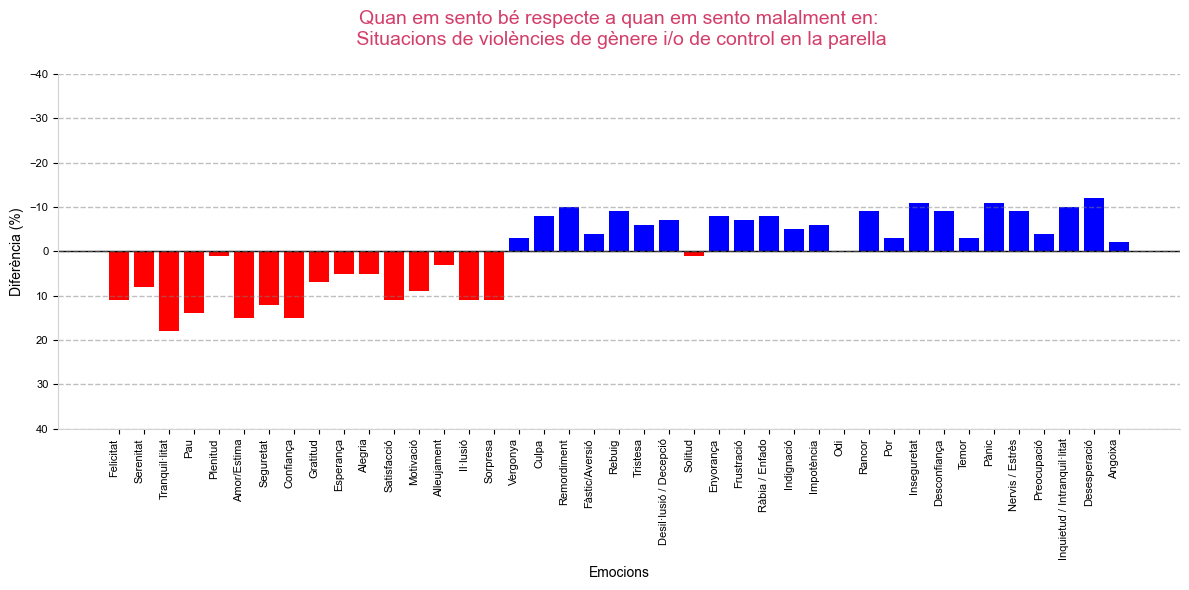

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Escollir la pregunta (substitueix `pregunta_index` pel número desitjat)
pregunta_index = -1  # Canvia aquest índex segons la pregunta que vols analitzar
pregunta_escollida = df_diff.columns[pregunta_index]

# 🔹 Filtrar només la columna de la pregunta escollida
df_pregunta = df_diff[[pregunta_escollida]].copy()
df_pregunta["Pregunta"] = df_diff.index  # Restaurar les emocions com a columna

# 🔹 Ordenar el DataFrame segons la llista de prioritats
df_pregunta = df_pregunta.set_index("Pregunta").reindex(emociones_ordenadas).reset_index()

# 🔹 Preparar el gràfic de barres
fig, ax = plt.subplots(figsize=(12, 6))

# 🟢 Assignar el color a cada barra segons el valor (vermell si positiu, blau si negatiu)
for idx, value in enumerate(df_pregunta[pregunta_escollida]):
    color = 'red' if value > 0 else 'blue'
    ax.bar(df_pregunta["Pregunta"][idx], value, color=color)

# 🔹 Configurar el gràfic
ax.set_title(f"Quan em sento bé respecte a quan em sento malalment en:\n {pregunta_escollida}\n ", fontsize=14, color=color_titols)
ax.set_xlabel("Emocions")
ax.set_ylabel("Diferència (%)")
ax.set_ylim([40,-40])
ax.axhline(0, color='black', linewidth=1)  # Línia de referència en 0
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")

for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()


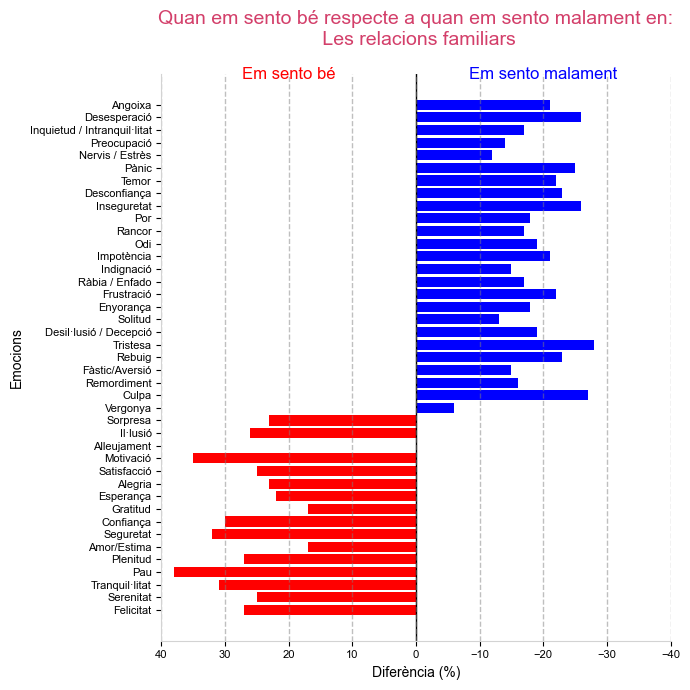

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Escollir la pregunta (substitueix `pregunta_index` pel número desitjat)
pregunta_index = 0  # Canvia aquest índex segons la pregunta que vols analitzar
pregunta_escollida = df_diff.columns[pregunta_index]

# 🔹 Filtrar només la columna de la pregunta escollida
df_pregunta = df_diff[[pregunta_escollida]].copy()
df_pregunta["Pregunta"] = df_diff.index  # Restaurar les emocions com a columna

# 🔹 Ordenar el DataFrame segons la llista de prioritats
df_pregunta = df_pregunta.set_index("Pregunta").reindex(emociones_ordenadas).reset_index()

# 🔹 Preparar el gràfic de barres horitzontal
fig, ax = plt.subplots(figsize=(7, 7))

# 🟢 Assignar el color a cada barra segons el valor (vermell si positiu, blau si negatiu)
for idx, value in enumerate(df_pregunta[pregunta_escollida]):
    color = 'red' if value > 0 else 'blue'
    ax.barh(df_pregunta["Pregunta"][idx], value, color=color)

# 🔹 Configurar el gràfic
ax.set_title(f"Quan em sento bé respecte a quan em sento malament en:\n {pregunta_escollida}\n ", fontsize=14, color=color_titols)
ax.set_ylabel("Emocions")
ax.set_xlabel("Diferència (%)")
ax.axvline(0, color='black', linewidth=1)  # Línia de referència en 0
ax.set_xlim([40,-40])

# 🔹 Afegir etiquetes de text al nou eix X
ax.text(20, len(df_pregunta) + 1, "Em sento bé", fontsize=12, color="red", ha="center")
ax.text(-20, len(df_pregunta) + 1, "Em sento malament", fontsize=12, color="blue", ha="center")

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")

for x in ax.get_xticks():
    ax.axvline(x=x, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()


In [138]:
# Si se quiere guardar el gráfico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gráficos') 
# Guardar como PDF en tamaño A4
fig.savefig(f'{savePath}/df_f_diferencia_em_sento_be_vs_em_sento_malament_pregunta_{pregunta_index}.png', format='png', bbox_inches='tight')

C:\Users\sebas\AppData\Local\Temp\ipykernel_11100\3136228317.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


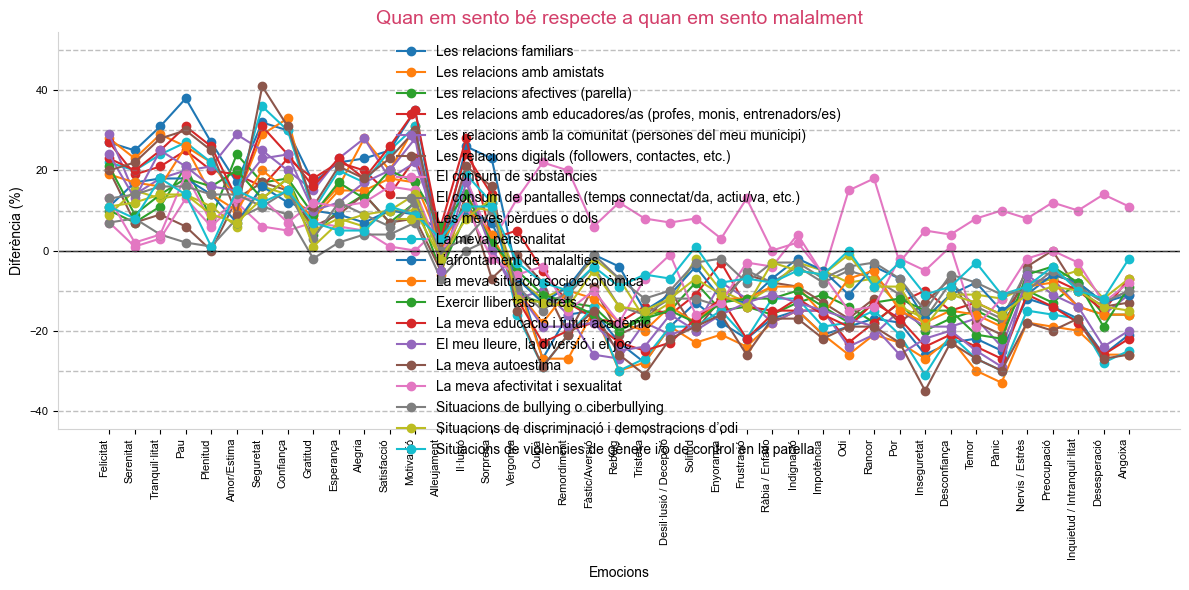

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Llista de preguntes a graficar
pregunta_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]  # Substitueix amb les preguntes que vols graficar

# 🔹 Preparar el gràfic
fig, ax = plt.subplots(figsize=(12, 6))

# 🟢 Iterar sobre la llista de preguntes seleccionades
for pregunta_index in pregunta_indices:
    pregunta_escollida = df_diff.columns[pregunta_index]

    # 🔹 Filtrar només la columna de la pregunta escollida
    df_pregunta = df_diff[[pregunta_escollida]].reset_index()

    # 🔹 Convertir la columna "index" a una categoria ordenada segons la llista d'emocions
    df_pregunta['index'] = pd.Categorical(df_pregunta['index'], categories=emociones_ordenadas, ordered=True)

    # 🔹 Ordenar el DataFrame
    df_pregunta = df_pregunta.sort_values(by='index').reset_index(drop=True)

    # 🔹 Crear el gràfic de línies per a aquesta pregunta
    ax.plot(df_pregunta["index"], df_pregunta[pregunta_escollida], marker='o', label=f"{pregunta_escollida}")

# 🔹 Configurar el gràfic
ax.set_title("Quan em sento bé respecte a quan em sento malalment", fontsize=14, color=color_titols)
ax.set_xlabel("Emocions")
ax.set_ylabel("Diferència (%)")
ax.axhline(0, color='black', linewidth=1)  # Línia de referència en 0
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

# Millorar l'estètica del gràfic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)
    
# Afegir llegenda amb el label modificat
ax.legend(loc="upper center", fontsize=10, frameon=False)


plt.tight_layout()
plt.show()



# Análisis demográfico

Basado en los datos del dataframe **SEJ_demografics**, que incluye información sobre la Edat, Ocupación, Distribució Territorial, Sexe biològic, Gènere y las personas con las que viven, se pueden realizar diversos análisis y gráficos interesantes. 

In [84]:
import pandas as pd

# Seleccionar només les columnes d'interès
columns_of_interest = ['Distribució Territorial', 'Edat', 'Gènere', 'Ocupació', 'Sexe biològic']

# Subconjunt del DataFrame només amb les columnes seleccionades
SEJ_demografics = SEJ_demografics[columns_of_interest].copy()

In [85]:
# Convertir totes les columnes a tipus de dades de categoria
SEJ_demografics= SEJ_demografics.apply(lambda x: x.astype('category'))
print(f"Nombre final de participants: {len(SEJ_demografics)}")
print("\n")

# Crear una tabla individual para cada columna
taulas_percentatges = {columna: round(SEJ_demografics[columna].value_counts(normalize=True) * 100,2) for columna in SEJ_demografics.columns}

# Mostrar las tablas individuales
for columna, taula in taulas_percentatges.items():
    #print(f"Percentajes para la columna '{columna}':")
    display(taula)
    print("\n")

Nombre final de participants: 1538




Distribució Territorial
Vilanova i la Geltrú    52.93
Cubelles                25.81
Sant Pere de Ribes       8.45
Canyelles                6.89
Olivella                 2.80
Voltants Garraf          2.47
Sitges                   0.65
Name: proportion, dtype: float64

Edat
14    24.77
15    23.28
13    20.16
12    15.93
16     8.84
17     4.75
18     1.56
19     0.72
Name: proportion, dtype: float64

Gènere
Home         51.11
Dona         47.40
No ho sé      1.37
No binari     0.13
Name: proportion, dtype: float64

Ocupació
3r d'ESO                  26.27
4t d'ESO                  25.42
2n d'ESO                  20.03
1r d'ESO                  14.50
Formació professional      6.89
1r Batx.                   4.03
2n Batx.                   2.47
Formació universitària     0.33
No estudio                 0.07
Name: proportion, dtype: float64

Sexe biològic
Mascle         51.30
Femella        48.57
Intersexual     0.13
Name: proportion, dtype: float64

## Figuras individuales

### Distribución de edades

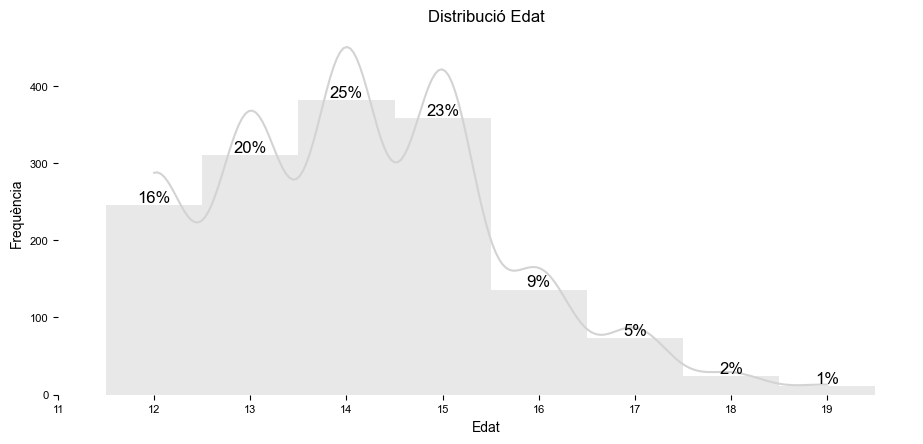

In [86]:
# Gráfico 1: Distribución de edades
# Crear figura y subplots con el tamaño de A4 (DINA4)
fig, axs = plt.subplots(figsize=(10, 5))  # 5 filas, 2 columnas (10 gráficos) figsize=(8.27, 11.69)
fig.tight_layout(pad=4.0)  # Ajustar espacio entre subplots

# Gráfico 1: Distribución de la Edat
histplot = sns.histplot(SEJ_demografics['Edat'], kde=True, binwidth=1, ax=axs,color= 'lightgray', edgecolor=None)
axs.set_title('Distribució Edat')
axs.set_xlabel('Edat')
axs.set_ylabel('Frequència')


# Obtener los datos de la gráfica
counts = [patch.get_height() for patch in histplot.patches]
bin_edges = [patch.get_x() for patch in histplot.patches] + [patch.get_x() + patch.get_width() for patch in histplot.patches]

# Calcular el total de conteo
total_count = sum(counts)

# Añadir porcentaje sobre cada bin
for count, bin_edge in zip(counts, bin_edges[:-1]):  # Exclude last edge as it's not a bin
    if count > 0:  # Solo anotar si hay conteo
        percentage = (count / total_count) * 100
        axs.text(bin_edge + 0.5, count, f'{percentage:.0f}%', ha='center', va='bottom',fontsize=12,fontfamily='Arial')

# Ajustar los ticks del eje x para que sean números enteros
axs.set_xticks(range(int(min(bin_edges)), int(max(bin_edges)) + 1))  # Establecer los ticks en números enteros
        
axs.set_frame_on(False)     


### Distribución de territorios

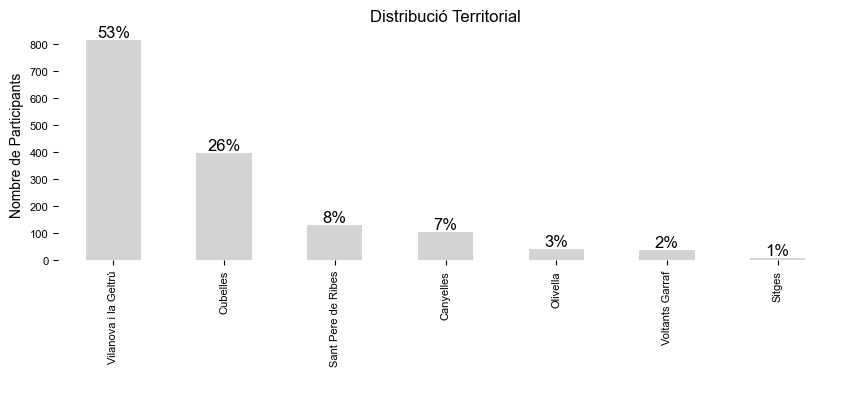

In [87]:
# Gráfico 2: Distribución Territorial
fig, axs = plt.subplots(figsize=(10, 3))  # 5 filas, 2 columnas (10 gráficos) figsize=(8.27, 11.69)
# Cambiar el fondo a negro para la figura y los ejes
#fig.patch.set_facecolor('black')
#axs.set_facecolor('black')

counts = SEJ_demografics['Distribució Territorial'].value_counts()
bar_plot = counts.plot(kind='bar', ax=axs, color= 'lightgray')
axs.set_title('Distribució Territorial')
axs.set_xlabel('Territori', color='white')
axs.set_ylabel('Nombre de Participants')
axs.tick_params(axis='x', rotation=90)
# Calcular el total de participantes
total_count = counts.sum()
# Añadir porcentaje sobre cada barra
for index, value in enumerate(counts):
    percentage = (value / total_count) * 100
    axs.text(
        index, 
        value, 
        f'{percentage:.0f}%', 
        ha='center', 
        va='bottom',
        fontsize=12,  # Tamaño del texto
        fontfamily='Arial' # Tipo de letra
    )
    
axs.set_frame_on(False)  

### Representatividad muestral

C:\Users\sebas\AppData\Local\Temp\ipykernel_13844\2050956804.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_territory_distribution = SEJ_demografics.groupby(['Edat', 'Distribució Territorial']).size().unstack(fill_value=0)


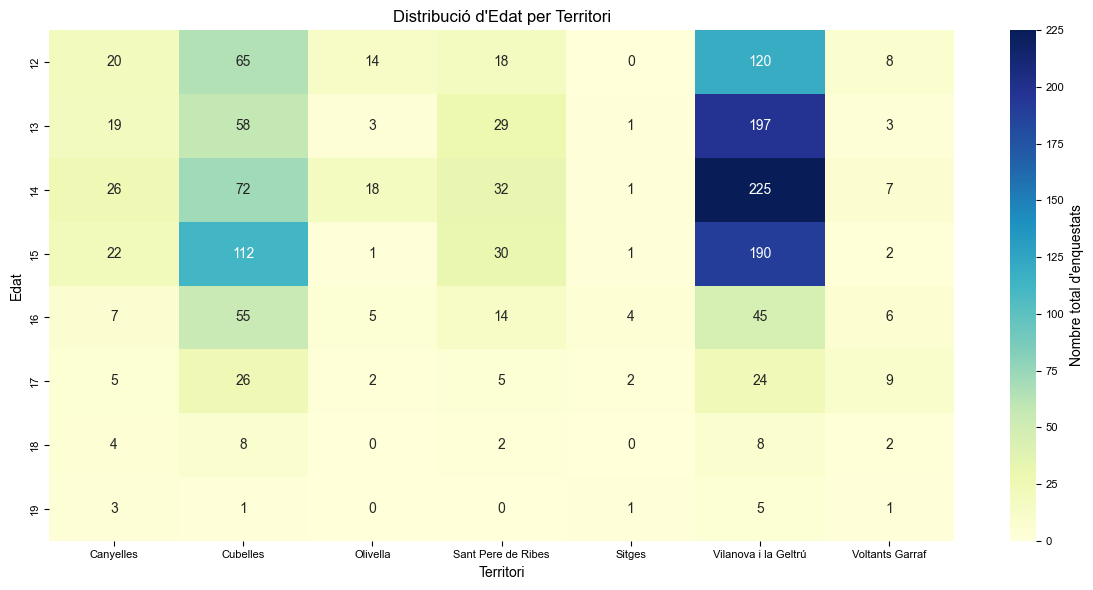

In [88]:
# Tabla para visuializar en que grupos hay más o menos datos
age_territory_distribution = SEJ_demografics.groupby(['Edat', 'Distribució Territorial']).size().unstack(fill_value=0)

# Heatmap de la tabla
plt.figure(figsize=(12, 6))
sns.heatmap(age_territory_distribution, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': "Nombre total d'enquestats"})
plt.title('Distribució d\'Edat per Territori')
plt.xlabel('Territori')
plt.ylabel('Edat')
plt.tight_layout()
plt.show()


C:\Users\sebas\AppData\Local\Temp\ipykernel_21496\3685294535.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_territory_distribution = SEJ_demografics.groupby(['Ocupació', 'Distribució Territorial']).size().unstack(fill_value=0)


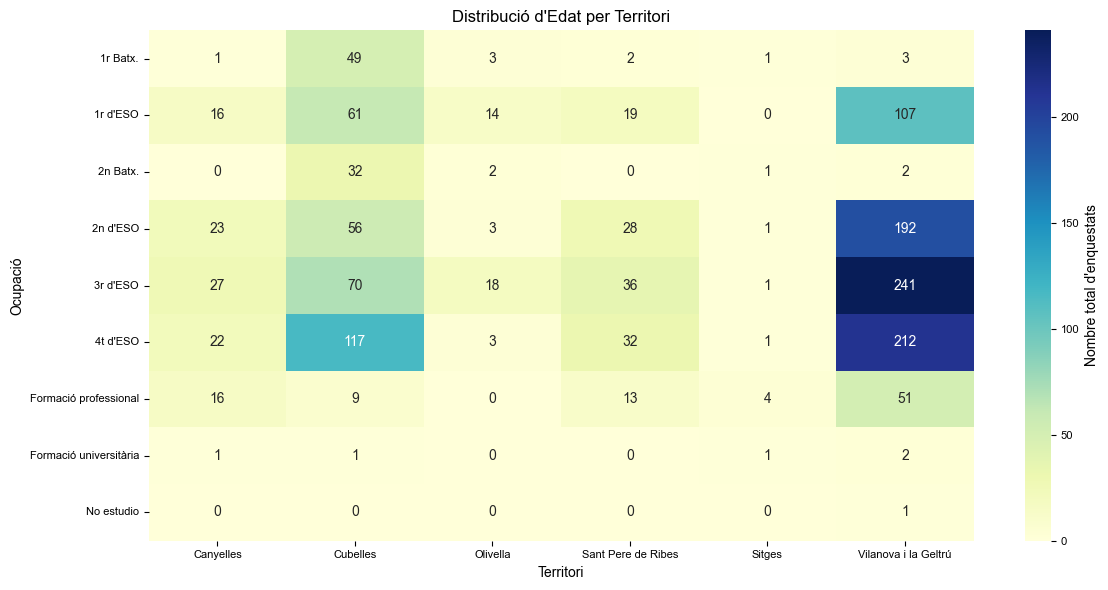

In [122]:
# Tabla para visuializar en que grupos hay más o menos datos
age_territory_distribution = SEJ_demografics.groupby(['Ocupació', 'Distribució Territorial']).size().unstack(fill_value=0)

# Heatmap de la tabla
plt.figure(figsize=(12, 6))
sns.heatmap(age_territory_distribution, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': "Nombre total d'enquestats"})
plt.title('Distribució d\'Edat per Territori')
plt.xlabel('Territori')
plt.ylabel('Ocupació')
plt.tight_layout()
plt.show()


In [123]:
# Cargando y filtrando datos poblacionales segun edades de interés (datos Idescat)
population_df = pd.read_excel(f'{filePopulation}.xlsx', sheet_name='Datos', skiprows=[0], index_col=[0,1]) # segunda hoja llmada Datos, no leer la primera fila
population_df.index.names = ["Edat", "Territori"]

# Entre "11 años" y "18 años"
age_range = [f"{i} años" for i in range(11, 19)]
filtered_population_df = population_df.loc[age_range]
# Suma de "Total" por categoria
territori_absolut_dict = filtered_population_df["Total"].groupby("Territori").sum().to_dict()

## A partir de la información del Idescat
# Calcular el total de mostres
total_mostres = sum(territori_absolut_dict.values())
# Crear un nou diccionari amb les proporcions
territori_proporcio_dict = {territori: (count / total_mostres) * 100 for territori, count in territori_absolut_dict.items()}

In [124]:
# Contamos la muestra actuual por territorio
mostra_actual = SEJ_demografics['Distribució Territorial'].value_counts()

#Creamos una tabla con la muestra actual, esperada y faltante
taula_mostra = pd.DataFrame(columns=['Mostra Actual', 'Mostra Esperada', 'Mostra Faltant'])

# Iteramos por cada territorio
for territori, poblacio in territori_absolut_dict.items():
    mostra_esperada = int(poblacio * sample_goal)  # sample_goal = % de la població a cubrir
    mostra_actual_territori = mostra_actual.get(territori, 0)  # Mostra actual per territori
    mostra_faltant = mostra_esperada - mostra_actual_territori  # Mostra faltant per arribar al 25%
    
    # Anyadimos fila
    taula_mostra.loc[territori] = [mostra_actual_territori, mostra_esperada, mostra_faltant]

# Mostramos la tabla
taula_mostra

Mostra Actual  Mostra Esperada  Mostra Faltant
Canyelles                       106               51             -55
Cubelles                        395              166            -229
Olivella                         43               47               4
Sant Pere de Ribes              130              311             181
Sitges                           10              267             257
Vilanova i la Geltrú            811              607            -204

In [90]:
# Contamos la muestra actual por territorio
mostra_actual = SEJ_demografics['Distribució Territorial'].value_counts()

# Creamos una tabla con la muestra actual, la población total y el porcentaje cubierto
taula_mostra = pd.DataFrame(columns=['Mostra Actual', 'Població Total', 'Percentatge Cobert'])

# Iteramos por cada territorio
for territori, poblacio_total in territori_absolut_dict.items():
    mostra_actual_territori = mostra_actual.get(territori, 0)  # Mostra actual per territori
    
    # Calculamos el porcentaje cubierto de la población total
    percentatge_cobert = (mostra_actual_territori / poblacio_total) * 100 if poblacio_total > 0 else 0
    
    # Añadimos fila
    taula_mostra.loc[territori] = [mostra_actual_territori, poblacio_total, percentatge_cobert]

# Mostramos la tabla
taula_mostra


Mostra Actual  Població Total  Percentatge Cobert
Cubelles                      397.0          2026.0           19.595262
Vilanova i la Geltrú          814.0          7561.0           10.765772
Canyelles                     106.0           647.0           16.383308
Sant Pere de Ribes            130.0          3856.0            3.371369
Sitges                         10.0          3328.0            0.300481
Olivella                       43.0           586.0            7.337884

In [91]:
import pandas as pd

# Contamos la muestra actual por territorio
mostra_actual = SEJ_demografics['Distribució Territorial'].value_counts()

# Creamos una tabla con la muestra actual, la población total y el porcentaje cubierto
taula_mostra = pd.DataFrame(columns=['Mostra Actual', 'Població Total', 'Percentatge Cobert'])

# Iteramos por cada territorio
for territori, poblacio_total in territori_absolut_dict.items():
    mostra_actual_territori = mostra_actual.get(territori, 0)  # Mostra actual per territori
    
    # Calculamos el porcentaje cubierto de la población total
    percentatge_cobert = (mostra_actual_territori / poblacio_total) * 100 if poblacio_total > 0 else 0
    
    # Añadimos fila
    taula_mostra.loc[territori] = [mostra_actual_territori, poblacio_total, percentatge_cobert]

# Calculamos los totales
total_mostra = taula_mostra['Mostra Actual'].sum()
total_poblacio = taula_mostra['Població Total'].sum()
total_percentatge = (total_mostra / total_poblacio) * 100 if total_poblacio > 0 else 0

# Agregamos la fila de totales
taula_mostra.loc['TOTAL'] = [total_mostra, total_poblacio, total_percentatge]

# Mostramos la tabla
taula_mostra


Mostra Actual  Població Total  Percentatge Cobert
Cubelles                      397.0          2026.0           19.595262
Vilanova i la Geltrú          814.0          7561.0           10.765772
Canyelles                     106.0           647.0           16.383308
Sant Pere de Ribes            130.0          3856.0            3.371369
Sitges                         10.0          3328.0            0.300481
Olivella                       43.0           586.0            7.337884
TOTAL                        1500.0         18004.0            8.331482

In [96]:
len(SEJ_demografics[SEJ_demografics['Distribució Territorial'] == "Voltants Garraf"])

38

In [97]:
territori_absolut_dict

{'Cubelles': 2026,
 'Vilanova i la Geltrú': 7561,
 'Canyelles': 647,
 'Sant Pere de Ribes': 3856,
 'Sitges': 3328,
 'Olivella': 586}

In [125]:
# Contamos la muestra actual por edad, para cada territorio
# Creamos un diccionario para guardar los DataFrames separados por territorio
resultados_territorios = {}

# Lista de todas las edades posibles (de 12 a 19)
edats_possibles = list(range(12, 20))

# Iteramos sobre cada territorio
for territori, poblacio in territori_absolut_dict.items():
    # Calculamos el 25% de la población de cada territorio y redondeamos al alza
    mostra_esperada = int(np.ceil(poblacio *  sample_goal))  # sample_goal = % de la població a cubrir
    
    # Filtramos los datos del territorio actual
    mostra_actual_territori = SEJ_demografics[SEJ_demografics['Distribució Territorial'] == territori]
    
    # Contamos cuántos individuos hay por cada grupo de edad en el territorio
    mostra_actual_edad = mostra_actual_territori['Edat'].value_counts().sort_index()
    
    # Calculamos la muestra esperada por edad considerando todas las edades de 12 a 19
    mostra_esperada_edad = mostra_esperada / len(edats_possibles)  # Dividimos la muestra esperada entre las edades posibles
    
    # Creamos un DataFrame vacío para guardar los resultados por edad para este territorio
    taula_territori = pd.DataFrame(columns=['Edat', 'Mostra Esperada', 'Mostra Actual', 'Mostra Faltant'])
    
    # Añadimos los resultados por cada edad de 12 a 19
    for edat in edats_possibles:
        # Obtenemos la muestra actual por edad (si no existe, asignamos 0)
        mostra_actual_edat = mostra_actual_edad.get(edat, 0)  # Si no hay participantes, se asigna 0
        
        # Calculamos cuántos faltan para alcanzar la muestra esperada por edad
        mostra_faltant_edat = max(0, mostra_esperada_edad - mostra_actual_edat)  # Aseguramos que no sea negativa
        
        # Creamos un DataFrame temporal con los resultados por edad
        df_temp = pd.DataFrame([{
            'Edat': edat, 
            'Mostra Esperada': mostra_esperada_edad, 
            'Mostra Actual': mostra_actual_edat, 
            'Mostra Faltant': mostra_faltant_edat
        }])
        
        # Redondeamos los valores de "Mostra Esperada" y "Mostra Faltant" al alza y convertimos a enteros
        df_temp['Mostra Esperada'] = np.ceil(df_temp['Mostra Esperada']).astype(int)
        df_temp['Mostra Faltant'] = np.ceil(df_temp['Mostra Faltant']).astype(int)
        
        # Eliminar columnas vacías o con valores NA en df_temp antes de la concatenación
        df_temp = df_temp.dropna(axis=1, how='all')

        # Concatenamos solo si df_temp no está vacío
        if not df_temp.empty:
            taula_territori = pd.concat([taula_territori, df_temp], ignore_index=True)

    # Ordenamos el DataFrame por la columna 'Edat' en orden descendente
    taula_territori = taula_territori.sort_values(by='Edat', ascending=False).reset_index(drop=True)
    
    # Guardamos el DataFrame del territorio en el diccionario
    resultados_territorios[territori] = taula_territori

# Ahora 'resultados_territorios' contiene un DataFrame por territorio, puedes acceder a ellos por su nombre
# Ejemplo de acceso al DataFrame de 'Cubelles':
_chosen_territory = 'Cubelles'
for territori, poblacio in territori_absolut_dict.items():
    _chosen_territory = territori
    print(_chosen_territory)
    display(resultados_territorios[_chosen_territory])


Canyelles


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19               7             3              4
1   18               7             4              3
2   17               7             5              2
3   16               7             7              0
4   15               7            22              0
5   14               7            26              0
6   13               7            19              0
7   12               7            20              0

Cubelles


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19              21             1             20
1   18              21             8             13
2   17              21            26              0
3   16              21            55              0
4   15              21           111              0
5   14              21            72              0
6   13              21            57              0
7   12              21            65              0

Olivella


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19               6             0              6
1   18               6             0              6
2   17               6             2              4
3   16               6             5              1
4   15               6             1              5
5   14               6            18              0
6   13               6             3              3
7   12               6            14              0

Sant Pere de Ribes


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19              39             0             39
1   18              39             2             37
2   17              39             5             34
3   16              39            14             25
4   15              39            30              9
5   14              39            32              7
6   13              39            29             10
7   12              39            18             21

Sitges


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19              34             1             33
1   18              34             0             34
2   17              34             2             32
3   16              34             4             30
4   15              34             1             33
5   14              34             1             33
6   13              34             1             33
7   12              34             0             34

Vilanova i la Geltrú


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19              76             5             71
1   18              76             8             68
2   17              76            24             52
3   16              76            45             31
4   15              76           190              0
5   14              76           222              0
6   13              76           197              0
7   12              76           120              0

KeyError: 'Amb qui vius'

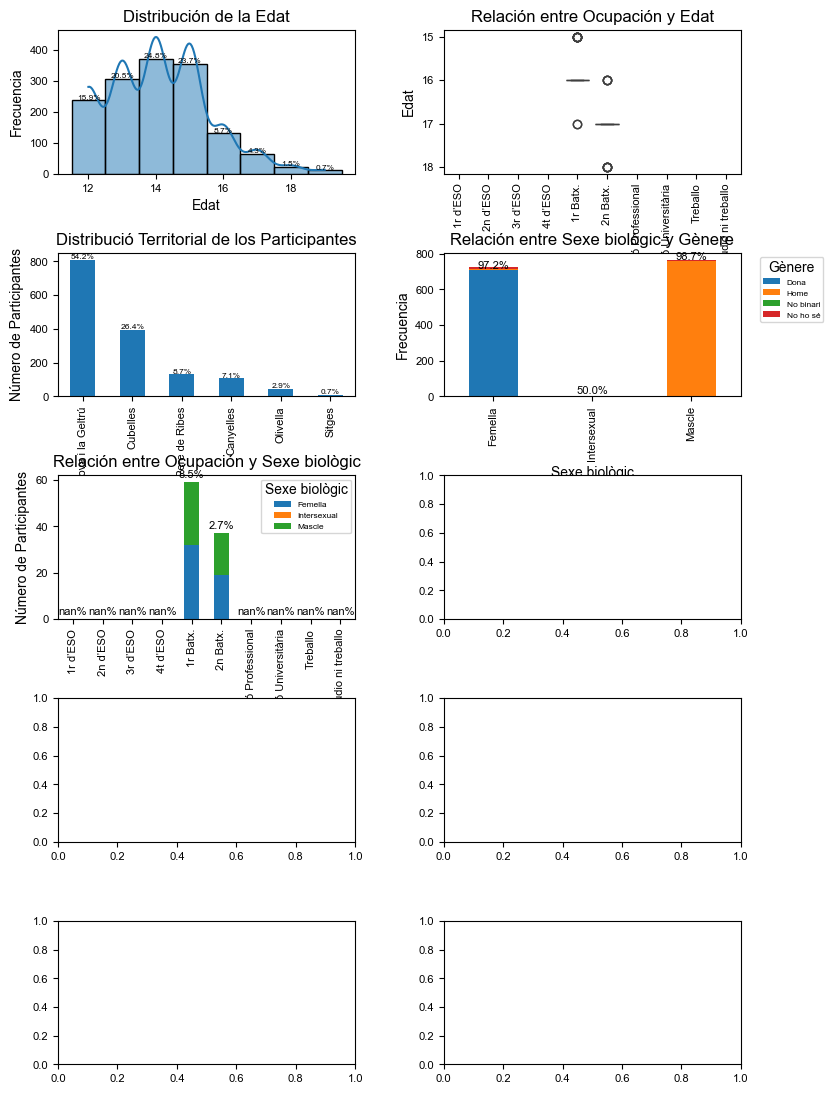

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame (debes cargar tu DataFrame SEJ_demografics aquí)
# SEJ_demografics = pd.read_csv('path_to_your_file.csv')

# Crear figura y subplots con el tamaño de A4 (DINA4)
fig, axs = plt.subplots(5, 2, figsize=(8.27, 11.69))  # 5 filas, 2 columnas (10 gráficos) figsize=(8.27, 11.69)
fig.tight_layout(pad=4.0)  # Ajustar espacio entre subplots

# Gráfico 1: Distribución de la Edat
histplot = sns.histplot(SEJ_demografics['Edat'], kde=True, binwidth=1, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de la Edat')
axs[0, 0].set_xlabel('Edat')
axs[0, 0].set_ylabel('Frecuencia')

# Obtener los datos de la gráfica
counts = [patch.get_height() for patch in histplot.patches]
bin_edges = [patch.get_x() for patch in histplot.patches] + [patch.get_x() + patch.get_width() for patch in histplot.patches]

# Calcular el total de conteo
total_count = sum(counts)

# Añadir porcentaje sobre cada bin
for count, bin_edge in zip(counts, bin_edges[:-1]):  # Exclude last edge as it's not a bin
    if count > 0:  # Solo anotar si hay conteo
        percentage = (count / total_count) * 100
        axs[0, 0].text(bin_edge + 0.5, count, f'{percentage:.1f}%', ha='center', va='bottom',fontsize=6,fontfamily='Arial')


# Gráfico 2: Relación entre Ocupación y Edat
sns.boxplot(x='Ocupació', y='Edat', data=SEJ_demografics, ax=axs[0, 1], order=secuencia_Ocupación)
axs[0, 1].set_title('Relación entre Ocupación y Edat')
axs[0, 1].set_xlabel('Ocupación')
axs[0, 1].set_ylabel('Edat')
axs[0, 1].tick_params(axis='x', rotation=90)

# Gráfico 3: Distribució Territorial
counts = SEJ_demografics['Distribució Territorial'].value_counts()
bar_plot = counts.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Distribució Territorial de los Participantes')
axs[1, 0].set_xlabel('Territorio')
axs[1, 0].set_ylabel('Número de Participantes')
axs[1, 0].tick_params(axis='x', rotation=90)
# Calcular el total de participantes
total_count = counts.sum()
# Añadir porcentaje sobre cada barra
for index, value in enumerate(counts):
    percentage = (value / total_count) * 100
    axs[1, 0].text(
        index, 
        value, 
        f'{percentage:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=6,  # Tamaño del texto
        fontfamily='Arial'  # Tipo de letra
    )

# Gráfico 4: Relación entre Sexe biològic y Gènere
# Crear tabla de contingencia
crosstab = pd.crosstab(SEJ_demografics['Sexe biològic'], SEJ_demografics['Gènere'])

# Gráfico: Relación entre Sexe biològic y Gènere
crosstab.plot(kind='bar', stacked=True, ax=axs[1, 1])
axs[1, 1].set_title('Relación entre Sexe biològic y Gènere')
axs[1, 1].set_xlabel('Sexe biològic')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].legend(title="Gènere", bbox_to_anchor=(1.05, 1), loc='upper left')

# Calcular porcentajes para cada categoría de Sexe biològic
for i, (index, row) in enumerate(crosstab.iterrows()):
    total_count = row.sum()
    expected_gender = identificación_sexo_genero[index]
    
    if expected_gender in row:
        expected_count = row[expected_gender]
        percentage = (expected_count / total_count) * 100
        
        # Añadir el texto del porcentaje sobre la barra correspondiente
        # La posición 'i' corresponde a la ubicación del eje x
        axs[1, 1].text(
            i,  # índice de la barra
            row[expected_gender] + 0.5,  # altura de la barra + un offset
            f'{percentage:.1f}%', 
            ha='center', 
            va='bottom', 
            fontsize=8,  # Tamaño del texto
            fontfamily='Arial'  # Tipo de letra
        )

# Gráfico 5: Relación entre Sexe biològic y Ocupación
crosstab = pd.crosstab(SEJ_demografics['Ocupació'], SEJ_demografics['Sexe biològic'])
# Reordenar las filas de la tabla de contingencia según la secuencia deseada
crosstab = crosstab.reindex(secuencia_Ocupación)

# Calcular el total por cada Ocupación
total_por_ocupacion = crosstab.sum(axis=1)

# Calcular los porcentajes de "femella" y "mascle"
porcentaje_femella = (crosstab['Femella'] / total_por_ocupacion) * 100
porcentaje_mascle = (crosstab['Mascle'] / total_por_ocupacion) * 100

# Calcular la diferencia de porcentajes
diferencia_porcentajes = porcentaje_femella - porcentaje_mascle

# Graficar la tabla de contingencia
crosstab.plot(kind='bar', stacked=True, ax=axs[2, 0])
axs[2, 0].set_title('Relación entre Ocupación y Sexe biològic')
axs[2, 0].set_xlabel('Ocupación')
axs[2, 0].set_ylabel('Número de Participantes')
axs[2, 0].tick_params(axis='x', rotation=90)

# Añadir el texto de diferencia de porcentajes sobre las barras
for i in range(len(crosstab)):
    axs[2, 0].text(
        i,  # índice de la barra
        crosstab.iloc[i].sum() + 1,  # altura total de la barra + un offset
        f'{diferencia_porcentajes.iloc[i]:.1f}%',
        ha='center', 
        va='bottom', 
        fontsize=8,  # Tamaño del texto
        fontfamily='Arial'  # Tipo de letra
    )


# Gráfico 6: Distribución del número de Amb qui vius
sns.histplot(SEJ_demografics['Amb qui vius'], binwidth=1, kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Distribución de personas con quienes viven')
axs[2, 1].set_xlabel('Amb qui vius')
axs[2, 1].set_ylabel('Frecuencia')

# Gráfico 7: Relación entre Edat y Amb qui vius
sns.scatterplot(x='Edat', y='Amb qui vius', data=SEJ_demografics, ax=axs[3, 0])
axs[3, 0].set_title('Relación entre Edat y Amb qui vius')
axs[3, 0].set_xlabel('Edat')
axs[3, 0].set_ylabel('Amb qui vius')

# Gráfico 8: Distribución por Gènere
SEJ_demografics['Gènere'].value_counts().plot(kind='bar', ax=axs[3, 1])
axs[3, 1].set_title('Distribución por Gènere')
axs[3, 1].set_xlabel('Gènere')
axs[3, 1].set_ylabel('Número de Participantes')
axs[3, 1].tick_params(axis='x', rotation=90)

counts = SEJ_demografics['Gènere'].value_counts()
bar_plot = counts.plot(kind='bar', ax=axs[3, 1])
axs[3, 1].set_title('Distribución por Génere')
axs[3, 1].set_xlabel('Gènere')
axs[3, 1].set_ylabel('Número de Participantes')
axs[3, 1].tick_params(axis='x', rotation=90)
# Calcular el total de participantes
total_count = counts.sum()
# Añadir porcentaje sobre cada barra
for index, value in enumerate(counts):
    percentage = (value / total_count) * 100
    axs[3, 1].text(
        index, 
        value, 
        f'{percentage:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=6,  # Tamaño del texto
        fontfamily='Arial'  # Tipo de letra
    )


# Gráfico 9: Relación entre Distribució Territorial y Edat
sns.boxplot(x='Distribució Territorial', y='Edat', data=SEJ_demografics, ax=axs[4, 0])
axs[4, 0].set_title('Relación entre Distribució Territorial y Edat')
axs[4, 0].set_xlabel('Territorio')
axs[4, 0].set_ylabel('Edat')
axs[4, 0].tick_params(axis='x', rotation=90)

# Gráfico 10: Relación entre Gènere, Ocupación y Amb qui vius
colors = plt.get_cmap('tab20')
pd.crosstab([SEJ_demografics['Gènere'], SEJ_demografics['Ocupació']], SEJ_demografics['Amb qui vius']).plot(
    kind='bar', stacked=True, color=[colors(i) for i in range(20)], ax=axs[4, 1])
axs[4, 1].set_title('Gènere, Ocupación y Amb qui vius')
axs[4, 1].set_xlabel('Gènere y Ocupación')
axs[4, 1].set_ylabel('Número de Personas')
axs[4, 1].tick_params(axis='x', rotation=90)
# Ajustar la leyenda fuera del gráfico
axs[4, 1].legend(title="Con quien vives", bbox_to_anchor=(1.05, 1), loc='upper left')

# Guardar como PDF en tamaño A4
from datetime import date
date = date.today()
today = date.strftime("%Y%m%d")
fileName = os.path.join(savePath,f"{today}_analisis_demograficos_A4.png")
plt.savefig(fileName, format='png', bbox_inches='tight')
plt.show()
